<a href="https://colab.research.google.com/github/gbullido/Analisis-sobre-Dataset-Meteorite-Landings/blob/main/Copia_de_Copia_de_Practica3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 3 - Clustering y Reducción de dimensiones

Empezamos importando las librerías necesarias para la práctica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Carga de datos

Al igual que en anteriores prácticas, vamos a clonar un repositorio público que hemos creado en github para obtener el archivo que buscamos. Como este archivo es de tipo .rar mediante el comando !unrar lo descomprimimos a la carpeta donde vamos a trabajar, y por último mediante la librería panda obtenemos nuestro dataframe a partir del csv.

In [ ]:
!git clone https://github.com/vferrerRatcliffe/PracticaClustering

Cloning into 'PracticaClustering'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!unrar x "/content/PracticaClustering/okcupid_profiles.rar" "/content/PracticaClustering/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/PracticaClustering/okcupid_profiles.rar

Extracting  /content/PracticaClustering/okcupid_profiles.csv              11% 23% 34% 46% 57% 69% 81% 92% 99%  OK 
All OK


In [ ]:
datos = pd.read_csv("/content/PracticaClustering/okcupid_profiles.csv")

In [ ]:
datos

age  ...                                             essay9
0       22  ...  you want to be swept off your feet! you are ti...
1       35  ...                                                NaN
2       38  ...  you are bright, open, intense, silly, ironic, ...
3       23  ...                              you feel so inclined.
4       29  ...                                                NaN
...    ...  ...                                                ...
59941   59  ...  you are seeking a long term connection of shar...
59942   24  ...     meh if you made it this far you might as well.
59943   42  ...                         we have similar interests.
59944   27  ...              you are interested and interesting...
59945   39  ...  if you have a back-bone, an opinion, a sense o...

[59946 rows x 31 columns]

##Análisis de datos

En este apartado como bien indica el nombre, pasaremos a analizar todas las columnas de nuestra tabla para ver como tratarlas. 
Para ello en primer lugar vamos a leerlas:

In [ ]:
columnas = list(datos)
columnas

['age',
 'status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'religion',
 'sign',
 'smokes',
 'speaks',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9']

Ahora que ya tenemos una idea de cuales son las columnas vamos a comprobar los valores únicos que existen en cada una de ellas:

In [ ]:
for i in columnas:
  print("valores únicos en " + i + ":")
  print(datos[i].unique())
  print( )
  print( )

valores únicos en age:
[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]


valores únicos en status:
['single' 'available' 'seeing someone' 'married' 'unknown']


valores únicos en sex:
['m' 'f']


valores únicos en orientation:
['straight' 'bisexual' 'gay']


valores únicos en body_type:
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


valores únicos en diet:
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


valores únicos en drinks:
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperatel

Vemos que tenemos varias columnas con un número de valores extensos, a continuación iremos una por una para decidir el siguiente paso a seguir en el preprocesamiento.

###Age (Edad)

Vamos a llevar a cabo un diagrama de bigotes y un histograma para detectar posibles valores anómalos:

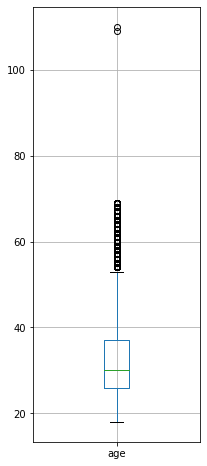

In [ ]:
datos.boxplot('age',figsize = (3,8))

(array([2.1863e+04, 2.2795e+04, 9.2200e+03, 3.6970e+03, 1.8860e+03,
        4.8300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 18. ,  27.2,  36.4,  45.6,  54.8,  64. ,  73.2,  82.4,  91.6,
        100.8, 110. ]),
 <a list of 10 Patch objects>)

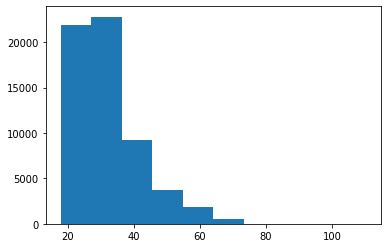

In [ ]:
plt.hist(datos['age'])

In [ ]:
datos.sort_values('age')['age']

17075     18
37002     18
2304      18
28454     18
40556     18
        ... 
2540      69
24320     69
13565     69
25324    109
2512     110
Name: age, Length: 59946, dtype: int64

Se puede apreciar que hay dos perfiles con una edad muy superior al resto, lo cual nos puede perjudicar luego, asi que vamos a optar por eliminar esas personas cuya edad supere los 70 años:

In [ ]:
indexNames = datos[ (datos['age'] > 70)].index
datos.drop(indexNames , inplace=True)

Y volvemos a llevar a cabo los mismos diagramas tras la eliminación:

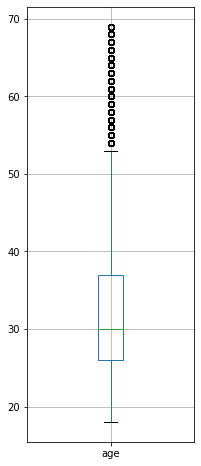

In [ ]:
datos.boxplot('age',figsize = (3,8))

(array([ 7681., 17765., 13972.,  7997.,  5112.,  2939.,  1842.,  1256.,
          897.,   483.]),
 array([18. , 23.1, 28.2, 33.3, 38.4, 43.5, 48.6, 53.7, 58.8, 63.9, 69. ]),
 <a list of 10 Patch objects>)

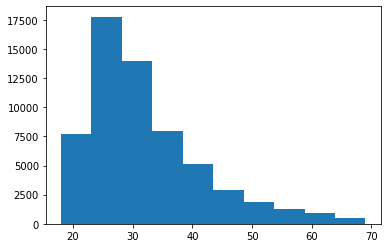

In [ ]:
plt.hist(datos['age'])

###Status (estado actual)

Para esta columna vamos a imprimir primero los valores únicos:

In [ ]:
datos['status'].unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


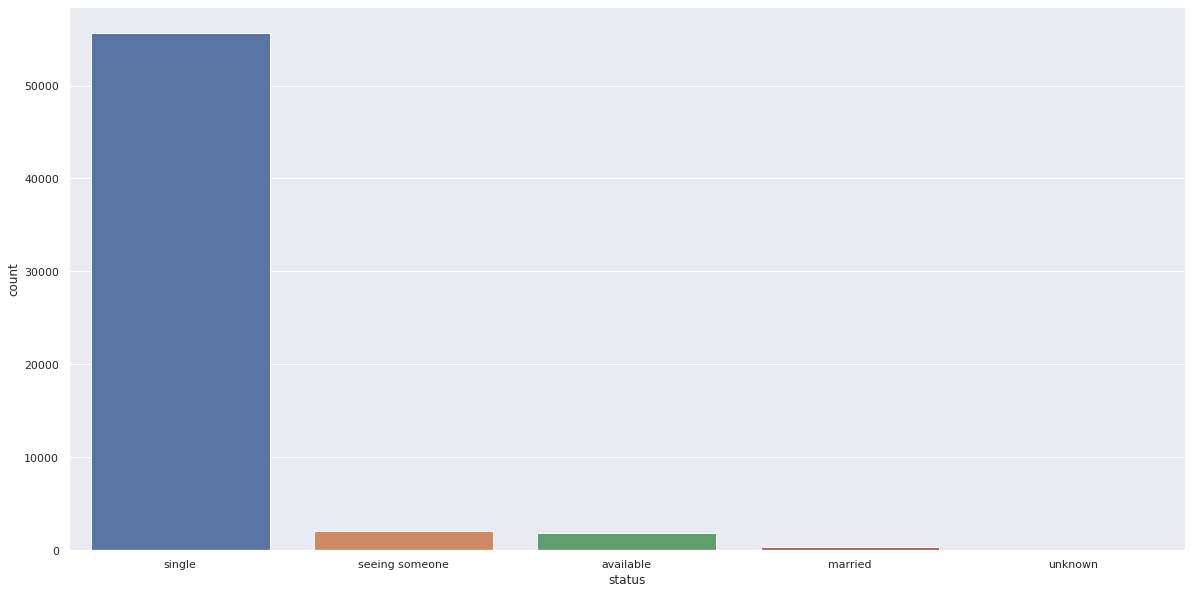

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.status,order=datos['status'].value_counts().index)

Debido a que unknown es un valor poco útil, vamos a ver cuantas personas lo han seleccionado para estudiar su posible eliminación:

In [ ]:
datos.loc[datos['status'] == 'unknown'].count

<bound method DataFrame.count of        age  ...                                             essay9
17337   57  ...  if you are a character of interest ? drop a line.
20367   38  ...                                                NaN
31148   31  ...  ...you want to chat, hang out, and learn about...
32848   38  ...                                                NaN
38009   27  ...  you like pie, you like world music, you're eas...
42771   37  ...                                                NaN
45885   22  ...  you are a person. i guess i'll just be blunt i...
47999   26  ...                                      you like wafl
50957   43  ...                                                NaN
57301   36  ...            you have a cool anime hairstyle (smirk)

[10 rows x 31 columns]>

Como se trata de 10 personas, vamos a optar por eliminar estos perfiles de nuestra tabla:

In [ ]:
indexNames = datos[ (datos['status'] == 'unknown')].index
datos.drop(indexNames , inplace=True)

Además, como estos datos son de una app de citas consideramos que estar soltero es igual que estar disponible, quedando por tanto las opciones de disponible, viendo a alguien o casado.

In [ ]:
datos.loc[datos['status'].str.contains("single") == True, 'status'] = 'available'

In [ ]:
datos['status'].unique()

array(['available', 'seeing someone', 'married'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


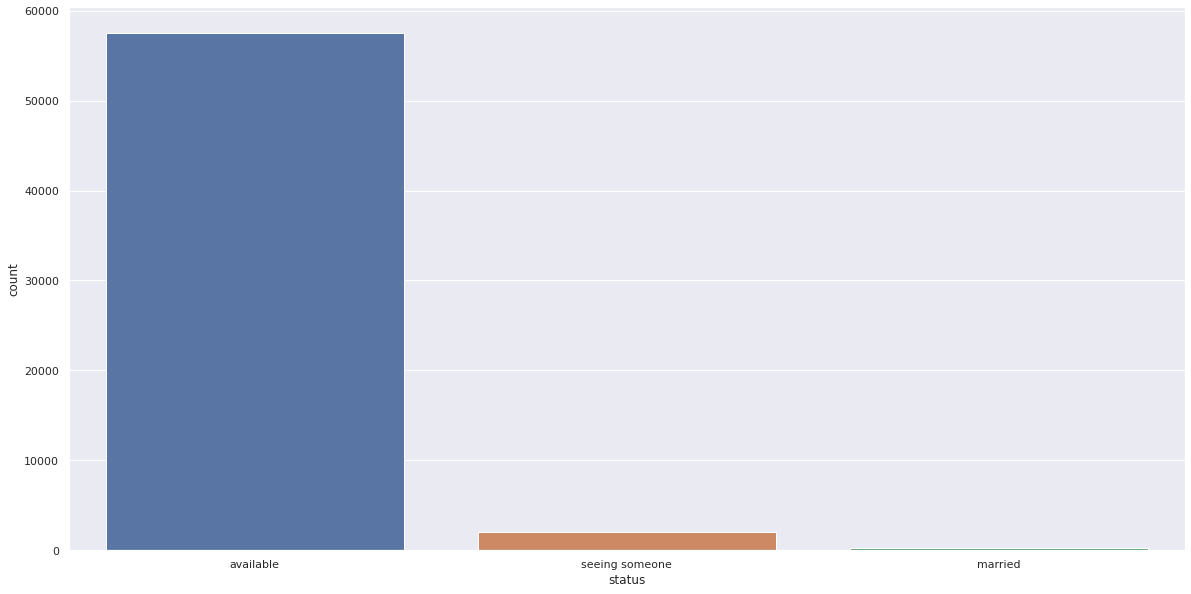

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.status,order=datos['status'].value_counts().index)

###Sex & Orientation (sexo y orientación sexual)

Estas dos columnas son imprescindibles a la hora de encontrar pareja, como sólo toman 2 y 3 valores distintos respectivamente sobre ellas vamos a realizar únicamente el one hot encoding.

###Body_type (Complexión/Forma corporal)

Para esta columna primeramente vamos a comprobar los valores únicos que se toman:

In [ ]:
datos['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


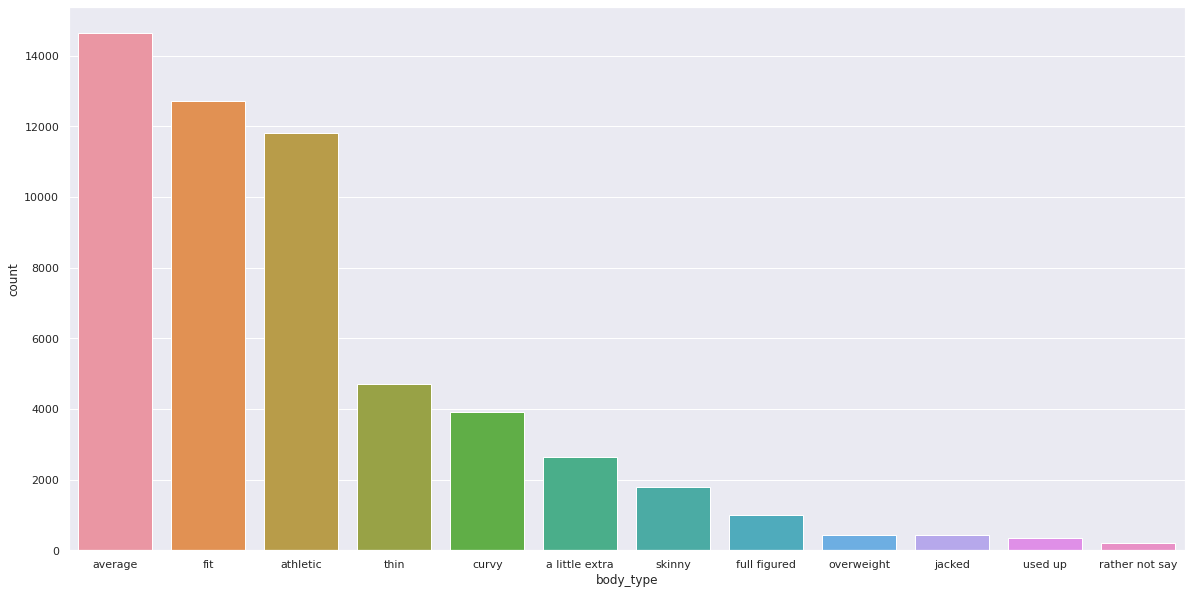

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.body_type,order=datos['body_type'].value_counts().index)

Como estamos tratando con muchos valores, vamos a recogerlos en los siguientes:

* **fit**: aquí entran los valores athletic, fit y jacked, cuerpos de aspecto deportivo.
* **skinny**: aquí entran skinny y thin, para personas de complexión más delgada.
* **average**: aquí las personas que consideren que su forma corporal es estándar.
* **plus-sized**: aqui se agrupan los valores 'a little extra', 'full figured', 'overweight' y 'curvy', hablamos de tallas mayores.
* **rather not say**: para quien no quiera rellenar el campo, aquí incluiremos todos los valores nan y las personas que hayan seleccionado 'used up' pues puede ser un cuerpo de alguien mayor, una mujer cuyo cuerpo haya sido afectado tras un embarazo, o gente que esté extremadamente delgada por consumo de drogas.

Fuentes: https://www.reddit.com/r/OkCupid/comments/1a25wn/what_does_a_used_up_body_type_look_like/

In [ ]:
datos.loc[datos['body_type'].str.contains("athletic",na=False) == True, 'body_type'] = 'fit'
datos.loc[datos['body_type'].str.contains("jacked",na=False) == True, 'body_type'] = 'fit'

In [ ]:
datos.loc[datos['body_type'].str.contains("thin",na=False) == True, 'body_type'] = 'skinny'

In [ ]:
datos.loc[datos['body_type'].str.contains("a little extra",na=False) == True, 'body_type'] = 'plus-sized'
datos.loc[datos['body_type'].str.contains("full figured",na=False) == True, 'body_type'] = 'plus-sized'
datos.loc[datos['body_type'].str.contains("overweight",na=False) == True, 'body_type'] = 'plus-sized'
datos.loc[datos['body_type'].str.contains("curvy",na=False) == True, 'body_type'] = 'plus-sized'

In [ ]:
datos.loc[datos['body_type'].str.contains("used up",na=False) == True, 'body_type'] = 'rather not say'
datos.loc[datos['body_type'].isnull(), 'body_type'] = 'rather not say'

Ahora vamos a asegurarnos de que no nos hemos dejado ningun valor por el camino:

In [ ]:
datos['body_type'].unique()

array(['plus-sized', 'average', 'skinny', 'fit', 'rather not say'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


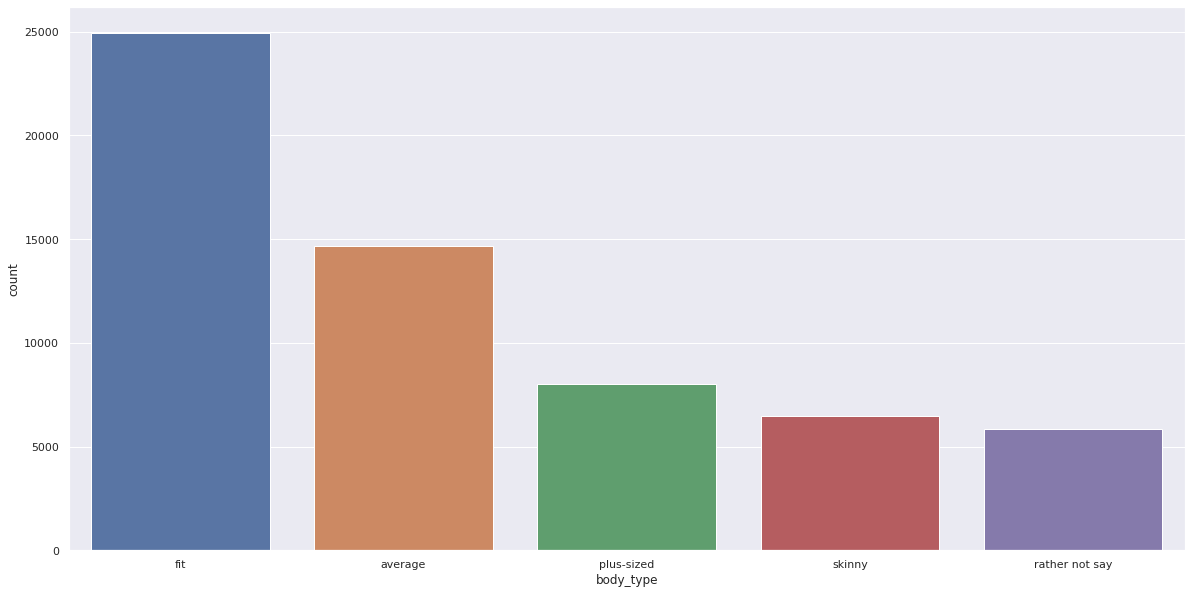

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.body_type,order=datos['body_type'].value_counts().index)

###Diet (dieta)

Para esta columna vamos a llevar a cabo en primer lugar la comprobación de los valores únicos que se toman:

In [ ]:
datos['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'mostly anything'),
 Text(0, 0, 'anything'),
 Text(0, 0, 'strictly anything'),
 Text(0, 0, 'mostly vegetarian'),
 Text(0, 0, 'mostly other'),
 Text(0, 0, 'strictly vegetarian'),
 Text(0, 0, 'vegetarian'),
 Text(0, 0, 'strictly other'),
 Text(0, 0, 'mostly vegan'),
 Text(0, 0, 'other'),
 Text(0, 0, 'strictly vegan'),
 Text(0, 0, 'vegan'),
 Text(0, 0, 'mostly kosher'),
 Text(0, 0, 'mostly halal'),
 Text(0, 0, 'strictly kosher'),
 Text(0, 0, 'strictly halal'),
 Text(0, 0, 'kosher'),
 Text(0, 0, 'halal')]

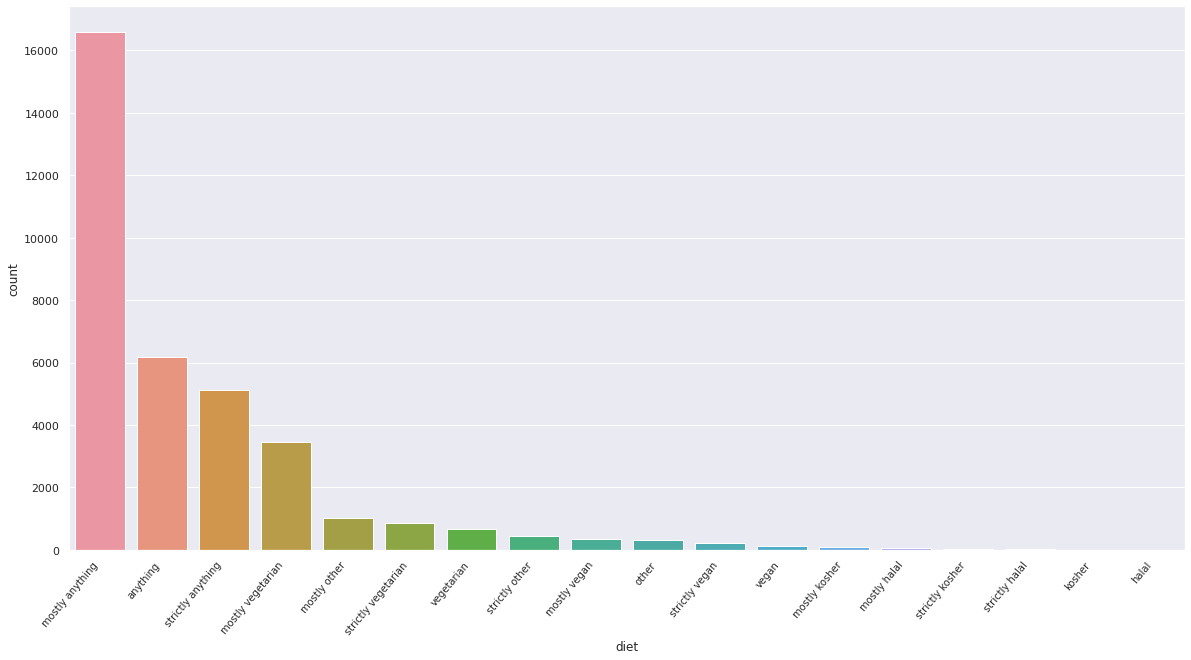

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(datos.diet,order=datos['diet'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right", fontsize=10)

Se aprecia que los usuarios tienen distintas medidas para la seriedad de la dieta que siguen: mostly, strictly, anything...  
Vamos a reducir todas estas opciones a la palabra de la dieta que mencionan, y vamos a considerar halal y kosher como otras dietas, por lo que iran a other:

In [ ]:
datos.loc[datos['diet'].str.contains("anything",na=True) == True, 'diet'] = 'anything'
datos.loc[datos['diet'].str.contains("vegetarian",na=False) == True, 'diet'] = 'vegetarian'
datos.loc[datos['diet'].str.contains("vegan",na=False) == True, 'diet'] = 'vegan'
datos.loc[datos['diet'].str.contains("halal",na=False) == True, 'diet'] = 'other'
datos.loc[datos['diet'].str.contains("kosher",na=False) == True, 'diet'] = 'other'
datos.loc[datos['diet'].str.contains("other",na=True) == True, 'diet'] = 'other'

Para el caso de los valores nulos, vamos a pasarlos a anything, pues entendemos que si alguien no escribe nada en esta casilla es porque no sigue ninguna dieta en específico:

In [ ]:
datos.loc[datos['diet'].isnull(), 'diet'] = 'anything'

Comprobamos que no se nos ha quedado ningun valor por el camino:

In [ ]:
datos['diet'].unique()

array(['anything', 'other', 'vegetarian', 'vegan'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


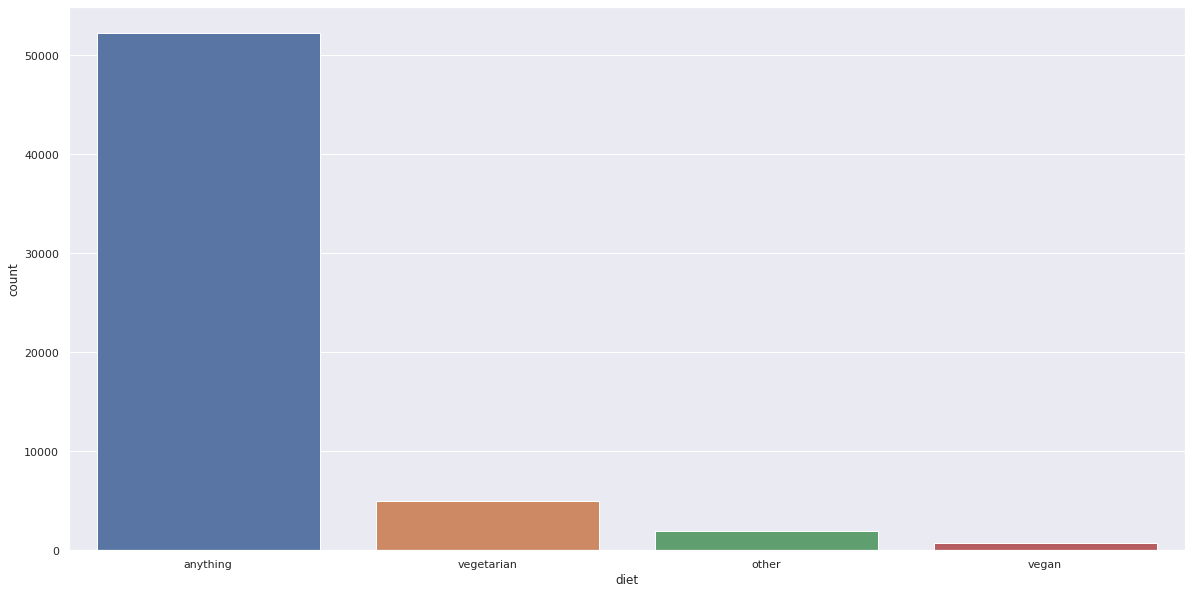

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.diet,order=datos['diet'].value_counts().index)

###Smokes, Drinks & Drugs (Drogas)

En primer lugar veremos cuantos datos null hay en las columnas smokes, drinks y drugs:

In [ ]:
datos['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [ ]:
datos['smokes'].isna().sum()

5510

In [ ]:
datos['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [ ]:
datos['drinks'].isna().sum()

2983

In [ ]:
datos['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [ ]:
datos['drugs'].isna().sum()

14075

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


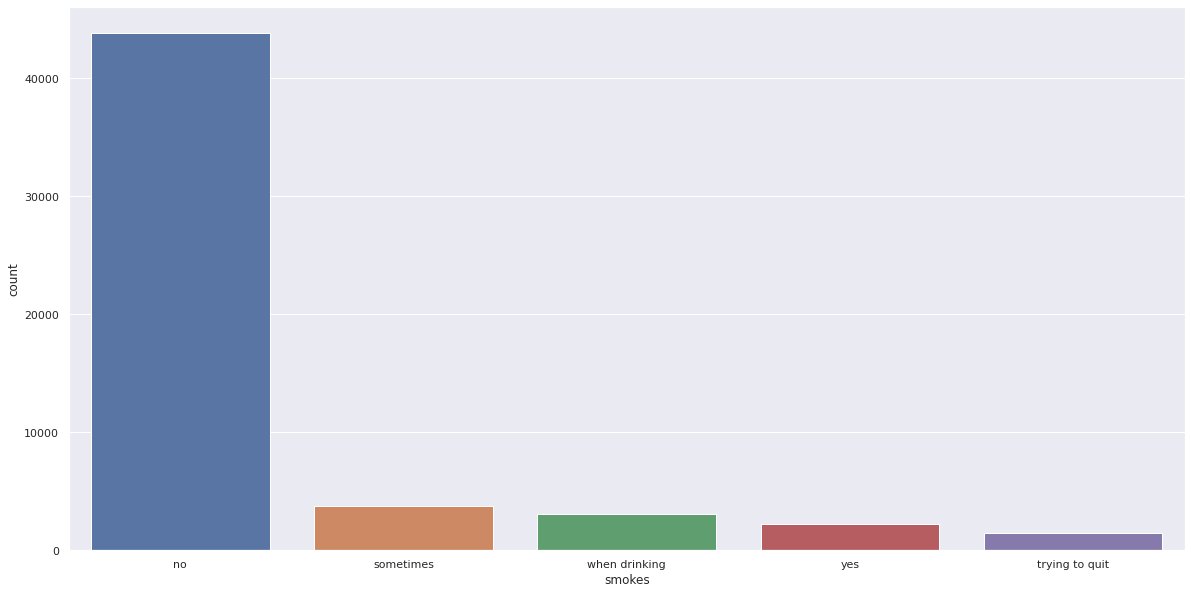

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.smokes,order=datos['smokes'].value_counts().index)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


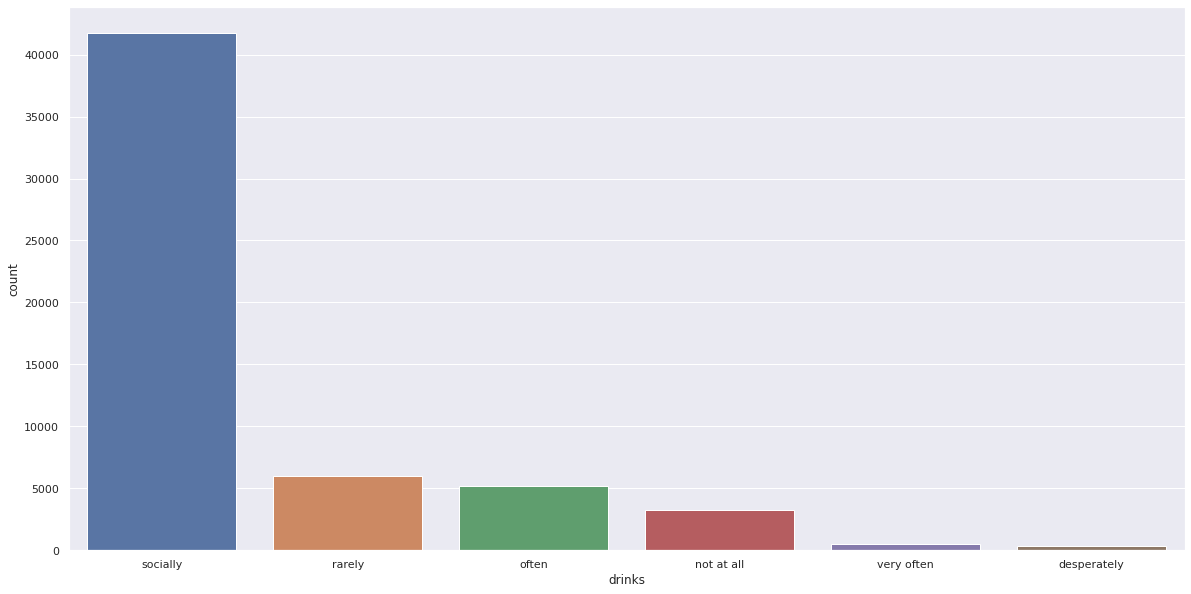

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.drinks,order=datos['drinks'].value_counts().index)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


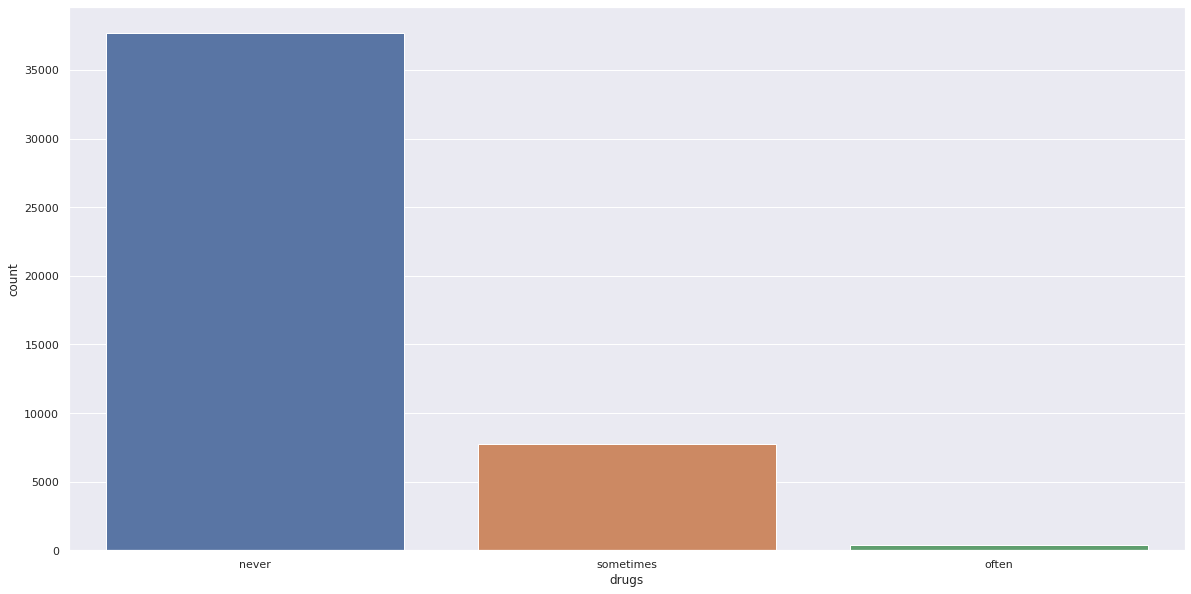

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.drugs,order=datos['drugs'].value_counts().index)

Debido a la naturaleza de estos datos, no podemos tratar los null como un valor en específico, ya que pueden significar que no toman, o que no quieren decir la verdad.
Por ello, en vez de tomar estas variables como un rango de 0 (no tomar) al número maximo de valores (toma con mucha frecuencia), lo mantendremos como variables categóricas, añadiendo una opción extra para los nan/null llamada 'unknown':

In [ ]:
datos.loc[datos['smokes'].isnull() == True, 'smokes'] = 'unknown'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


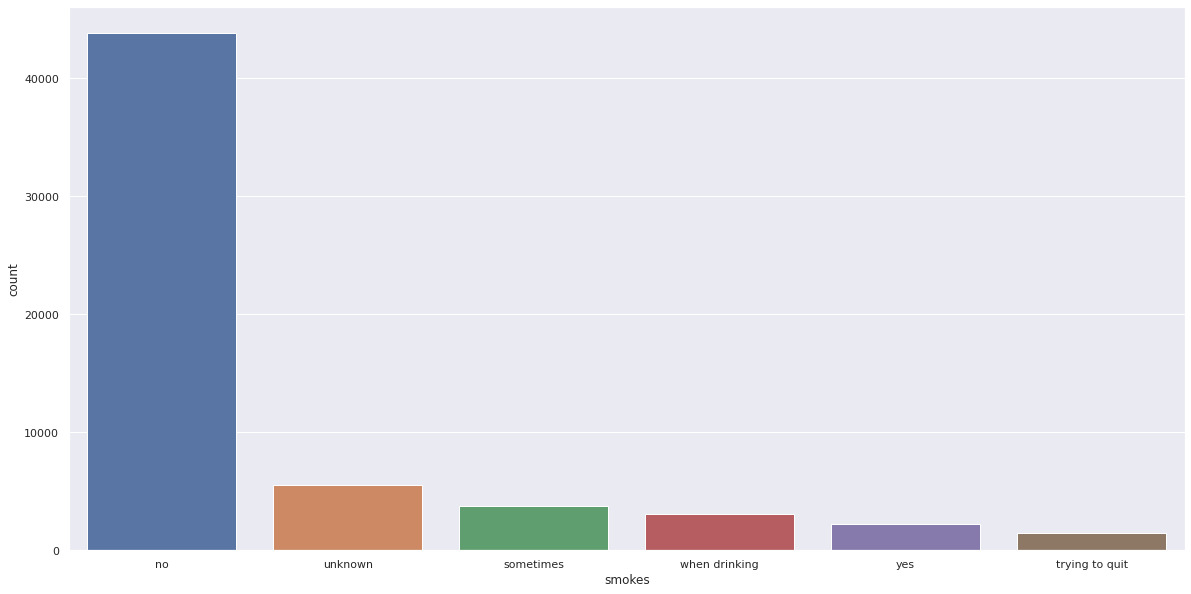

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.smokes,order=datos['smokes'].value_counts().index)

In [ ]:
datos.loc[datos['drinks'].isnull() == True, 'drinks'] = 'unknown'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


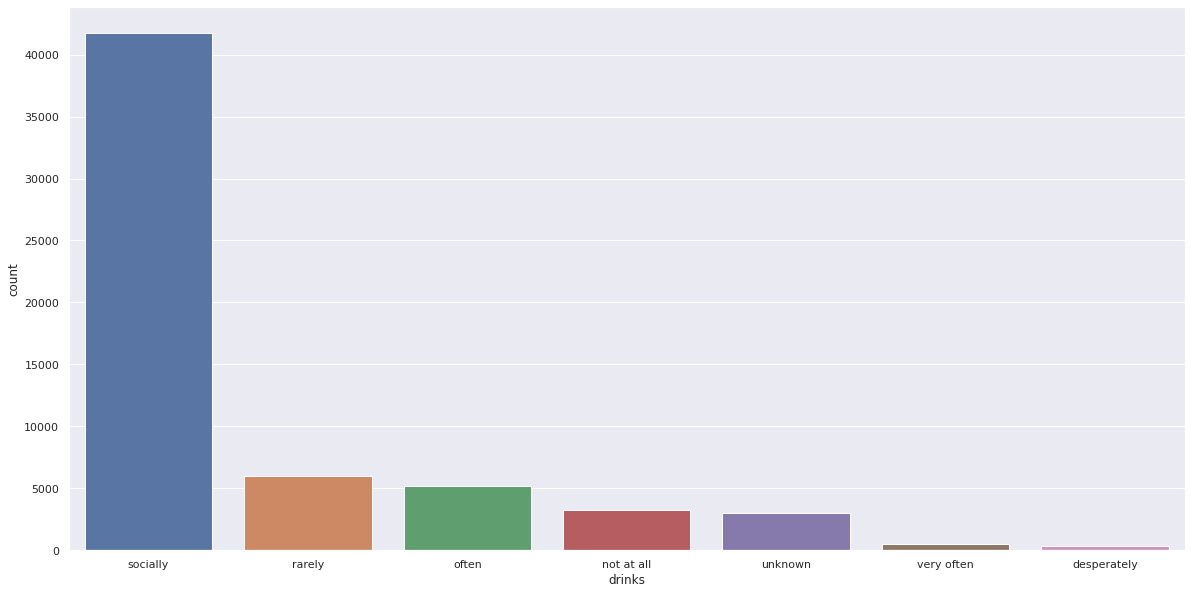

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.drinks,order=datos['drinks'].value_counts().index)

In [ ]:
datos.loc[datos['drugs'].isnull() == True, 'drugs'] = 'unknown'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


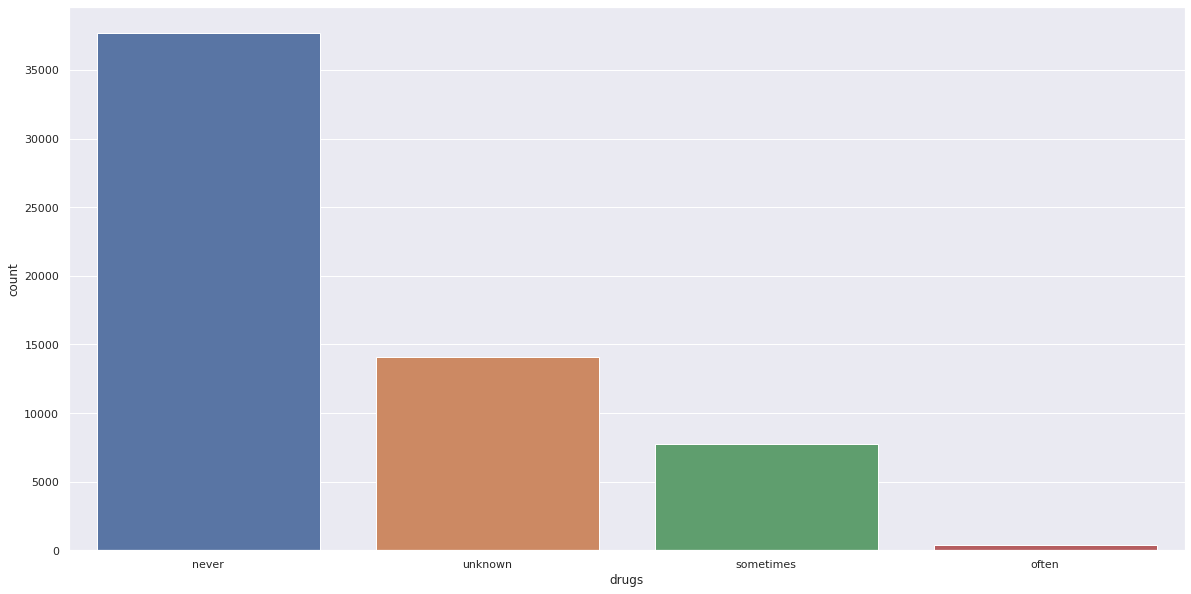

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.drugs,order=datos['drugs'].value_counts().index)

###Education (educación)

Al igual que en anteriores columnas, vamos a comprobar los valores únicos que existen:

In [ ]:
datos['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

Vamos a entender esta columna como el nivel mas alto de educación alcanzado. Por tanto vamos a considerar los siguientes valores: 

* **postgraduate studies** personas que estan en med school y estudiantes de masters o phd (doctorados). 
* **college/university** personas que estan cursando un grado o es el mayor estudio alcanzado.
* **high school** personas que están en secundaria o es el mayor estudio alcanzado.
* **other studies** personas que estan por ejemplo en space camp, que no se considera un grado universitario pero es educación post-secundaria.
* **not currently** personas que han abandonado estudios (dropped out of...) o han marcado Nan.

Fuentes: https://en.wikipedia.org/wiki/Law_school, 
https://en.wikipedia.org/wiki/Space_Camp_(United_States)


In [ ]:
datos.loc[datos['education'].str.contains("dropped out of",na=False) == True, 'education'] = 'not currently'
datos.loc[datos['education'].isnull(), 'education'] = 'not currently'

In [ ]:
datos.loc[datos['education'].str.contains("space camp",na=False) == True, 'education'] = 'other studies'

Ahora sustituimos los valores correspondientes a estudios postgrado:

In [ ]:
datos.loc[datos['education'].str.contains("med school", na=False) == True, 'education'] = 'postgraduate studies'
datos.loc[datos['education'].str.contains("masters", na=False) == True, 'education'] = 'postgraduate studies'
datos.loc[datos['education'].str.contains("ph.d", na=False) == True, 'education'] = 'postgraduate studies'

Ahora sustituimos los valores correspondientes a la universidad o fps:

In [ ]:
datos.loc[datos['education'].str.contains("college", na=False) == True, 'education'] = 'college/university'
datos.loc[datos['education'].str.contains("law school", na=False) == True, 'education'] = 'college/university'

Ahora sustituimos los valores correspondientes a secundaria:

In [ ]:
datos.loc[datos['education'].str.contains("high school", na=False) == True, 'education'] = 'high school'
datos.loc[datos['education'].str.contains("high school", na=False) == True, 'education'] = 'high school'

Y ahora comprobamos que no nos hemos dejado nada por el camino:

In [ ]:
datos['education'].unique()

array(['college/university', 'other studies', 'postgraduate studies',
       'not currently', 'high school'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


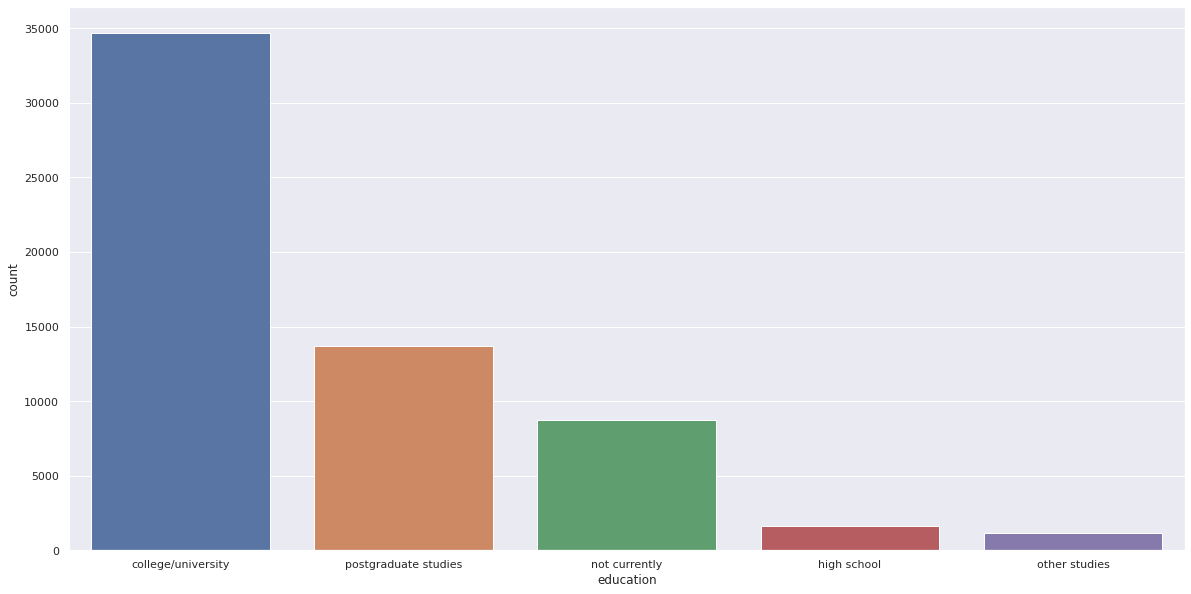

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.education,order=datos['education'].value_counts().index)

###Ethnicity (etnias)

En este caso consideramos éticamente no correcto el uso de las etnias para entrenar el algoritmo, por lo que vamos a eliminarla, ya que consideramos que puede llegar a tener connotaciones racistas si añadimos este campo.

In [ ]:
datos.drop('ethnicity', inplace=True, axis=1)

###Height (Altura)

Como se ha podido ver en la documentación del dataset las alturas están en forma de pulgadas, por lo que usaremos los datos de la siguiente página para las conversiones y para ver qué rangos de alturas tener en cuenta como correctos.

Datos de alturas http://www.unitarium.com/blog/articles/human-height-conversion-table

In [ ]:
datos['height'].isna().sum()

3

Como son muy pocas, vamos a eliminar las personas que no hayan rellenado este campo:

In [ ]:
indexNames = datos[datos['height'].isnull()].index
datos.drop(indexNames , inplace=True)

Tras la eliminación vamos a comprobar los datos restantes con distintos diagramas:

(array([6.0000e+00, 0.0000e+00, 1.0000e+00, 1.3000e+01, 4.0000e+00,
        4.6000e+01, 1.9571e+04, 3.9717e+04, 5.4000e+02, 3.3000e+01]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

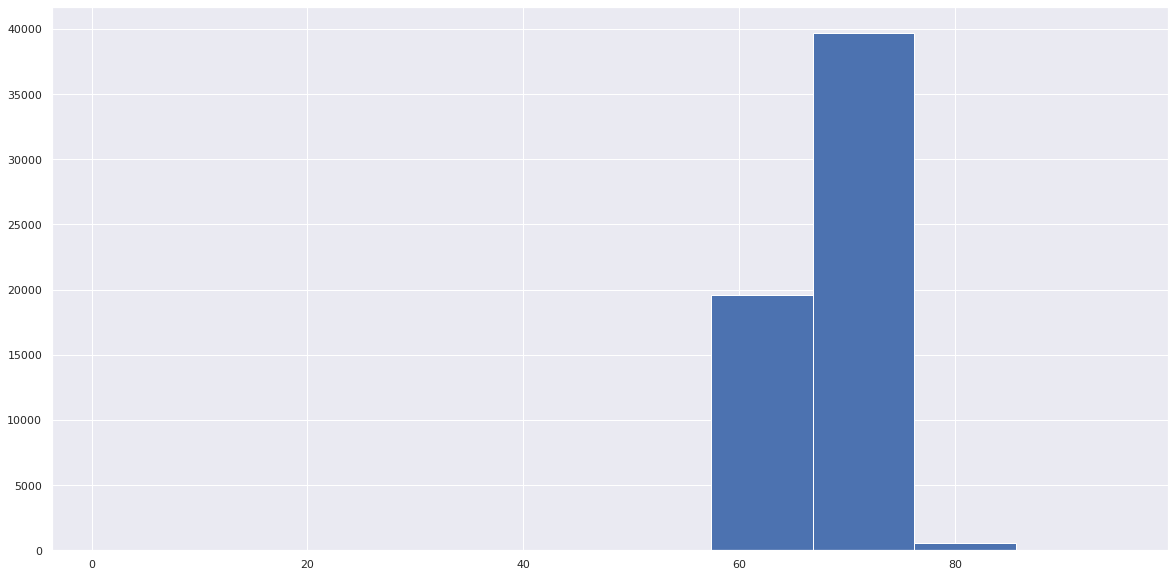

In [ ]:
plt.hist(datos['height'])

Ya que las alturas medias de las personas varían dependiendo del sexo, vamos a ver cómo se distriuyen las alturas separando entre hombres y mujeres:

In [ ]:
indexHombres = datos[ (datos['sex'] == 'm')].index
indexMujeres = datos[ (datos['sex'] == 'f')].index

(array([3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+01, 2.0000e+00,
        9.0000e+00, 2.9230e+03, 3.2314e+04, 5.3500e+02, 2.3000e+01]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

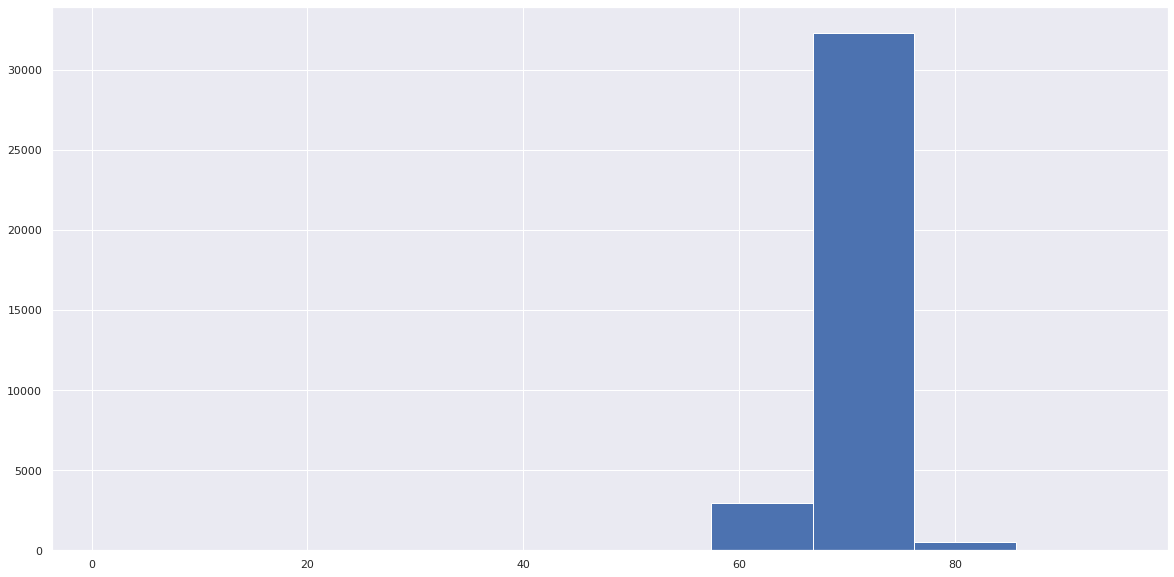

In [ ]:
plt.hist(datos['height'][indexHombres])

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00,
        8.4000e+01, 1.9384e+04, 4.6180e+03, 5.0000e+00, 1.0000e+01]),
 array([ 4. , 13.1, 22.2, 31.3, 40.4, 49.5, 58.6, 67.7, 76.8, 85.9, 95. ]),
 <a list of 10 Patch objects>)

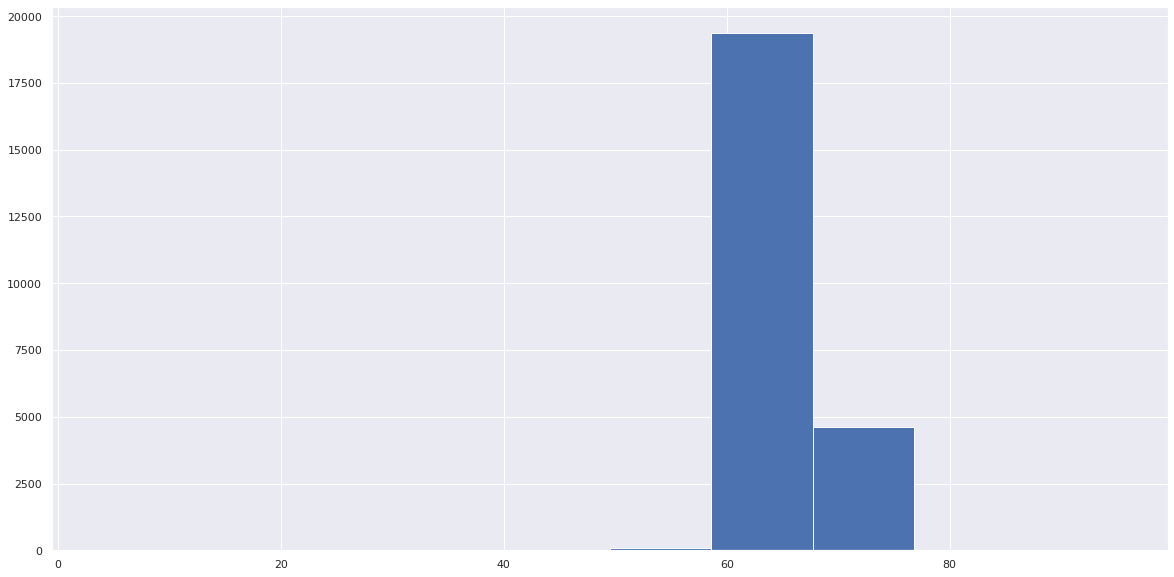

In [ ]:
plt.hist(datos['height'][indexMujeres])

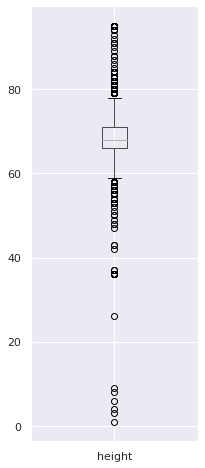

In [ ]:
datos.boxplot('height',figsize = (3,8))

Vamos a aceptar las alturas dentro de estos rangos: 
*  En mujeres los valores entre 1.45 metros (57 pulgadas) y 1.90 metros (75 pulgadas)
*  En hombres los valores entre 1.55 metros (61 pulgadas) y 2.00 metros (80 pulgadas)

In [ ]:
indexNames = datos[ (datos['sex'] == 'f') & ((datos['height'] < 57) | (datos['height'] > 75))].index
datos.drop(indexNames , inplace=True)

In [ ]:
indexNames = datos[ (datos['sex'] == 'm') & ((datos['height'] < 61) | (datos['height'] > 80))].index
datos.drop(indexNames , inplace=True)

In [ ]:
indexHombres = datos[ (datos['sex'] == 'm')].index
indexMujeres = datos[ (datos['sex'] == 'f')].index

Procedemos ahora a observar la distribución de las alturas con los valores anómalos eliminados:

(array([  81.,  517., 2287., 6057., 9247., 9573., 5285., 2152.,  408.,
          84.]),
 array([61. , 62.9, 64.8, 66.7, 68.6, 70.5, 72.4, 74.3, 76.2, 78.1, 80. ]),
 <a list of 10 Patch objects>)

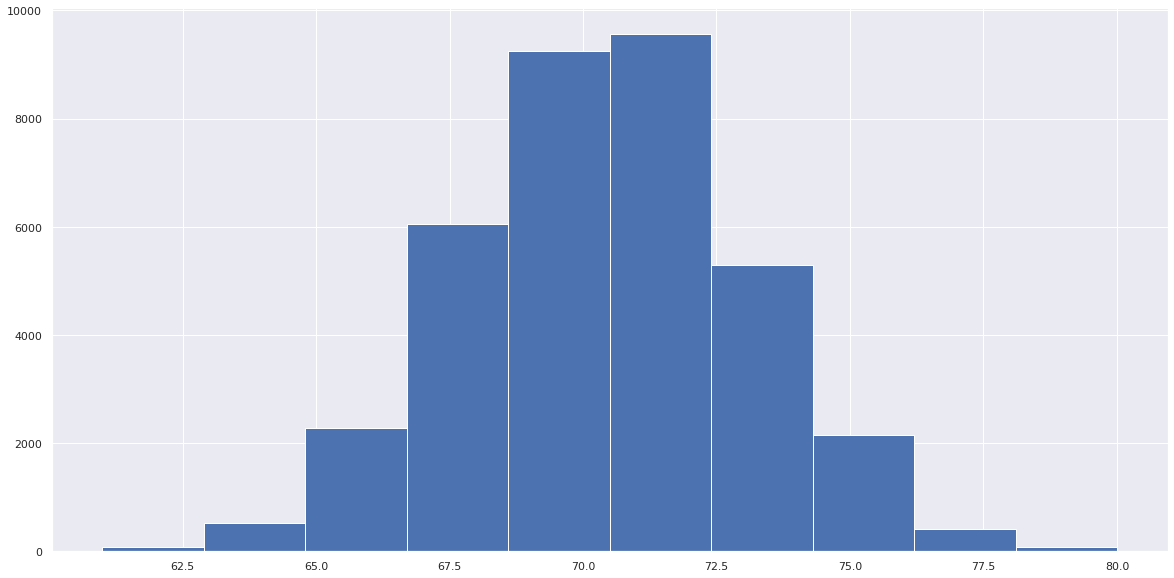

In [ ]:
plt.hist(datos['height'][indexHombres])

(array([  66.,  968., 3252., 6114., 3085., 5965., 3183., 1152.,  247.,
          31.]),
 array([57. , 58.8, 60.6, 62.4, 64.2, 66. , 67.8, 69.6, 71.4, 73.2, 75. ]),
 <a list of 10 Patch objects>)

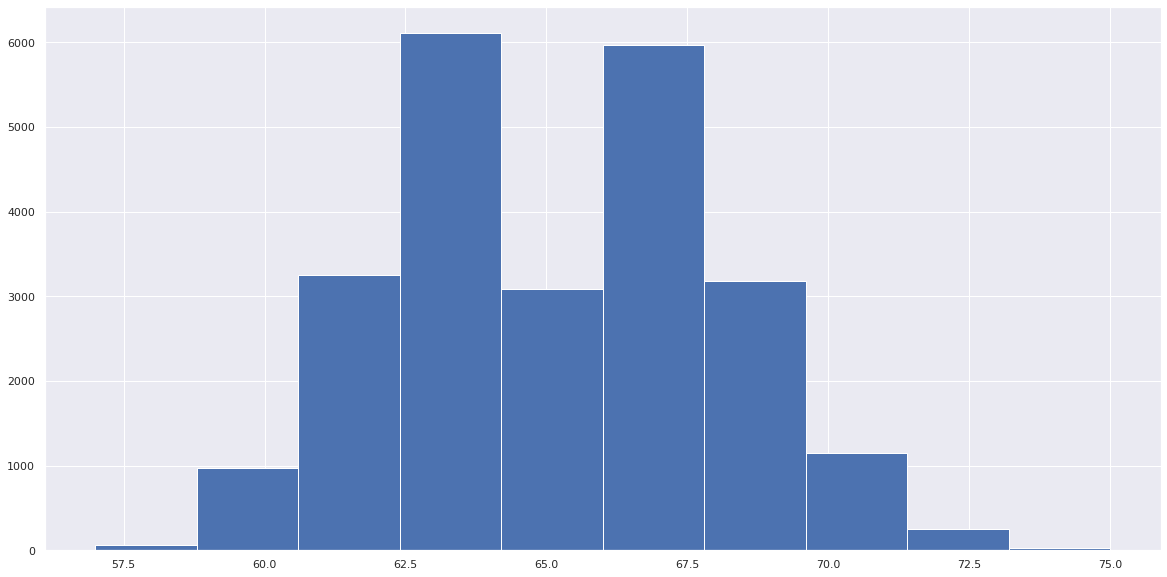

In [ ]:
plt.hist(datos['height'][indexMujeres])

Ahora vamos a ver ambas gráficas superpuestas para observar mejor la diferencia que existe en las alturas entre los dos sexos.

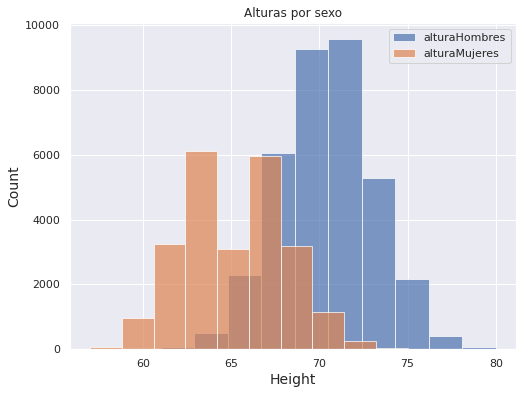

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(datos['height'][indexHombres], bins=10, alpha=0.7, label="alturaHombres")
plt.hist(datos['height'][indexMujeres], bins=10, alpha=0.7, label="alturaMujeres")
plt.xlabel("Height", size=14)
plt.ylabel("Count", size=14)
plt.title("Alturas por sexo")
plt.legend(loc='upper right')

Text(0, 0.5, 'Height')

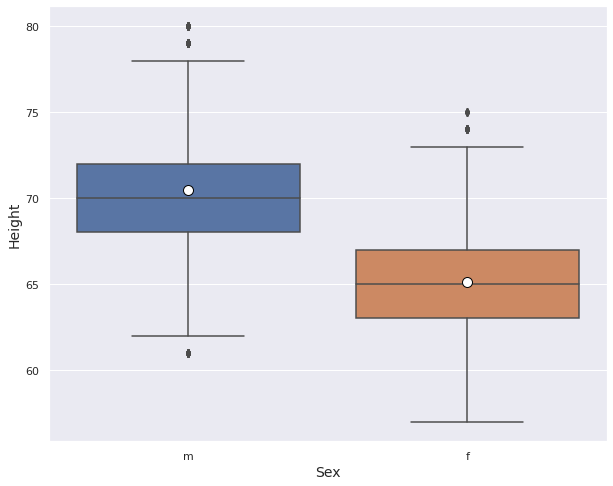

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="sex", y="height", data=datos, showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.xlabel("Sex", size=14)
plt.ylabel("Height", size=14)

Ahora se puede ver que casi no hay valores anómalos.

###Income (Ingresos)

Para esta columna vamos a ver primero un diagrama de caja y bigotes:

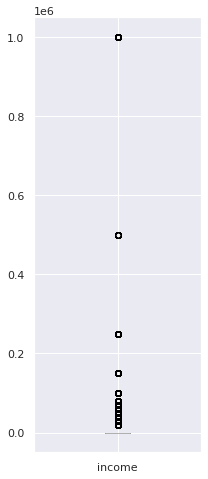

In [ ]:
datos.boxplot('income',figsize = (3,8))

Parece que la distribución de esta columna es muy diferente a las vistas anteriormente. Parece que todos los valores están en el -1 (que equivaldría a un nan).

(array([5.6806e+04, 2.2460e+03, 1.4800e+02, 0.0000e+00, 0.0000e+00,
        4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0800e+02]),
 array([-1.000000e+00,  9.999910e+04,  1.999992e+05,  2.999993e+05,
         3.999994e+05,  4.999995e+05,  5.999996e+05,  6.999997e+05,
         7.999998e+05,  8.999999e+05,  1.000000e+06]),
 <a list of 10 Patch objects>)

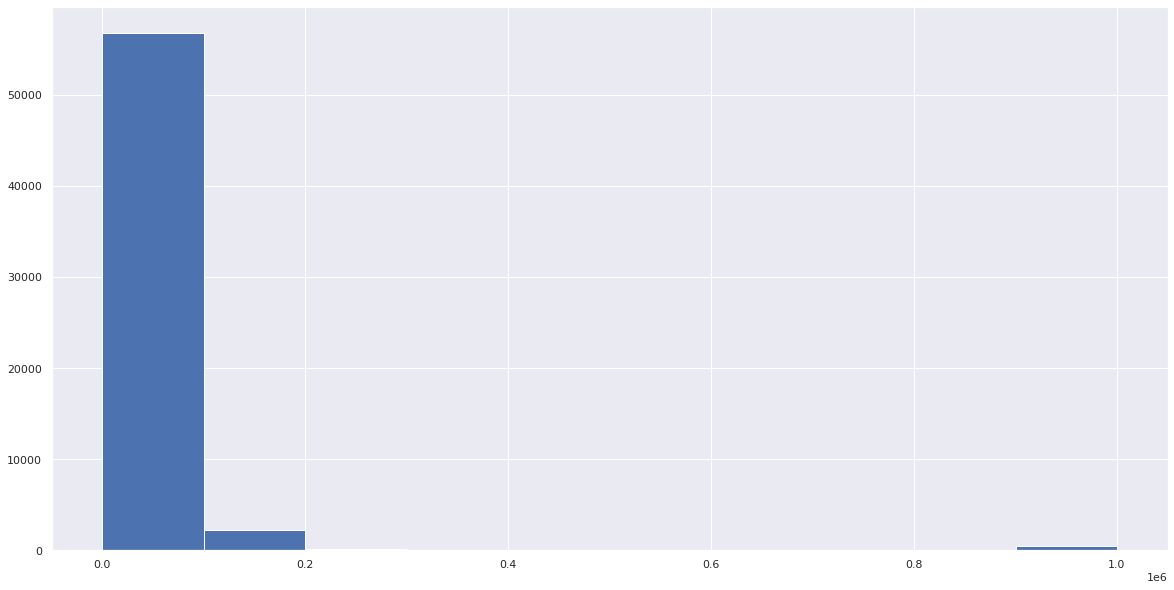

In [ ]:
plt.hist(datos['income'])

Procedemos a sacar más información sobre el numero de filas segun los ingresos:

In [ ]:
datos[ (datos['income'] < 0)].count

Como hay 48365 perfiles que han optado por dejar esta columna sin valor vamos a eliminarla de nuestra tabla, pues no nos está aportando mucho.

In [ ]:
datos.drop('income', inplace=True, axis=1)

###Job (trabajo)

Procedemos a analizar la columna de Job:

In [ ]:
datos['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [ ]:
datos['job'].nunique()

21

In [ ]:
datos['job'].isna().sum()

8151

Parece que hay 21 opciones distintas en total y además hay muchos null, por lo que vamos a cambiarles el valor al 'rather not say' para continuar analizando los datos.

In [ ]:
datos.loc[datos['job'].isnull(), ['job'] ] = 'rather not say'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'rather not say'),
 Text(0, 0, 'other'),
 Text(0, 0, 'student'),
 Text(0, 0, 'science / tech / engineering'),
 Text(0, 0, 'computer / hardware / software'),
 Text(0, 0, 'artistic / musical / writer'),
 Text(0, 0, 'sales / marketing / biz dev'),
 Text(0, 0, 'medicine / health'),
 Text(0, 0, 'education / academia'),
 Text(0, 0, 'executive / management'),
 Text(0, 0, 'banking / financial / real estate'),
 Text(0, 0, 'entertainment / media'),
 Text(0, 0, 'law / legal services'),
 Text(0, 0, 'hospitality / travel'),
 Text(0, 0, 'construction / craftsmanship'),
 Text(0, 0, 'clerical / administrative'),
 Text(0, 0, 'political / government'),
 Text(0, 0, 'transportation'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'military')]

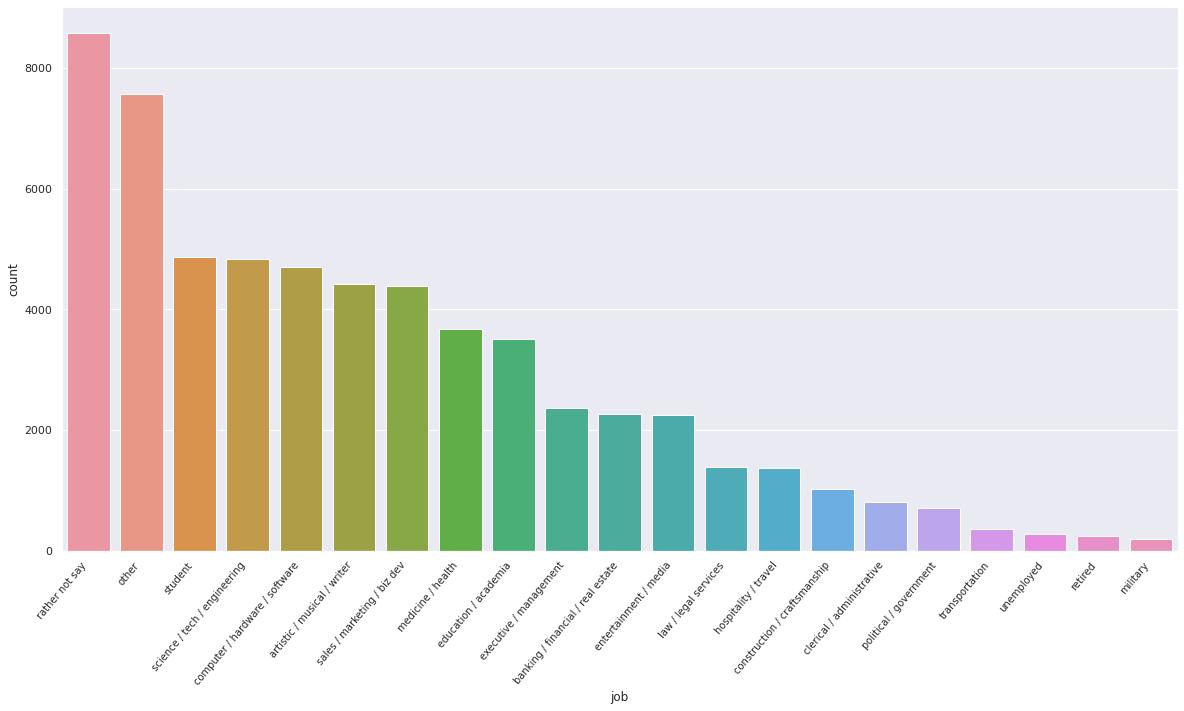

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(datos.job,order=datos['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right", fontsize=10)

Una vez hemos visto los diferentes trabajos que hay, consideramos que el trabajo no aporta mucha información para la complejidad extra que nos va a añadir, por lo que vamos a eliminarlo.

In [ ]:
datos.drop('job', inplace=True, axis=1)

### Last_online (ultima vez conectado)

Consideramos que el último momento de conexión no es nada relevante por lo que se va a eliminar.

In [ ]:
datos.drop('last_online', inplace=True, axis=1)

###Location (localización)

Para analizar la localización vamos a ver qué datos diferentes hay:

In [ ]:
datos['location'].nunique()

198

In [ ]:
datos['location'].unique()

array(['south san francisco, california', 'oakland, california',
       'san francisco, california', 'berkeley, california',
       'belvedere tiburon, california', 'san mateo, california',
       'daly city, california', 'san leandro, california',
       'atherton, california', 'san rafael, california',
       'walnut creek, california', 'menlo park, california',
       'belmont, california', 'san jose, california',
       'palo alto, california', 'emeryville, california',
       'el granada, california', 'castro valley, california',
       'fairfax, california', 'mountain view, california',
       'burlingame, california', 'martinez, california',
       'pleasant hill, california', 'hayward, california',
       'alameda, california', 'vallejo, california',
       'benicia, california', 'el cerrito, california',
       'mill valley, california', 'richmond, california',
       'redwood city, california', 'el sobrante, california',
       'stanford, california', 'san pablo, california',

Parece que los datos tienen la estructura "ciudad, estado" o "ciudad, país".

Parece que la mayoria de valores únicos son de California, así que procedemos a ver cuántas personas no son de California.

In [ ]:
datos[datos['location'].str.contains('california') == False].count

<bound method DataFrame.count of        age  ...                                             essay9
1336    29  ...  you're looking for a new adventure! i'm down f...
2819    31  ...  - you have a sweet smile and a sharper bite - ...
4332    22  ...  you'd be willing to meet in person after a vol...
6728    22  ...  you are an intelligent, kind guy with a sense ...
6881    35  ...  you're honest and sincere. you're open minded ...
...    ...  ...                                                ...
59316   39  ...                                                NaN
59408   29  ...  you wanna play some chess, listen to some good...
59490   27  ...  you'd like to make some aussie friends, or you...
59504   22  ...  you can handle a girl who blasts left over cra...
59843   28  ...  you like what you read on my profile and are i...

[90 rows x 31 columns]>

In [ ]:
datos[datos['location'].str.contains('california') == True].count

<bound method DataFrame.count of        age  ...                                             essay9
0       22  ...  you want to be swept off your feet! you are ti...
1       35  ...                                                NaN
2       38  ...  you are bright, open, intense, silly, ironic, ...
3       23  ...                              you feel so inclined.
4       29  ...                                                NaN
...    ...  ...                                                ...
59941   59  ...  you are seeking a long term connection of shar...
59942   24  ...     meh if you made it this far you might as well.
59943   42  ...                         we have similar interests.
59944   27  ...              you are interested and interesting...
59945   39  ...  if you have a back-bone, an opinion, a sense o...

[59664 rows x 31 columns]>

Solo hay 91 personas de casi 60000, por lo que podemos prescindir de estos.

In [ ]:
indexNames = datos[datos['location'].str.contains('california') == False].index
datos.drop(indexNames , inplace=True)

Ahora que todos los datos de localización son de California, podemos eliminar el nombre del estado y dejar solo lo que está a la izquierda de la coma.

In [ ]:
datos['location'].nunique()

135

In [ ]:
datos['location'][5303].split(',')

['south san francisco', ' california']

In [ ]:
for localizacion in datos['location']:
  array_localizacion = localizacion.split(',')
  if(len(array_localizacion) > 1):
    ciudad = array_localizacion[0]
    ciudadfinal = ciudad[0:]
    datos.loc[datos['location'].str.contains(ciudadfinal) == True, 'location'] = ciudadfinal

In [ ]:
ciudades = datos['location'].unique()
ciudades

array(['san francisco', 'oakland', 'berkeley', 'tiburon', 'san mateo',
       'daly city', 'san leandro', 'atherton', 'san rafael',
       'walnut creek', 'menlo park', 'belmont', 'san jose', 'palo alto',
       'emeryville', 'el granada', 'castro valley', 'fairfax',
       'mountain view', 'burlingame', 'martinez', 'pleasant hill',
       'hayward', 'alameda', 'vallejo', 'benicia', 'el cerrito',
       'mill valley', 'richmond', 'redwood city', 'el sobrante',
       'stanford', 'san pablo', 'novato', 'pacifica', 'lafayette',
       'half moon bay', 'fremont', 'orinda', 'san anselmo',
       'corte madera', 'albany', 'san carlos', 'san lorenzo',
       'foster city', 'hercules', 'santa cruz', 'bolinas', 'sausalito',
       'millbrae', 'larkspur', 'moraga', 'san bruno', 'petaluma',
       'pinole', 'san geronimo', 'crockett', 'brisbane', 'freedom',
       'montara', 'green brae', 'woodside', 'ross', 'san quentin',
       'rodeo', 'hacienda heights', 'woodacre', 'westlake', 'riverside',


Ahora que tenemos ya la lista de ciudades vamos a ver cuántas personas son de cada ciudad para dejar las que tengan a una cantidad significativa de personas.

In [ ]:
personas = []
for ciudad in ciudades:
  num = datos.location.value_counts()[ciudad]
  personas.append(num)

personasCiudad = pd.DataFrame(ciudades,columns=['ciudad'])
personasCiudad['npersonas'] = personas

In [ ]:
personasCiudad.sort_values('npersonas')

ciudad  npersonas
128     long beach          1
102     port costa          1
101       milpitas          1
100        arcadia          1
99        pasadena          1
..             ...        ...
13       palo alto       1074
4        san mateo       1325
2         berkeley       4197
1          oakland       7203
0    san francisco      31392

[129 rows x 2 columns]

Ahora vamos a ver cuántas ciudades quedarían según el punto de corte de número de personas mínimo que pongamos.

In [ ]:
personasCiudad[personasCiudad['npersonas'] > 10].count()

ciudad       62
npersonas    62
dtype: int64

In [ ]:
personasCiudad[personasCiudad['npersonas'] > 100].count()

ciudad       41
npersonas    41
dtype: int64

In [ ]:
personasCiudad[personasCiudad['npersonas'] > 500].count()

ciudad       14
npersonas    14
dtype: int64

In [ ]:
personasCiudad[personasCiudad['npersonas'] > 1000].count()

ciudad       5
npersonas    5
dtype: int64

Aun así, vamos a hacerlo mejor con porcentaje de personas, por lo que vamos a calcular el porcentaje que suponen sobre el total de personas:

In [ ]:
porcentajes = []
total = sum(personasCiudad['npersonas'])
for i in personasCiudad['npersonas']:
  porcentaje = i / total * 100
  porcentajes.append(porcentaje)

personasCiudad['porcentaje'] = porcentajes
personasCiudad

ciudad  npersonas  porcentaje
0       san francisco      31392   52.614642
1             oakland       7203   12.072607
2            berkeley       4197    7.034393
3             tiburon         62    0.103915
4           san mateo       1325    2.220770
..                ...        ...         ...
124            oakley          1    0.001676
125             chico          1    0.001676
126  south lake tahoe          1    0.001676
127         vacaville          1    0.001676
128        long beach          1    0.001676

[129 rows x 3 columns]

In [ ]:
personasCiudad.sort_values('npersonas')

ciudad  npersonas  porcentaje
128     long beach          1    0.001676
102     port costa          1    0.001676
101       milpitas          1    0.001676
100        arcadia          1    0.001676
99        pasadena          1    0.001676
..             ...        ...         ...
13       palo alto       1074    1.800080
4        san mateo       1325    2.220770
2         berkeley       4197    7.034393
1          oakland       7203   12.072607
0    san francisco      31392   52.614642

[129 rows x 3 columns]

Vamos a dejar únicamente las ciudades que tengan al menos el 1% de las personas que usan esta aplicación.

In [ ]:
personasCiudad[personasCiudad['porcentaje'] > 1].count()

ciudad        13
npersonas     13
porcentaje    13
dtype: int64

In [ ]:
ciudadesFinales = personasCiudad[personasCiudad['porcentaje'] > 1].ciudad
ciudadesFinales

0     san francisco
1           oakland
2          berkeley
4         san mateo
5         daly city
6       san leandro
8        san rafael
9      walnut creek
13        palo alto
14       emeryville
22          hayward
23          alameda
29     redwood city
Name: ciudad, dtype: object

In [ ]:
indexNames = datos[datos['location'].isin(ciudadesFinales) == False].index
datos.drop(indexNames , inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


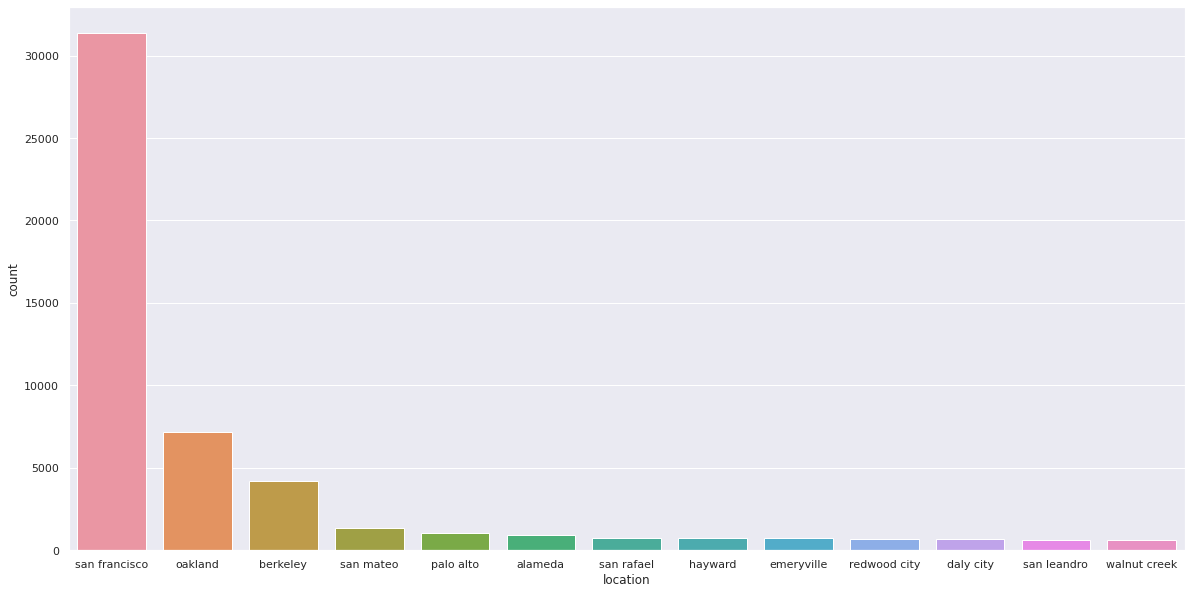

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.location,order=datos['location'].value_counts().index)

In [ ]:
datos['location'].unique()

array(['san francisco', 'oakland', 'berkeley', 'san mateo', 'daly city',
       'san leandro', 'san rafael', 'walnut creek', 'palo alto',
       'emeryville', 'hayward', 'alameda', 'redwood city'], dtype=object)

Nos han quedado 13 ciudades de las cuales las que tienen a más personas son San Francisco, Oakland y Berkeley.

###Offspring (Hijos)

Para analizar las opiniones de la gente sobre los hijos vamos a ver primero que opciones hay:

In [ ]:
datos['offspring'].unique()

array(["doesn't have kids, but might want them", nan, "doesn't want kids",
       "doesn't have kids, but wants them", "doesn't have kids",
       'wants kids', 'has a kid', 'has kids',
       "doesn't have kids, and doesn't want any",
       "has kids, but doesn't want more",
       "has a kid, but doesn't want more", 'might want kids',
       'has a kid, and might want more', 'has kids, and might want more',
       'has a kid, and wants more', 'has kids, and wants more'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, "doesn't have kids, but might want them"),
 Text(0, 0, "doesn't want kids"),
 Text(0, 0, "doesn't have kids, but wants them"),
 Text(0, 0, "doesn't have kids"),
 Text(0, 0, 'wants kids'),
 Text(0, 0, 'has a kid'),
 Text(0, 0, 'has kids'),
 Text(0, 0, "doesn't have kids, and doesn't want any"),
 Text(0, 0, "has kids, but doesn't want more"),
 Text(0, 0, "has a kid, but doesn't want more"),
 Text(0, 0, 'might want kids'),
 Text(0, 0, 'has a kid, and might want more'),
 Text(0, 0, 'has kids, and might want more'),
 Text(0, 0, 'has a kid, and wants more'),
 Text(0, 0, 'has kids, and wants more')]

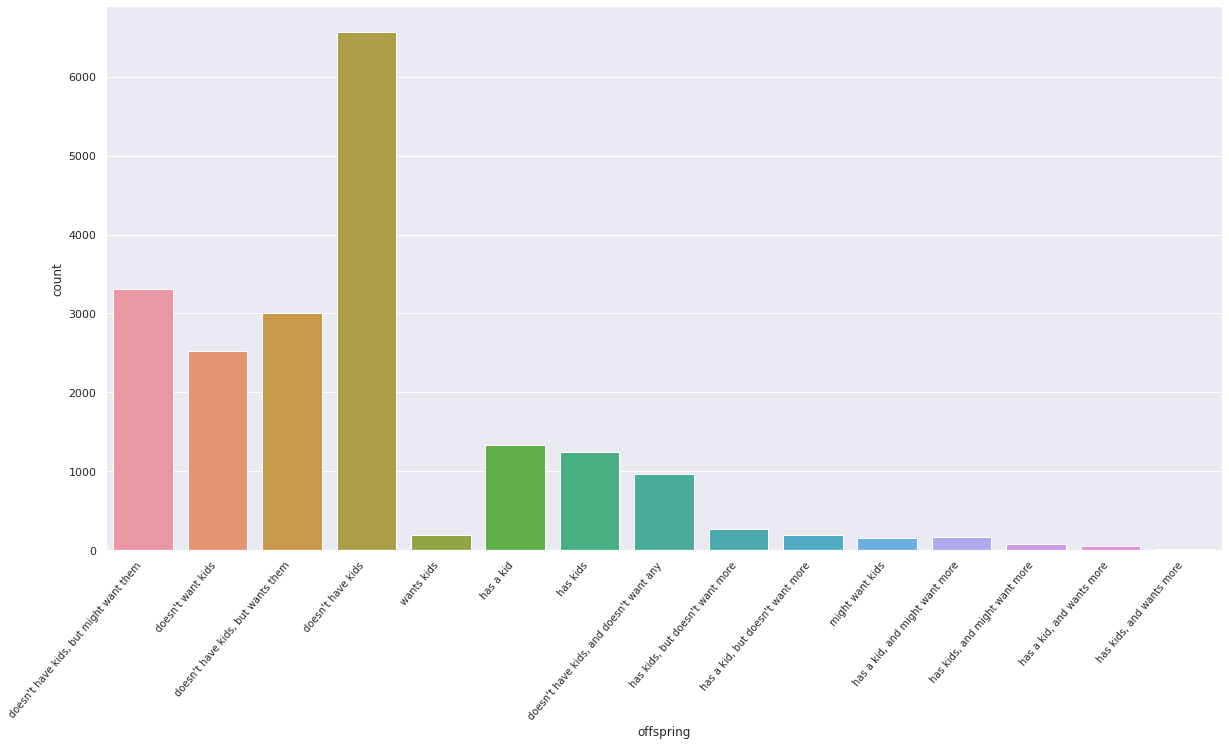

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(datos.offspring)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right", fontsize=10)

Tratar con tantos valores una vez más resulta inviable, vamos a limpiar estas opciones, para ello vamos a tener dos columnas en nuestra tabla, la primera para tener hijos y la segunda para querer más/alguno.

* **Has kids** los posibles valores de esta columna serán 1 para yes, -1 para no y 0 para unkown.
* **Wants kids** los posibles valores de esta columna serán los mismos que la columna anterior, es decir, -1, 0 y 1.



Insertamos las nuevas columnas:

In [ ]:
datos.insert(16, "has_kids", "", True) 
datos.insert(17, "wants_kids", "", True) 

Verificamos que se han insertado en la tabla:

In [ ]:
datos

age  ...                                             essay9
0       22  ...  you want to be swept off your feet! you are ti...
1       35  ...                                                NaN
2       38  ...  you are bright, open, intense, silly, ironic, ...
3       23  ...                              you feel so inclined.
4       29  ...                                                NaN
...    ...  ...                                                ...
59941   59  ...  you are seeking a long term connection of shar...
59942   24  ...     meh if you made it this far you might as well.
59943   42  ...                         we have similar interests.
59944   27  ...              you are interested and interesting...
59945   39  ...  if you have a back-bone, an opinion, a sense o...

[50989 rows x 33 columns]

Procedemos a insertar los valores en las columnas has_kids y wants_kids segun el valor en la columna offspring:

In [ ]:
datos.loc[datos['offspring'] == "doesn't have kids, but might want them", 
          ['has_kids', 'wants_kids'] ] = [-1, 0]

In [ ]:
datos.loc[datos['offspring'].isnull(), 
          ['has_kids', 'wants_kids'] ] = [0, 0]

In [ ]:
datos.loc[datos['offspring'] == "doesn't want kids", 
          ['has_kids', 'wants_kids'] ] = [0, -1]

In [ ]:
datos.loc[datos['offspring'] == "doesn't have kids, but wants them", 
          ['has_kids', 'wants_kids'] ] = [-1, 1]

In [ ]:
datos.loc[datos['offspring'] == "doesn't have kids", 
          ['has_kids', 'wants_kids'] ] = [-1,0]

In [ ]:
datos.loc[datos['offspring'] == "wants kids", 
          ['has_kids', 'wants_kids'] ] = [0,1]

In [ ]:
datos.loc[datos['offspring'] == "has a kid", 
          ['has_kids', 'wants_kids'] ] = [1,0]

In [ ]:
datos.loc[datos['offspring'] == "has kids", 
          ['has_kids', 'wants_kids'] ] = [1,0]

In [ ]:
datos.loc[datos['offspring'] == "doesn't have kids, and doesn't want any", 
          ['has_kids', 'wants_kids'] ] = [-1,-1]

In [ ]:
datos.loc[datos['offspring'] == "has kids, but doesn't want more",
          ['has_kids', 'wants_kids'] ] = [1,-1]

In [ ]:
datos.loc[datos['offspring'] == "has a kid, but doesn't want more",
          ['has_kids', 'wants_kids'] ] = [1,-1]

In [ ]:
datos.loc[datos['offspring'] == "has a kid, and wants more",
          ['has_kids', 'wants_kids'] ] = [1,1]

In [ ]:
datos.loc[datos['offspring'] == "has kids, and might want more",
          ['has_kids', 'wants_kids'] ] = [1,0]

In [ ]:
datos.loc[datos['offspring'] == "might want kids",
          ['has_kids', 'wants_kids'] ] = [0,0]

In [ ]:
datos.loc[datos['offspring'] == "has a kid, and might want more",
          ['has_kids', 'wants_kids'] ] = [1,0]

In [ ]:
datos.loc[datos['offspring'] == "has kids, and wants more",
          ['has_kids', 'wants_kids'] ] = [1,1]

Una vez hemos hecho los cambios, procedemos a observar su distribución:

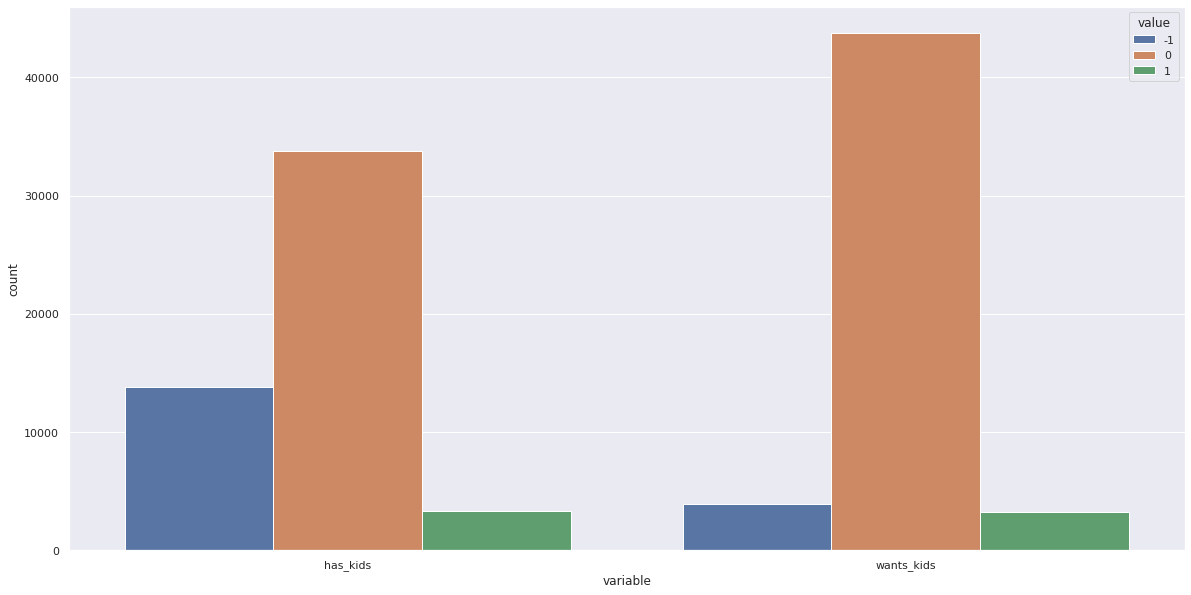

In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(datos[['has_kids','wants_kids']]))

<Figure size 576x432 with 0 Axes>

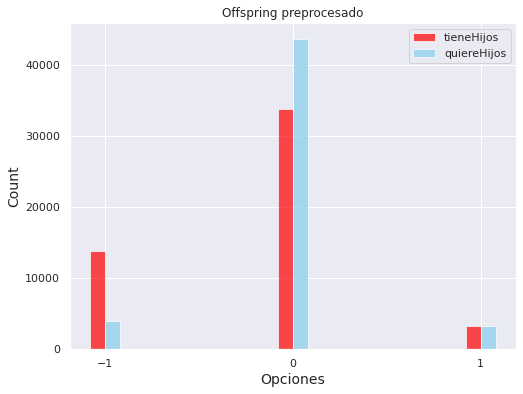

In [ ]:
plt.figure(figsize=(8,6))
y = np.array([-1,0,1])
w=0.1
bins = []

for i in range(len(y)):
  bins.append(y[i]-w)
  bins.append(y[i]+w)

plt.figure(figsize=(8,6))
plt.hist([datos['has_kids'], datos['wants_kids']], bins = bins, label=['tieneHijos', 'quiereHijos'], color=['red','skyblue'], alpha=0.7)
plt.xticks( range(min(y), max(y)+1) )
plt.xlabel("Opciones", size=14)
plt.ylabel("Count", size=14)
plt.title("Offspring preprocesado")
plt.legend()
plt.show()

Ahora que hemos llevado a cabo la inserción de estas dos columnas con sus valores adecuados podemos proceder a eliminar la columna offspring:

In [ ]:
datos.drop('offspring', inplace=True, axis=1)

###Pets (mascotas)

Para las mascotas vamos a observar qué valores distintos hay para escoger:

In [ ]:
datos['pets'].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs and dislikes cats',
       'likes dogs', 'has dogs', 'has dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs',
       'dislikes dogs and has cats'], dtype=object)

Parece que todas las opciones se basan en si te gustan los gatos y/o los perros, por lo que podemos hacer algo parecido a lo que hemos hecho en Offspring con si quiere y/o tiene hijos.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'likes dogs and likes cats'),
 Text(0, 0, 'likes dogs'),
 Text(0, 0, 'likes dogs and has cats'),
 Text(0, 0, 'has dogs'),
 Text(0, 0, 'has dogs and likes cats'),
 Text(0, 0, 'likes dogs and dislikes cats'),
 Text(0, 0, 'has cats'),
 Text(0, 0, 'has dogs and has cats'),
 Text(0, 0, 'likes cats'),
 Text(0, 0, 'has dogs and dislikes cats'),
 Text(0, 0, 'dislikes dogs and likes cats'),
 Text(0, 0, 'dislikes dogs and dislikes cats'),
 Text(0, 0, 'dislikes cats'),
 Text(0, 0, 'dislikes dogs and has cats'),
 Text(0, 0, 'dislikes dogs')]

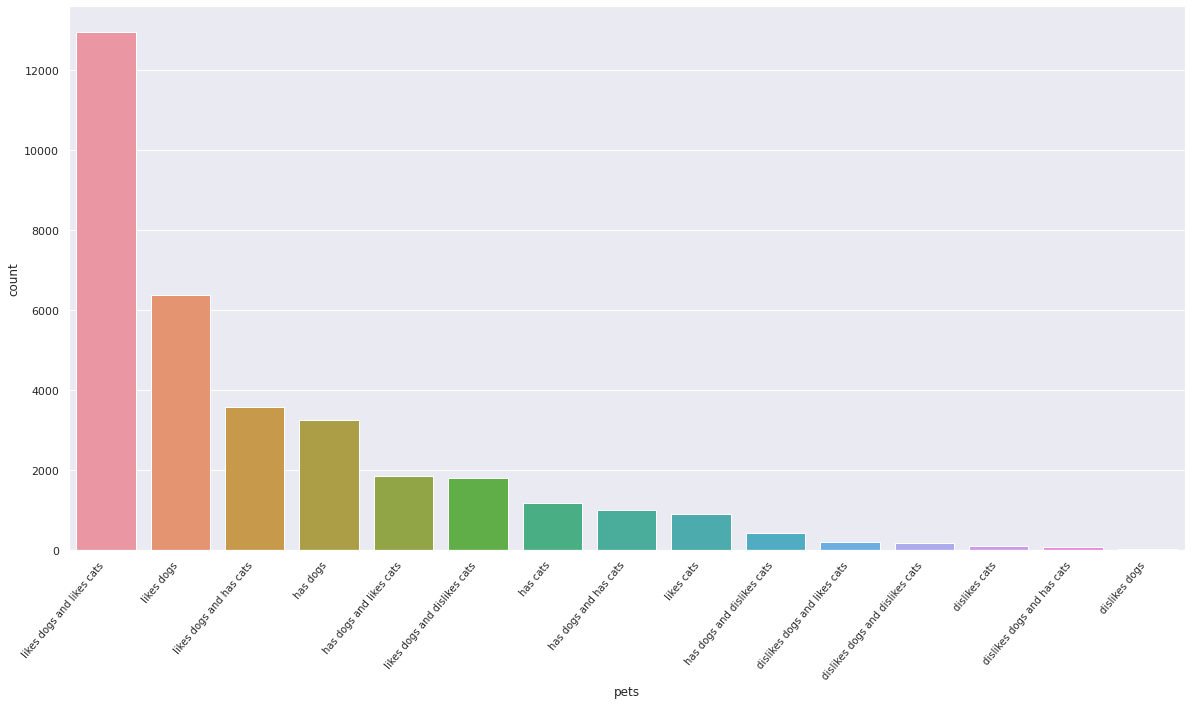

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(datos.pets,order=datos['pets'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right", fontsize=10)

Aqui de la misma forma que en el apartado anterior, vamos a dividir todos estos valores en dos columnas nuevas en nuestra tabla:

* **Dogs**: aquí los valores podrán tomar los valores -1 si no gustan, 0 si no se ha contestado o 1 si gustan.
* **Cats**: podrá tomar los mismos valores que la columna anterior, es decir, -1,0 y 1 pero en relación a los gatos.

In [ ]:
datos.insert(18, "cats", "", True) 
datos.insert(19, "dogs", "", True) 

Una vez insertadas nuestras columnas vamos a realizar las correspondientes inserciones de los valores en ellas segun el valor que haya en pets:

In [ ]:
datos.loc[datos['pets'] == "likes dogs and likes cats", 
          ['cats', 'dogs'] ] = [1, 1]

In [ ]:
datos.loc[datos['pets'] == "has cats", 
          ['cats', 'dogs'] ] = [1, 0]

In [ ]:
datos.loc[datos['pets'] == "likes cats", 
          ['cats', 'dogs'] ] = [1, 0]

In [ ]:
datos.loc[datos['pets'].isnull(), 
          ['cats', 'dogs'] ] = [0, 0]

In [ ]:
datos.loc[datos['pets'] == "has dogs and likes cats", 
          ['cats', 'dogs'] ] = [1, 1]

In [ ]:
datos.loc[datos['pets'] == "likes dogs and has cats", 
          ['cats', 'dogs'] ] = [1, 1]

In [ ]:
datos.loc[datos['pets'] == "likes dogs and dislikes cats", 
          ['cats', 'dogs'] ] = [-1, 1]

In [ ]:
datos.loc[datos['pets'] == "has dogs", 
          ['cats', 'dogs'] ] = [0, 1]

In [ ]:
datos.loc[datos['pets'] == "has dogs and dislikes cats", 
          ['cats', 'dogs'] ] = [-1, 1]

In [ ]:
datos.loc[datos['pets'] == "likes dogs", 
          ['cats', 'dogs'] ] = [0, 1]

In [ ]:
datos.loc[datos['pets'] == "has dogs and has cats", 
          ['cats', 'dogs'] ] = [1, 1]

In [ ]:
datos.loc[datos['pets'] == "dislikes dogs and has cats", 
          ['cats', 'dogs'] ] = [1, -1]

In [ ]:
datos.loc[datos['pets'] == "dislikes dogs and dislikes cats", 
          ['cats', 'dogs'] ] = [-1, -1]

In [ ]:
datos.loc[datos['pets'] == "dislikes cats", 
          ['cats', 'dogs'] ] = [-1, 0]

In [ ]:
datos.loc[datos['pets'] == "dislikes dogs and likes cats", 
          ['cats', 'dogs'] ] = [1, -1]

In [ ]:
datos.loc[datos['pets'] == "dislikes dogs", 
          ['cats', 'dogs'] ] = [0, -1]

Procedemos a observar la distribución de los datos:

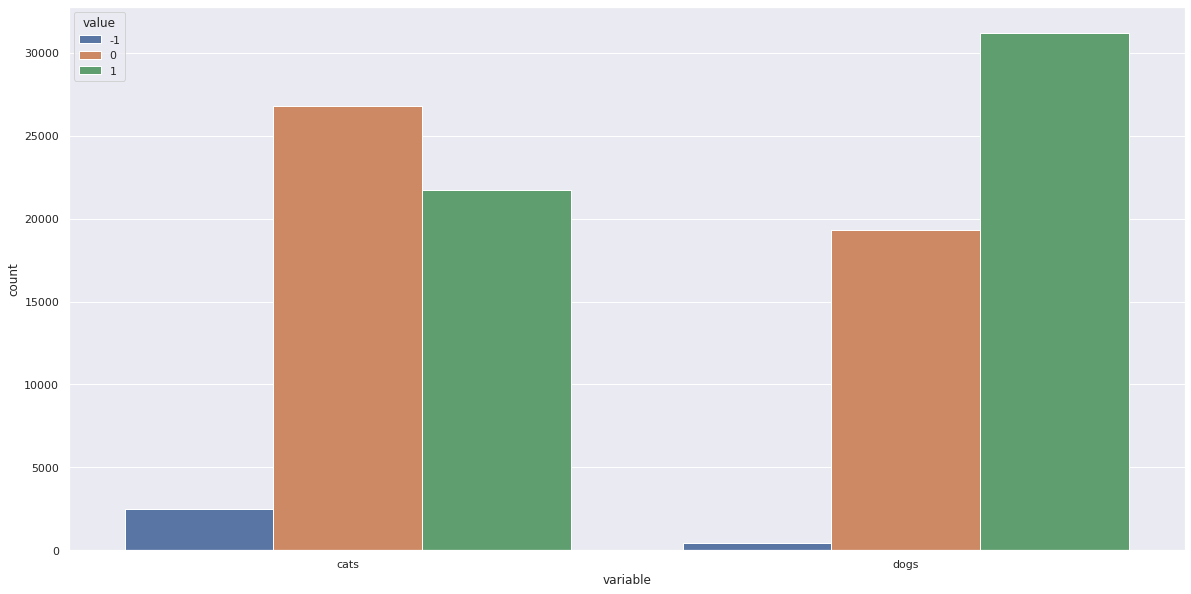

In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(datos[['cats','dogs']]))

Una vez tenemos estas dos columnas rellenas solo falta eliminar nuestra columna pets, pues ya no nos hace falta:

In [ ]:
datos.drop('pets', inplace=True, axis=1)

###Religion (religión)

In [ ]:
datos['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'atheism and laughing about it',
       'christianity and very serious about it', 'other',
       'christianity but not too serious about it', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too serious about it',
       'hinduism and very

Parece que hay muchas opciones de religión y dentro de una misma religión hay diferentes opciones.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'agnosticism'),
 Text(0, 0, 'agnosticism but not too serious about it'),
 Text(0, 0, 'other'),
 Text(0, 0, 'agnosticism and laughing about it'),
 Text(0, 0, 'atheism'),
 Text(0, 0, 'catholicism but not too serious about it'),
 Text(0, 0, 'other and laughing about it'),
 Text(0, 0, 'atheism and laughing about it'),
 Text(0, 0, 'christianity'),
 Text(0, 0, 'christianity but not too serious about it'),
 Text(0, 0, 'judaism but not too serious about it'),
 Text(0, 0, 'other but not too serious about it'),
 Text(0, 0, 'atheism but not too serious about it'),
 Text(0, 0, 'catholicism'),
 Text(0, 0, 'atheism and somewhat serious about it'),
 Text(0, 0, 'other and somewhat serious about it'),
 Text(0, 0, 'christianity and somewhat serious about it'),
 Text(0, 0, 'catholicism and laughing about it'),
 Text(0, 0, 'judaism and laughing about it'),
 Text(0, 0, 'agnosticism and somewhat serious about it'),
 Text(0, 0, 'buddhism but not too serious about it'),
 Text(0, 0, 'judaism'),
 Te

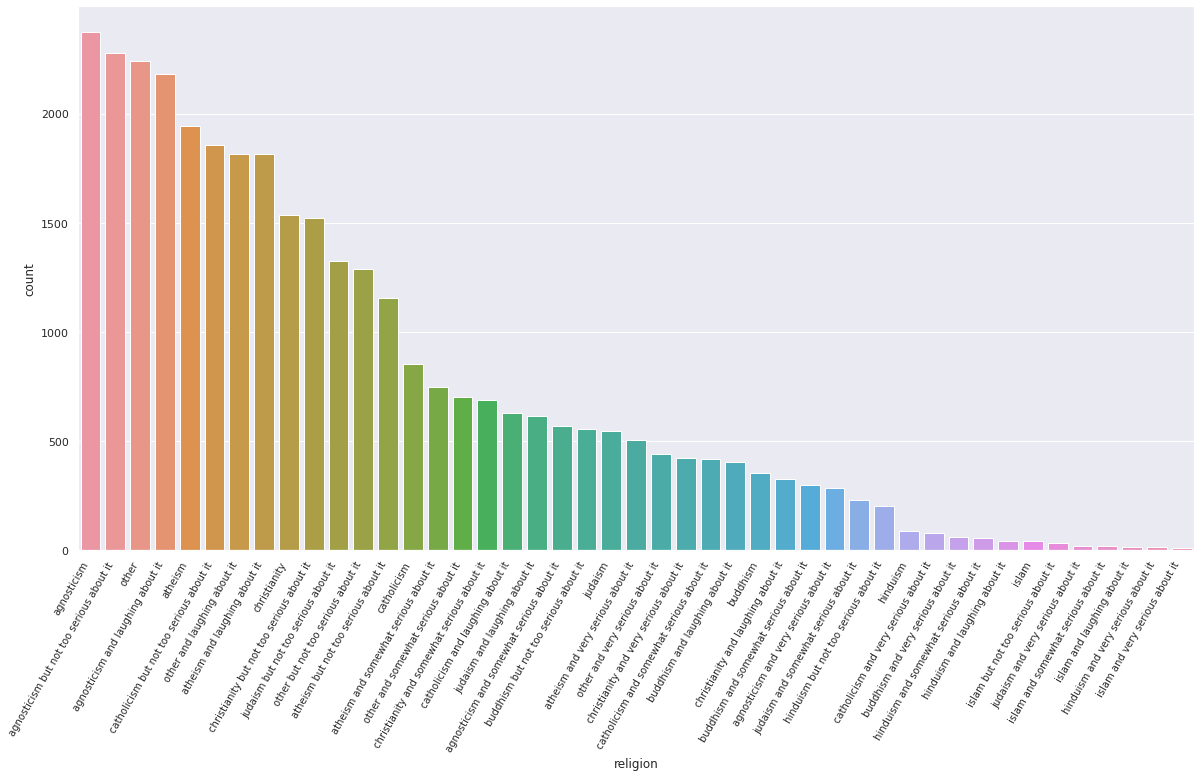

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(datos.religion,order=datos['religion'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right", fontsize=10)

Vamos a asumir que las personas que no hayan rellenado esta sección no siguen ninguna religión o simplemente no le dan importancia. Por otro lado tenemos en cuenta que para las personas que se toman su religión muy en serio o mas o menos serio (somewhat) pasarán simplemente a la categoría de esa misma religión. Tenemos entonces los siguientes valores:

* **agnosticism**
* **atheism**
* **christianity**
* **catholicism**
* **buddhism**
* **judaism**
* **hinduism**
* **islam**
* **other**
* **little/no importance**: aqui entrarían todas las personas que hayan indicado que siguen una religión y les hace gracia o directamente que no se la toman muy en serio, además de los valores NaN.

Vamos primero a sustituir los valores que pasarán a ser poca o ninguna importancia:

In [ ]:
datos.loc[datos['religion'].str.contains("laughing", na=False) == True, 'religion'] = 'little/no importance'
datos.loc[datos['religion'].str.contains("not too serious", na=False) == True, 'religion'] = 'little/no importance'
datos.loc[datos['religion'].isnull(), 'religion'] = 'little/no importance'

Ahora pasaremos a sustituir los valores de nuestra columna donde se incluye la frase very serious/somewhat serious por la primera palabra de esos valores, es decir, por la religión que se menciona que se está tomando en serio. 
Para ello usamos la función split y la posición [0] para obtener hasta el primer espacio:

In [ ]:
for indice in datos.loc[datos['religion'].str.contains("very serious", na=False) == True, 'religion'].index:
  datos['religion'][indice] = datos['religion'][indice].split()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for indice in datos.loc[datos['religion'].str.contains("somewhat serious", na=False) == True, 'religion'].index:
  datos['religion'][indice] = datos['religion'][indice].split()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ahora verificamos que no nos hemos dejado nada por el camino:

In [ ]:
datos['religion'].unique()

array(['agnosticism', 'little/no importance', 'atheism', 'christianity',
       'other', 'catholicism', 'buddhism', 'hinduism', 'judaism', 'islam'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


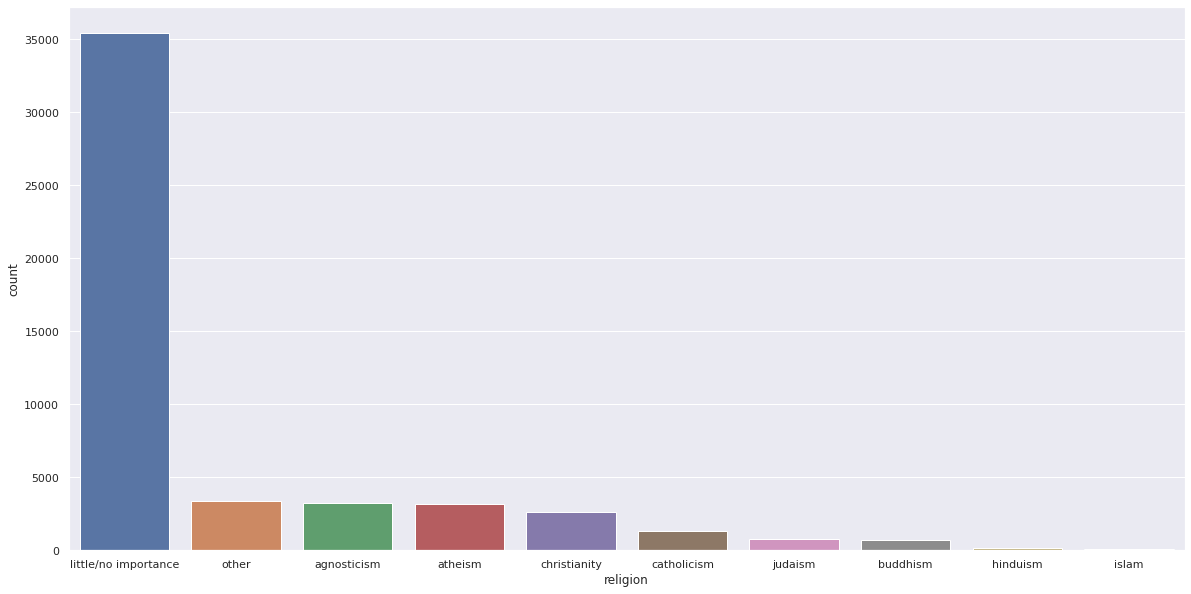

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.religion,order=datos['religion'].value_counts().index)

Una vez hemos hecho esto, nos ha quedado un conjunto de datos mucho más pequeño y más manejable.

###Sign (Signos del zodiaco)

Vamos primero a comprobar los valores únicos que toma esta columna:

In [ ]:
datos['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'gemini but it doesn&rsquo;t matter',
       'gemini and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

Para los signos del zodiaco ocurre lo mismo que con las religiones: tenemos 12 opciones por cada signo y dentro de cada signo diferentes opciones, por lo que tenemos que reducir esto a una cantidad más manejable de opciones.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'gemini and it&rsquo;s fun to think about'),
 Text(0, 0, 'scorpio and it&rsquo;s fun to think about'),
 Text(0, 0, 'leo and it&rsquo;s fun to think about'),
 Text(0, 0, 'libra and it&rsquo;s fun to think about'),
 Text(0, 0, 'taurus and it&rsquo;s fun to think about'),
 Text(0, 0, 'pisces and it&rsquo;s fun to think about'),
 Text(0, 0, 'sagittarius and it&rsquo;s fun to think about'),
 Text(0, 0, 'cancer and it&rsquo;s fun to think about'),
 Text(0, 0, 'virgo and it&rsquo;s fun to think about'),
 Text(0, 0, 'aries and it&rsquo;s fun to think about'),
 Text(0, 0, 'virgo but it doesn&rsquo;t matter'),
 Text(0, 0, 'aquarius and it&rsquo;s fun to think about'),
 Text(0, 0, 'leo but it doesn&rsquo;t matter'),
 Text(0, 0, 'taurus but it doesn&rsquo;t matter'),
 Text(0, 0, 'gemini but it doesn&rsquo;t matter'),
 Text(0, 0, 'cancer but it doesn&rsquo;t matter'),
 Text(0, 0, 'libra but it doesn&rsquo;t matter'),
 Text(0, 0, 'aquarius but it doesn&rsquo;t matter'),
 Text(0, 0, 'capr

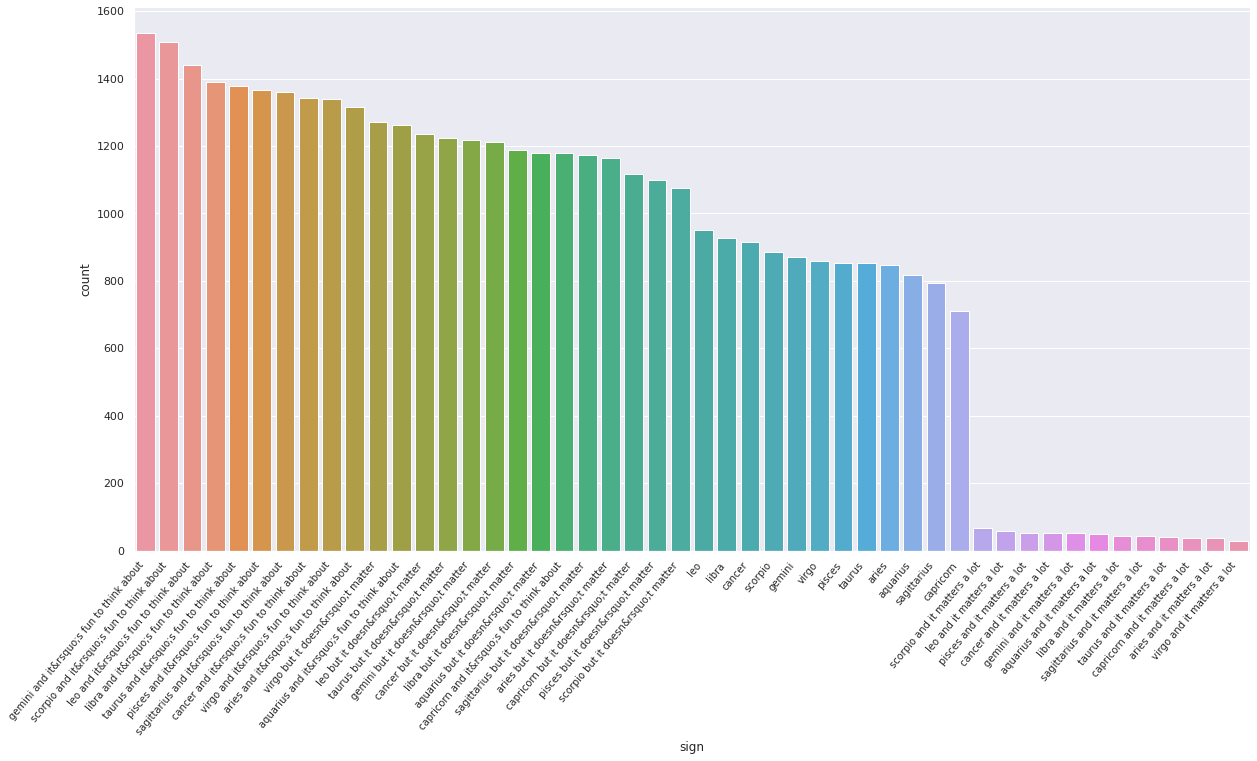

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(datos.sign,order=datos['sign'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right", fontsize=10)

In [ ]:
datos['sign'].nunique()

48

In [ ]:
datos['sign'].isna().sum()

9560

Consideramos que del campo de signo del zodiaco lo importante es si la persona le da importancia a este o no, ya que es lo que puede dar más pie a relacionar a dos personas, más que si son de un signo o de otro, y más aun si no le dan importancia a este.

Para ello vamos a tomar las filas en las que diga que les importa mucho como que les importa el signo, y el resto como que no les importa, ya que si hay opción para añadir que te importa y no es seleccionada, seguramente sea porque no les importe el signo.

In [ ]:
datos.loc[datos['sign'].str.contains("matters a lot",na=False) == False, 'sign'] = 'SignDoesntMatter'

datos.loc[datos['sign'].str.contains("matters a lot",na=False) == True, 'sign'] = 'SignMatters'

In [ ]:
datos['sign'].unique()

array(['SignDoesntMatter', 'SignMatters'], dtype=object)

In [ ]:
datos['sign'].nunique()

2

De esta forma hemos conseguido reducir las 48 opciones en solo 2, mucho más manejables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


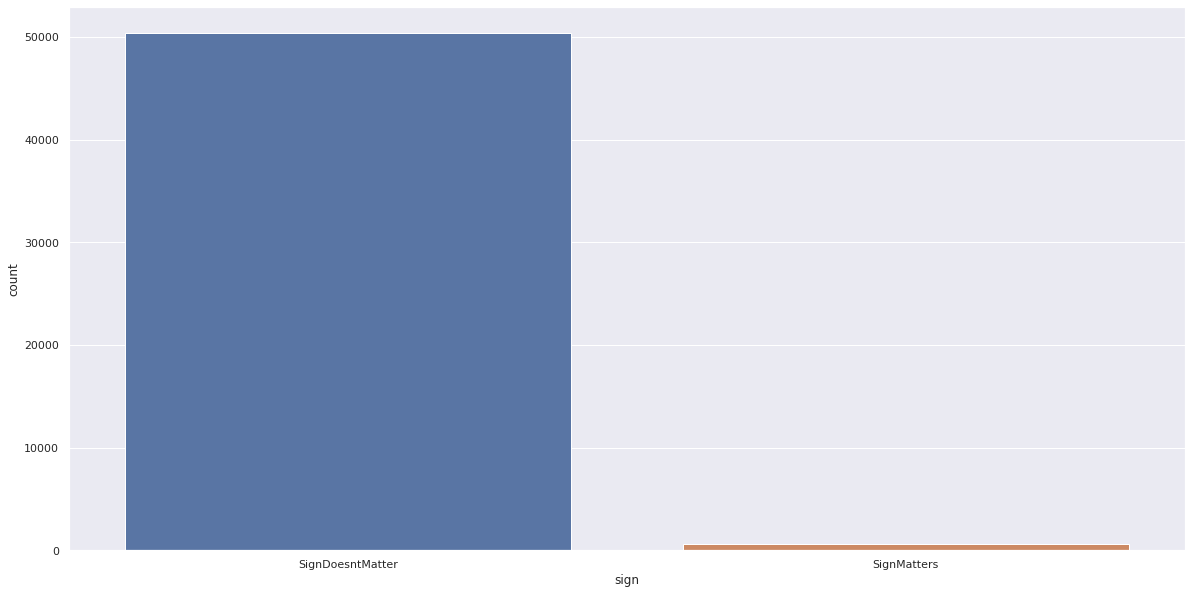

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(datos.sign,order=datos['sign'].value_counts().index)

###Speaks (idiomas)

En primer lugar como con las otras columnas de nuestra tabla vamos a comprobar los valores únicos que toma:

In [ ]:
datos['speaks'].unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)',
       'english (fluently), french (poorly), japanese (poorly), latin (poorly)',
       'english (fluently), french, farsi'], dtype=object)

Como hay 41 personas que no han seleccionado ningún idioma, vamos a eliminarlas ya que no suponen un gran porcentaje de personas.

In [ ]:
datos['speaks'].isna().sum()

41

In [ ]:
indexNames = datos[ (datos['speaks'].isnull() == True)].index
datos.drop(indexNames , inplace=True)

Ahora vamos a limpiar la lista de idiomas de cada persona quitando la palabra del nivel pero si el nivel es 'poorly', se va a eliminar ese idioma, ya que de poco va a servir que pongas ese idioma si apenas sabes hablarlo.

In [ ]:
idiomas = []
for i, row in datos.iterrows():
  idiomas_persona = datos.at[i,'speaks']
  idiomas_persona_sinespacios = idiomas_persona.replace(" ", "")
  lista_idiomas = idiomas_persona_sinespacios.split(',')
  lista_final = []
  for idioma in lista_idiomas:
    if (('poorly' in idioma) == False):
      idioma_a_secas = idioma.split('(')
      if(idioma_a_secas[0] not in idiomas):
        idiomas.append(idioma_a_secas[0])
      lista_final.append(idioma_a_secas[0])
  str_idiomas = ','.join(lista_final)
  datos.at[i,'speaks'] = str_idiomas

In [ ]:
datos['speaks'].unique()

array(['english', 'english,french,c++', 'english,chinese', ...,
       'english,french,arabic,polish', 'english,english,c++,french',
       'english,slovenian,serbian,croatian'], dtype=object)

In [ ]:
datos['speaks'].nunique()

1702

Con esto hemos conseguido reducir la cantidad de valores distintos de casi 7000 a 1700, pero esto no es suficiente. Vamos a ver qué idiomas diferentes se hablan y vamos a hacer lo mismo que con las localizaciones, dejando solo los idiomas más hablados.

In [ ]:
len(idiomas)

77

Para ello vamos a crear un DataFrame en el que vamos a introducir todos los idiomas y la cantidad de gente que tienen ese idioma en su lista de idiomas.

In [ ]:
tablaIdiomas = pd.DataFrame(data = idiomas, columns = ['idioma'])

In [ ]:
personas = []
for idioma in idiomas:
  if(idioma != 'c++'):
    num = len(datos[datos['speaks'].str.contains(idioma)])
    personas.append(num)
  else:
    num = len(datos[datos['speaks'].str.contains('c\+\+')])
    personas.append(num)
tablaIdiomas = pd.DataFrame(data = idiomas, columns = ['idioma'])
tablaIdiomas['npersonas'] = personas

In [ ]:
tablaIdiomas

idioma  npersonas
0     english      50433
1      french       3715
2         c++       1147
3     chinese       2397
4     spanish       8780
..        ...        ...
72   armenian          6
73  sardinian          1
74   estonian         10
75     breton          4
76      welsh          7

[77 rows x 2 columns]

Ahora vamos a sacar el porcentaje de gente que habla ese idioma en comparación con el total de personas.

In [ ]:
porcentajes = []
total = datos.shape[0]
for i in tablaIdiomas['npersonas']:
  porcentaje = i / total * 100
  porcentajes.append(porcentaje)

tablaIdiomas['porcentaje'] = porcentajes
tablaIdiomas

idioma  npersonas  porcentaje
0     english      50433   98.989165
1      french       3715    7.291748
2         c++       1147    2.251315
3     chinese       2397    4.704797
4     spanish       8780   17.233257
..        ...        ...         ...
72   armenian          6    0.011777
73  sardinian          1    0.001963
74   estonian         10    0.019628
75     breton          4    0.007851
76      welsh          7    0.013739

[77 rows x 3 columns]

Probando con diferentes porcentajes de corte, nos decantamos por el 2%, dejando los 7 idiomas más hablados, aunque añadiremos una opción más llamada other, para tener en cuenta a la gente que sepa hablar muchos más idiomas que el resto.

In [ ]:
idiomasFinales = tablaIdiomas[tablaIdiomas['porcentaje'] > 2].sort_values('porcentaje',ascending = False).idioma
idiomasFinales

0     english
4     spanish
1      french
3     chinese
17     german
2         c++
5     italian
Name: idioma, dtype: object

In [ ]:
zero_data = np.zeros(shape=(len(datos),len(idiomasFinales) + 1))
idiomasDf = pd.DataFrame(zero_data, columns=list(idiomasFinales) + ['other'])
idiomasDf = idiomasDf.astype('uint8')
idiomasDf

english  spanish  french  chinese  german  c++  italian  other
0            0        0       0        0       0    0        0      0
1            0        0       0        0       0    0        0      0
2            0        0       0        0       0    0        0      0
3            0        0       0        0       0    0        0      0
4            0        0       0        0       0    0        0      0
...        ...      ...     ...      ...     ...  ...      ...    ...
50943        0        0       0        0       0    0        0      0
50944        0        0       0        0       0    0        0      0
50945        0        0       0        0       0    0        0      0
50946        0        0       0        0       0    0        0      0
50947        0        0       0        0       0    0        0      0

[50948 rows x 8 columns]

In [ ]:
df = pd.DataFrame(data=np.append(datos,idiomasDf,axis = 1), columns=list(datos.columns)+list(idiomasFinales) + ['other'])

In [ ]:
df

age     status sex orientation  ... german c++ italian other
0      22  available   m    straight  ...      0   0       0     0
1      35  available   m    straight  ...      0   0       0     0
2      38  available   m    straight  ...      0   0       0     0
3      23  available   m    straight  ...      0   0       0     0
4      29  available   m    straight  ...      0   0       0     0
...    ..        ...  ..         ...  ...    ...  ..     ...   ...
50943  59  available   f    straight  ...      0   0       0     0
50944  24  available   m    straight  ...      0   0       0     0
50945  42  available   m    straight  ...      0   0       0     0
50946  27  available   m    straight  ...      0   0       0     0
50947  39  available   m         gay  ...      0   0       0     0

[50948 rows x 41 columns]

In [ ]:
for i, row in df.iterrows():
  idiomas_persona = df.at[i,'speaks']
  lista_idiomas = idiomas_persona.split(',')
  for idioma in lista_idiomas:
    if (idioma in list(idiomasFinales)):
      df.at[i,idioma] = 1
    else:
      df.at[i,'other'] = df.at[i,'other'] + 1

In [ ]:
datos = df.drop('speaks', inplace=False, axis=1)
datos

age     status sex orientation  ... german c++ italian other
0      22  available   m    straight  ...      0   0       0     0
1      35  available   m    straight  ...      0   0       0     0
2      38  available   m    straight  ...      0   1       0     0
3      23  available   m    straight  ...      0   0       0     0
4      29  available   m    straight  ...      0   0       0     0
...    ..        ...  ..         ...  ...    ...  ..     ...   ...
50943  59  available   f    straight  ...      0   0       0     0
50944  24  available   m    straight  ...      0   0       0     0
50945  42  available   m    straight  ...      0   0       0     0
50946  27  available   m    straight  ...      0   0       0     0
50947  39  available   m         gay  ...      0   0       0     0

[50948 rows x 40 columns]

Una vez hemos introducido en la tabla de datos la lista de idiomas final y la hemos rellenado con los datos de la columna 'Speaks', pasamos a ver su distribución. Además, vamos a ver cuál es el máximo de idiomas extra que hablan los usuarios.

In [ ]:
datos.sort_values('other')['other']

0        0
32616    0
32618    0
32619    0
32620    0
        ..
25382    4
27948    4
42825    4
19742    4
3470     4
Name: other, Length: 50948, dtype: object

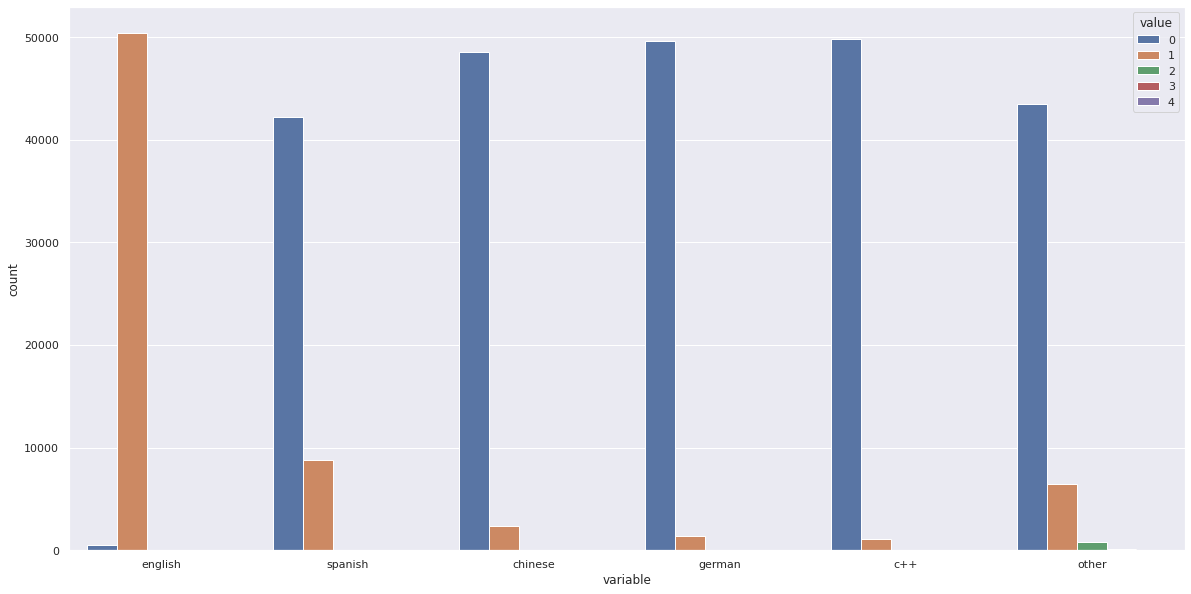

In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(datos[['english','spanish','chinese','german','c++','other']]))

###Essays

Para analizar los essays vamos primero a ver la documentación sobre estos:

* Essay 0: acerca de mí/resumen
* essay 1: que haces ahora mismo en tu vida/ objetivos actuales /aspiraciones
* essay 2: probablemente podria ganarte en / talentos
* essay 3: mi regla de oro/ mis rasgos
* essay 4: la ultima serie que he visto/hobbies (intereses en cuanto a libros, música, series y pelis).
* essay 5: yo valoro/necesito
* essay 6: en que cosas piensas más/intereses. (por ejemplo a la psicología, al amor, a la felicidad, al dinero...)????????????
* essay 7: un día perfecto/momentos.
* essay 8: cosa mas privada que estoy dispuesto a admitir/secretos
* essay 9: lo que realmente estoy buscando/citas.


Para analizar estos datos vamos a importar la biblioteca nltk y vamos a descargar las stop words en inglés ya que como solo hemos dejado la gente de California casi todos (si no todos) los essays estarán en inglés.

In [ ]:
import nltk #natural language toolkit
nltk.download("popular") # required to download the stopwords lists

from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Además del nltk, vamos a descargar la librería language_tool_python, que nos ayudará a comprobar las faltas de ortografía, ya que puede que nos den problemas las faltas de ortografía.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
count_vectorizer = CountVectorizer(stop_words = english_stopwords)
ps = PorterStemmer()#Para sacar la raiz
wl= WordNetLemmatizer()#Para sacr el lema

In [ ]:
!pip install language_tool_python

In [ ]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

Unzipping /tmp/tmp15x2l_7p.zip to /root/.cache/language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.1.zip to /root/.cache/language_tool_python.


Creamos las funciones para eliminar las faltas de ortografía, para sacar la raíz y para sacar el lema.

In [ ]:
def grammar_check(corpus): 
  
  new_corpus = []
  for word in corpus:

    #string = ''.join(corpus)
    matches = tool.check(word)#matches = tool.check(string)
    
    for rules in matches:
        if len(rules.replacements)>0:
          new_corpus.append(rules.replacements[0])
        else:
          new_corpus.append(word)
  return new_corpus

In [ ]:
def stemmer(corpus):
  list_essay = []
  splits = corpus.split()
  for word in splits:
    raiz = ps.stem(word)
    list_essay.append(raiz)
  str_ps = ' '.join(list_essay)
  return list_essay

In [ ]:
def lematizer(corpus):
  list_essay = []
  splits = corpus.split()
  for word in splits:
    raiz = wl.lemmatize(word)
    list_essay.append(raiz)
  str_ps = ' '.join(list_essay)
  return list_essay

Debido a la gran cantidad de palabras distintas que hay en todos los essays vamos a utilizar LDA para reducir las columnas distintas que podrían salir reduciéndolo a los topics principales de estos. Para ello vamos a probar dos opciones:

* Usar LDA juntando los 10 essays de cada persona en un gran essay que nos dejará muy pocas columnas finales.
* Usar LDA separando cada essay que nos dejará muchas más columnas pero será más preciso.

####LDA usando todos los essays a la vez

Para ello vamos a probar primero a tomar el essay de la primera persona para ver cómo sería con este el resultado de preprocesar todos los essays a la vez:

In [ ]:
corpus = [datos['essay0'][0],datos['essay1'][0],datos['essay2'][0],datos['essay3'][0],datos['essay4'][0],datos['essay5'][0],datos['essay6'][0],datos['essay7'][0],datos['essay8'][0],datos['essay9'][0]]
corpus

["about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  about you:  you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, and tel

In [ ]:
#elimina las stop_words (rtículos, pronombres, preposiciones, etc)
X = count_vectorizer.fit_transform(corpus)

print(X.toarray())
count_vectorizer.get_feature_names()

[[2 0 0 ... 2 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['able',
 'absurdistan',
 'aesop',
 'agent',
 'anything',
 'arrested',
 'asian',
 'attention',
 'bend',
 'better',
 'bite',
 'blend',
 'blow',
 'book',
 'books',
 'borgia',
 'california',
 'catch',
 'catcher',
 'caucasian',
 'cell',
 'choice',
 'classes',
 'cliches',
 'club',
 'coffee',
 'company',
 'complexity',
 'concepts',
 'considered',
 'conversations',
 'cool',
 'cry',
 'currently',
 'decided',
 'deep',
 'delaware',
 'destroyers',
 'development',
 'difference',
 'domestic',
 'dress',
 'duality',
 'dumb',
 'dumbest',
 'either',
 'everyday',
 'except',
 'export',
 'extra',
 'favorite',
 'feet',
 'felt',
 'find',
 'finding',
 'five',
 'food',
 'foot',
 'forge',
 'forwarding',
 'free',
 'freight',
 'friend',
 'funny',
 'game',
 'george',
 'given',
 'gladiator',
 'good',
 'got',
 'guessing',
 'guy',
 'hail',
 'half',
 'hang',
 'hearted',
 'hints',
 'hiring',
 'hours',
 'house',
 'humorous',
 'ideas',
 'import',
 'instead',
 'intellectual',
 'international',
 'kind',
 'kiss',
 'know',


In [ ]:
ps.stem('working')

'work'

In [ ]:
wl.lemmatize('working')

'working'

stemming parece más agresivo que lemmatizing por lo que usaremos stemming para que queden menos palabras distintas.

Además, vamos a probar a quitar las faltas de ortografía:


In [ ]:
# get the matches
string = ''.join(corpus)
matches = tool.check(string)

In [ ]:
my_mistakes = []
my_corrections = []
start_positions = []
end_positions = []

for rules in matches:
    if len(rules.replacements)>0:
        start_positions.append(rules.offset)
        end_positions.append(rules.errorLength+rules.offset)
        my_mistakes.append(string[rules.offset:rules.errorLength+rules.offset])
        my_corrections.append(rules.replacements[0])
    

    
new_corpus = list(string)


for m in range(len(start_positions)):
    for i in range(len(string)):
        new_corpus[start_positions[m]] = my_corrections[m]
        if (i>start_positions[m] and i<end_positions[m]):
            new_corpus[i]=""
    
new_corpus = "".join(new_corpus)
new_corpus

"About me: I would love to think that I was some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. Can't say I can tell the difference. I love to talk about ideas and concepts. I forge odd metaphors instead of reciting clichés. Like the similarities between a friend of mine's house and an underwater salt mine. My favorite word is salt by the way (weird choice I know). To me most things in life are better than metaphors. I seek to make myself a little better every day, in some productively lazy way. Got tired of tying my shoes. Considered hiring a five-year-old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  About you: you love to have really serious, really deep conversations about really silly stuff. You have to be willing to snap me out of a light-hearted rant with a kiss. You don't have to be funny, but you have to be able to make me laugh. You should be able to bend spoons with your mind, and telepath

Solo una fila de la tabla ha tardado 1 minuto, por lo que si tenemos que hacer esto con las 50000 filas, no terminará en tiempos razonables, por lo que tendremos que prescindir de esto.

Aun así, vamos a utilizar el corpus con los essays corregidos para seguir con el proceso de preprocesar el texto. Ahora vamos a pasar a eliminar las stop words.

In [ ]:
new_corpus = grammar_check(corpus)

X = count_vectorizer.fit_transform(new_corpus)

print(X.toarray())
count_vectorizer.get_feature_names()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['absurdist',
 'aesop',
 'asian',
 'books',
 'borgia',
 'california',
 'caucasian',
 'cell',
 'clichés',
 'considered',
 'currently',
 'day',
 'delaware',
 'duality',
 'every',
 'extra',
 'finding',
 'five',
 'food',
 'gallon',
 'game',
 'george',
 'got',
 'hail',
 'hearted',
 'import',
 'light',
 'like',
 'making',
 'mary',
 'monty',
 'movies',
 'old',
 'online',
 'perhaps',
 'python',
 'ranting',
 'shelter',
 'shows',
 'similarities',
 'sunday',
 'thorogood',
 'thrones',
 'trying',
 'valkyrie',
 'water',
 'whisper',
 'year']

Realizo la extracción de la raíz de las palabras:

In [ ]:
list_essay = []
for p in count_vectorizer.get_feature_names():
  raiz = ps.stem(p)
  print(p, " : ", raiz)
  if raiz not in list_essay:
    list_essay.append(raiz)
str_ps = ','.join(list_essay)
#Lista de palabras raiz no stop_words, de los essay de 1º persona:
str_ps

absurdist  :  absurdist
aesop  :  aesop
asian  :  asian
books  :  book
borgia  :  borgia
california  :  california
caucasian  :  caucasian
cell  :  cell
clichés  :  cliché
considered  :  consid
currently  :  current
day  :  day
delaware  :  delawar
duality  :  dualiti
every  :  everi
extra  :  extra
finding  :  find
five  :  five
food  :  food
gallon  :  gallon
game  :  game
george  :  georg
got  :  got
hail  :  hail
hearted  :  heart
import  :  import
light  :  light
like  :  like
making  :  make
mary  :  mari
monty  :  monti
movies  :  movi
old  :  old
online  :  onlin
perhaps  :  perhap
python  :  python
ranting  :  rant
shelter  :  shelter
shows  :  show
similarities  :  similar
sunday  :  sunday
thorogood  :  thorogood
thrones  :  throne
trying  :  tri
valkyrie  :  valkyri
water  :  water
whisper  :  whisper
year  :  year


'absurdist,aesop,asian,book,borgia,california,caucasian,cell,cliché,consid,current,day,delawar,dualiti,everi,extra,find,five,food,gallon,game,georg,got,hail,heart,import,light,like,make,mari,monti,movi,old,onlin,perhap,python,rant,shelter,show,similar,sunday,thorogood,throne,tri,valkyri,water,whisper,year'

Al realizar todo esto, el número de palabras finales se reduce mucho, perfecto para poder realizar a continuación el LDA para sacar los topics. Tras esto, procedemos a realizar esto usando ya todas las filas:

Primero vamos a cambiar los valores nan por textos vacíos, para que así no nos de problemas.

In [ ]:
for i in range(0,10):
  essay = "essay" + str(i)
  datos.loc[datos[essay].isnull(), essay] = ' '

Procedemos a mostrar el proceso que se va a realizar con todas las filas mostrandolo con la primera fila como ejemplos: primero vamos a juntar los essays, luego vamos a eliminar las stop words, luego vamos a eliminar todas las palabras formadas por números o símbolos y por último vamos a dejar las palabras en miníusculas.

In [ ]:
essay0 = datos.at[0,'essay0']
essay1 = datos.at[0,'essay1']
essay2 = datos.at[0,'essay2']
essay3 = datos.at[0,'essay3']
essay4 = datos.at[0,'essay4']
essay5 = datos.at[0,'essay5']
essay6 = datos.at[0,'essay6']
essay7 = datos.at[0,'essay7']
essay8 = datos.at[0,'essay8']
essay9 = datos.at[0,'essay9']
 
corpus = [essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9] #Juntamos los essays
str_corpus = ','.join(corpus) 
 
stop_words = set(stopwords.words('english')) #quitamos stopwords
  
word_tokens = word_tokenize(str_corpus)  #Solo cogemos palabras formadas por letras
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] #Trasnformamos masyusculas a minusculas
 
clean_corpus = []
 
for name in filtered_sentence:
  eliminar = False
  for character in name:
    if (not character.isalpha()):
      eliminar = True
  if (eliminar == False):
    clean_corpus.append(name.lower())
 
clean_corpus

['would',
 'love',
 'think',
 'kind',
 'intellectual',
 'either',
 'dumbest',
 'smart',
 'guy',
 'smartest',
 'dumb',
 'guy',
 'ca',
 'say',
 'tell',
 'difference',
 'love',
 'talk',
 'ideas',
 'concepts',
 'forge',
 'odd',
 'metaphors',
 'instead',
 'reciting',
 'cliches',
 'like',
 'simularities',
 'friend',
 'mine',
 'house',
 'underwater',
 'salt',
 'mine',
 'favorite',
 'word',
 'salt',
 'way',
 'weird',
 'choice',
 'know',
 'things',
 'life',
 'better',
 'metaphors',
 'seek',
 'make',
 'little',
 'better',
 'everyday',
 'productively',
 'lazy',
 'way',
 'got',
 'tired',
 'tying',
 'shoes',
 'considered',
 'hiring',
 'five',
 'year',
 'old',
 'would',
 'probably',
 'tie',
 'shoes',
 'decided',
 'wear',
 'leather',
 'shoes',
 'dress',
 'shoes',
 'love',
 'really',
 'serious',
 'really',
 'deep',
 'conversations',
 'really',
 'silly',
 'stuff',
 'willing',
 'snap',
 'light',
 'hearted',
 'rant',
 'kiss',
 'funny',
 'able',
 'make',
 'laugh',
 'able',
 'bend',
 'spoons',
 'mind',
 't

In [ ]:
corpus_list = []
for i, row in datos.iterrows():
  essay0 = datos.at[i,'essay0']
  essay1 = datos.at[i,'essay1']
  essay2 = datos.at[i,'essay2']
  essay3 = datos.at[i,'essay3']
  essay4 = datos.at[i,'essay4']
  essay5 = datos.at[i,'essay5']
  essay6 = datos.at[i,'essay6']
  essay7 = datos.at[i,'essay7']
  essay8 = datos.at[i,'essay8']
  essay9 = datos.at[i,'essay9']

  corpus = [essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9] #Juntamos los essays
  str_corpus = ','.join(corpus)

  stop_words = set(stopwords.words('english'))  #Quitamos stop_words
    
  word_tokens = word_tokenize(str_corpus)  #Solo cogemos palabras formadas por letras
    
  filtered_sentence = [w for w in word_tokens if not w in stop_words] #Convertimos mayusculas en minusculas

  clean_corpus = []

  for name in filtered_sentence:
    eliminar = False
    for character in name:
      if (not character.isalpha()):
        eliminar = True
    if (eliminar == False):
      clean_corpus.append(name.lower()) 

  #copus_stemmed = stemmer(' '.join(clean_corpus))

  corpus_list.append(' '.join(clean_corpus))

In [ ]:
corpus_list

['would love think kind intellectual either dumbest smart guy smartest dumb guy ca say tell difference love talk ideas concepts forge odd metaphors instead reciting cliches like simularities friend mine house underwater salt mine favorite word salt way weird choice know things life better metaphors seek make little better everyday productively lazy way got tired tying shoes considered hiring five year old would probably tie shoes decided wear leather shoes dress shoes love really serious really deep conversations really silly stuff willing snap light hearted rant kiss funny able make laugh able bend spoons mind telepathically make smile still work love life cool letting wind blow extra points reading guessing favorite video game hints given yet lastly good attention currently working international agent freight forwarding company import export domestic know works online classes trying better free time perhaps hours worth good book video game lazy making people laugh ranting good saltin

Una vez esto, vamos a realizar el bag of words con CountVectorizer:

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
tf = tf_vectorizer.fit_transform(corpus_list)
tf_vectorizer.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaand',
 'aaaaaaaand',
 'aaaaaaand',
 'aaaaaalmost',
 'aaaaaand',
 'aaaaah',
 'aaaaand',
 'aaaah',
 'aaaahhh',
 'aaaand',
 'aaaannnd',
 'aaah',
 'aaahh',
 'aaahhh',
 'aaand',
 'aaannnd',
 'aaannndddd',
 'aab',
 'aah',
 'aai',
 'aaj',
 'aaliyah',
 'aalyiah',
 'aam',
 'aand',
 'aardman',
 'aardvark',
 'aargh',
 'aaron',
 'aaronofsky',
 'aaronovitch',
 'aas',
 'aau',
 'aawww',
 'ab',
 'aba',
 'ababa',
 'aback',
 'abacus',
 'abaddon',
 'abagnale',
 'abalone',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abarat',
 'abba',
 'abbas',
 'abbastanza',
 'abbey',
 'abbie',
 'abbot',
 'abbott',
 'abbreviate',
 'abbreviated',
 'abbreviation',
 'abbreviations',
 'abbrevs',
 'abby',
 'abc',
 'abcd',
 'abd',
 'abdc',
 'abdel',
 'abdelli',
 'abdomen',
 'abducted',
 'abduction',
 'abdul',
 'abdullah',
 'abe',
 'abed',
 'abel',
 'abelard',
 'abelton',
 'aber',
 'abercrombie',
 'aberlour',
 'aberrant',
 'aberration',
 'abetting',
 'abfab',
 'abhor',
 'abhorre

Por último vamos a usar LDA para sacar los topics:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_components = 15
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el texto libre:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Temas identificados para el texto libre:
Topic #0: confederacy dunces heartbreaking staggering genius khan directing hygiene cults carne swag ali meridian asada descendants rollerblading lace readers tu nooks
Topic #1: http queer gender vegan butler radical iced compass trans sexuality gardener femme octavia identify sweater feminism anarchist lana rey genderqueer
Topic #2: surface neruda luckily pablo hawaiian arabic swimmer relation rooted quinn lacrosse nazi darkest stems insignificant nacho filet toddler cravings maniac
Topic #3: kong tan hong whisky separated trumpet gloss scottish command needle az norway nerdiness toaster toots doo immersing maytals pessimistic malaysia
Topic #4: music books food movies john black david radiohead men beatles city bob tv art shows american sunshine new mad james
Topic #5: people life like love things know time think good want world make way really feel looking say open person relationship
Topic #6: injury enlightened bucks oryx crake hospitals jo

Al sacar los topics vemos que no se entienden casi y probando con diferentes números de topics, ninguno satisface nuestras expectativas, por lo que pasamos a utilizar los essays por separado.

####LDA para bag of words separando por essays

Para este caso, vamos a realizar lo mismo que con todos, pero separando por essay, por lo que vamos a repetirlo todo.

In [ ]:
for i in range(0,10):
  essay = "essay" + str(i)
  datos.loc[datos[essay].isnull(), essay] = ' '

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_components = 10
n_top_words = 15


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
def limpiarCorpus(documento):

  stop_words = set(stopwords.words('english'))  
    
  documento_limpio = []

  for corpus in documento:  
    
    word_tokens = word_tokenize(corpus)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    corpus_limpio = []

    for name in filtered_sentence:
      eliminar = False
      for character in name:
        if (not character.isalpha()):
          eliminar = True
      if (eliminar == False):
        palabra = name.lower()
        corpus_limpio.append(ps.stem(palabra))

    str_corpus_limpio = ' '.join(corpus_limpio)

    documento_limpio.append(str_corpus_limpio)

  return documento_limpio

Ahora vamos a sacar los topics de cada essay. Para ello primero vamos a pasar cada essay a una lista, luego vamos a limpiar los corpus con la función mencionada anteriormente y por último vamos a pasarlo al bag of words para ser analizado con LDA.

Además, vamos a sacar los 10 topics de cada essay y convertirlos en DataFrames, indicando para cada fila qué topics trata.

Essay 0:

In [ ]:
documento = datos['essay0'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay0 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay0.fit_transform(documentoLimpio)
tf_vectorizer_essay0.get_feature_names()

['aa',
 'aaa',
 'aaron',
 'aau',
 'ab',
 'aback',
 'abalon',
 'abandon',
 'abbey',
 'abbrevi',
 'abc',
 'abe',
 'aber',
 'abercrombi',
 'abhor',
 'abid',
 'abil',
 'abit',
 'abl',
 'abnorm',
 'aboard',
 'abod',
 'abomin',
 'abort',
 'abound',
 'abraham',
 'abras',
 'abreast',
 'abridg',
 'abroad',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absinth',
 'absolut',
 'absolutli',
 'absorb',
 'abstain',
 'abstract',
 'abstractli',
 'absurd',
 'absurdist',
 'absurdli',
 'abt',
 'abu',
 'abund',
 'abundantli',
 'abus',
 'abyss',
 'ac',
 'academ',
 'academi',
 'academia',
 'acceler',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessor',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'acclim',
 'accommod',
 'accomod',
 'accompani',
 'accomplic',
 'accomplish',
 'accord',
 'accordingli',
 'accordion',
 'accost',
 'account',
 'accross',
 'accru',
 'accumul',
 'accur',
 'accuraci',
 'accus',
 'accustom',
 'ace',
 'acerb',
 'ach',
 'acheiv',
 'achiev',
 'achil',
 'achingli',
 'acid',
 'a

In [ ]:
lda_essay0 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay0.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay0:")
tf_feature_names = tf_vectorizer_essay0.get_feature_names()
print_top_words(lda_essay0, tf_feature_names, n_top_words)

Temas identificados para el essay0:
Topic #0: use write like read word summari wear think make song sing book probabl profil car
Topic #1: love life peopl someon look enjoy thing like friend good time person live new make
Topic #2: day world walk hot beauti burn man water space law night everi star bodi favorit
Topic #3: year live san bay francisco new area work love citi sf travel school grew born
Topic #4: like peopl know thing realli think time want make say look good pretti tri love
Topic #5: sex queer sexual gender poli male head lover portland polyamor identifi polit feminist folk kinki
Topic #6: perfect believ man word heart human woman knowledg dream soul action moment women understand true
Topic #7: love like enjoy play good time new friend music thing movi hike watch work tri
Topic #8: music art film danc artist http write jazz hop perform project memori record band hip
Topic #9: im na dont wan strang attempt dog cat gon whiskey valley lol ive old ladi



In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay0.get_feature_names()

for topic_idx, topic in enumerate(lda_essay0.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay0_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay0_topics[corpus_idx][topic_idx] = 1

essay0_topics = essay0_topics.astype(bool)

In [ ]:
np.array(essay0_topics)

array([[ True,  True,  True, ...,  True, False,  True],
       [ True,  True, False, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
column_values = ['E0_T0','E0_T1','E0_T2','E0_T3','E0_T4','E0_T5','E0_T6','E0_T7','E0_T8','E0_T9']

df0 = pd.DataFrame(data=essay0_topics,columns=column_values)

Essay 1:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay1 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay1.fit_transform(documentoLimpio)

In [ ]:
lda_essay1 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay1.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 1:")
tf_feature_names = tf_vectorizer_essay1.get_feature_names()
print_top_words(lda_essay1, tf_feature_names, n_top_words)

Temas identificados para el essay 1:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay1.get_feature_names()

for topic_idx, topic in enumerate(lda_essay1.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay1_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay1_topics[corpus_idx][topic_idx] = 1

essay1_topics = essay1_topics.astype(bool)

In [ ]:
column_values = ['E1_T0','E1_T1','E1_T2','E1_T3','E1_T4','E1_T5','E1_T6','E1_T7','E1_T8','E1_T9']

df1 = pd.DataFrame(data=essay1_topics,columns=column_values)

Essay 2:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay2 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay2.fit_transform(documentoLimpio)

In [ ]:
lda_essay2 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay2.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 2:")
tf_feature_names = tf_vectorizer_essay2.get_feature_names()
print_top_words(lda_essay2, tf_feature_names, n_top_words)

Temas identificados para el essay 2:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay2.get_feature_names()

for topic_idx, topic in enumerate(lda_essay2.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay2_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay2_topics[corpus_idx][topic_idx] = 1

essay2_topics = essay2_topics.astype(bool)

In [ ]:
column_values = ['E2_T0','E2_T1','E2_T2','E2_T3','E2_T4','E2_T5','E2_T6','E2_T7','E2_T8','E2_T9']

df2 = pd.DataFrame(data=essay2_topics,columns=column_values)

Essay 3:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay3 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay3.fit_transform(documentoLimpio)

In [ ]:
lda_essay3 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay3.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 3:")
tf_feature_names = tf_vectorizer_essay3.get_feature_names()
print_top_words(lda_essay3, tf_feature_names, n_top_words)

Temas identificados para el essay 3:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay3.get_feature_names()

for topic_idx, topic in enumerate(lda_essay3.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay3_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay3_topics[corpus_idx][topic_idx] = 1

essay3_topics = essay3_topics.astype(bool)

In [ ]:
column_values = ['E3_T0','E3_T1','E3_T2','E3_T3','E3_T4','E3_T5','E3_T6','E3_T7','E3_T8','E3_T9']

df3 = pd.DataFrame(data=essay3_topics,columns=column_values)

Essay 4:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay4 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay4.fit_transform(documentoLimpio)

In [ ]:
lda_essay4 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay4.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 4:")
tf_feature_names = tf_vectorizer_essay4.get_feature_names()
print_top_words(lda_essay4, tf_feature_names, n_top_words)

Temas identificados para el essay 4:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay4.get_feature_names()

for topic_idx, topic in enumerate(lda_essay4.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay4_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay4_topics[corpus_idx][topic_idx] = 1

essay4_topics = essay4_topics.astype(bool)

In [ ]:
column_values = ['E4_T0','E4_T1','E4_T2','E4_T3','E4_T4','E4_T5','E4_T6','E4_T7','E4_T8','E4_T9']

df4 = pd.DataFrame(data=essay4_topics,columns=column_values)

Essay 5:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay5 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay5.fit_transform(documentoLimpio)

In [ ]:
lda_essay5 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay5.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 5:")
tf_feature_names = tf_vectorizer_essay5.get_feature_names()
print_top_words(lda_essay5, tf_feature_names, n_top_words)

Temas identificados para el essay 5:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay5.get_feature_names()

for topic_idx, topic in enumerate(lda_essay5.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay5_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay5_topics[corpus_idx][topic_idx] = 1

essay5_topics = essay5_topics.astype(bool)

In [ ]:
column_values = ['E5_T0','E5_T1','E5_T2','E5_T3','E5_T4','E5_T5','E5_T6','E5_T7','E5_T8','E5_T9']

df5 = pd.DataFrame(data=essay5_topics,columns=column_values)

Essay 6:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay6 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay6.fit_transform(documentoLimpio)

In [ ]:
lda_essay6 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay6.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 6:")
tf_feature_names = tf_vectorizer_essay6.get_feature_names()
print_top_words(lda_essay6, tf_feature_names, n_top_words)

Temas identificados para el essay 6:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay6.get_feature_names()

for topic_idx, topic in enumerate(lda_essay6.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay6_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay6_topics[corpus_idx][topic_idx] = 1

essay6_topics = essay6_topics.astype(bool)

In [ ]:
column_values = ['E6_T0','E6_T1','E6_T2','E6_T3','E6_T4','E6_T5','E6_T6','E6_T7','E6_T8','E6_T9']

df6 = pd.DataFrame(data=essay6_topics,columns=column_values)

Essay 7:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay7 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay7.fit_transform(documentoLimpio)

In [ ]:
lda_essay7 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay7.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 7:")
tf_feature_names = tf_vectorizer_essay7.get_feature_names()
print_top_words(lda_essay7, tf_feature_names, n_top_words)

Temas identificados para el essay 7:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay7.get_feature_names()

for topic_idx, topic in enumerate(lda_essay7.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay7_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay7_topics[corpus_idx][topic_idx] = 1

essay7_topics = essay7_topics.astype(bool)

In [ ]:
column_values = ['E7_T0','E7_T1','E7_T2','E7_T3','E7_T4','E7_T5','E7_T6','E7_T7','E7_T8','E7_T9']

df7 = pd.DataFrame(data=essay7_topics,columns=column_values)

Essay 8:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay8 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay8.fit_transform(documentoLimpio)

In [ ]:
lda_essay8 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay8.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 8:")
tf_feature_names = tf_vectorizer_essay8.get_feature_names()
print_top_words(lda_essay8, tf_feature_names, n_top_words)

Temas identificados para el essay 8:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay8.get_feature_names()

for topic_idx, topic in enumerate(lda_essay8.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay8_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay8_topics[corpus_idx][topic_idx] = 1

essay8_topics = essay8_topics.astype(bool)

In [ ]:
column_values = ['E8_T0','E8_T1','E8_T2','E8_T3','E8_T4','E8_T5','E8_T6','E8_T7','E8_T8','E8_T9']

df8 = pd.DataFrame(data=essay8_topics,columns=column_values)

Essay 9:

In [ ]:
documento = datos['essay1'].tolist()
documentoLimpio = limpiarCorpus(documento)
tf_vectorizer_essay9 = CountVectorizer(max_df=0.95, min_df=4,stop_words='english')
tf = tf_vectorizer_essay9.fit_transform(documentoLimpio)

In [ ]:
lda_essay9 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1337)
lda_essay9.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1337,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
print("Temas identificados para el essay 9:")
tf_feature_names = tf_vectorizer_essay9.get_feature_names()
print_top_words(lda_essay9, tf_feature_names, n_top_words)

Temas identificados para el essay 9:
Topic #0: photographi real stori energi train bore water order lifestyl knowledg construct heal ground model mile
Topic #1: work school year current bay area student graduat job plan time educ grad right program
Topic #2: travel tech trip month summer countri climb south return europ america visit dive place half
Topic #3: life peopl tri love time make live work thing look like way want world job
Topic #4: work tri live life new enjoy year learn start hard thing love ride travel plan
Topic #5: work time love friend compani enjoy spend like design day job citi travel play new
Topic #6: bay check area http attempt ass kick coast dog fight lost sun list face bad
Topic #7: art music teach play danc write creativ artist pursu oakland learn project film band practic
Topic #8: san work school francisco studi current colleg im degre univers start becom year finish children
Topic #9: like write make read thing book lot stuff think sometim talk eat music list

In [ ]:
topics = ["","","","","","","","","",""]
feature_names = tf_vectorizer_essay9.get_feature_names()

for topic_idx, topic in enumerate(lda_essay9.components_):
  topics[topic_idx] += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

essay9_topics = np.zeros([datos.shape[0],n_components])

for corpus_idx, corpus in enumerate(documentoLimpio):
  palabras = corpus.split()
  for topic_idx, topic in enumerate(topics):
    pertenece = False
    for palabra in palabras:
      if pertenece == False:
        if palabra in topic:
          pertenece = True
    if pertenece == True:
      essay9_topics[corpus_idx][topic_idx] = 1

essay9_topics = essay9_topics.astype(bool)

In [ ]:
column_values = ['E9_T0','E9_T1','E9_T2','E9_T3','E9_T4','E9_T5','E9_T6','E9_T7','E9_T8','E9_T9']

df9 = pd.DataFrame(data=essay9_topics,columns=column_values)

Ahora que tenemos todos los essays transformados en sus 10 topics, vamos a unir estos DataFrames a la tabla final, eliminando tras esto las columnas de essay.

In [ ]:
datos = datos.join(df0)
datos = datos.join(df1)
datos = datos.join(df2)
datos = datos.join(df3)
datos = datos.join(df4)
datos = datos.join(df5)
datos = datos.join(df6)
datos = datos.join(df7)
datos = datos.join(df8)
datos = datos.join(df9)

In [ ]:
datos.drop('essay0', inplace=True, axis=1)
datos.drop('essay1', inplace=True, axis=1)
datos.drop('essay2', inplace=True, axis=1)
datos.drop('essay3', inplace=True, axis=1)
datos.drop('essay4', inplace=True, axis=1)
datos.drop('essay5', inplace=True, axis=1)
datos.drop('essay6', inplace=True, axis=1)
datos.drop('essay7', inplace=True, axis=1)
datos.drop('essay8', inplace=True, axis=1)
datos.drop('essay9', inplace=True, axis=1)

Finalmente, nos queda esta tabla final:

In [ ]:
datos

age     status sex orientation  ...  E9_T6  E9_T7  E9_T8  E9_T9
0      22  available   m    straight  ...  False  False   True   True
1      35  available   m    straight  ...  False  False  False  False
2      38  available   m    straight  ...  False   True   True   True
3      23  available   m    straight  ...  False  False  False   True
4      29  available   m    straight  ...  False   True   True  False
...    ..        ...  ..         ...  ...    ...    ...    ...    ...
50943  59  available   f    straight  ...  False  False   True  False
50944  24  available   m    straight  ...  False   True   True  False
50945  42  available   m    straight  ...  False  False   True  False
50946  27  available   m    straight  ...  False  False   True   True
50947  39  available   m         gay  ...  False   True   True   True

[50948 rows x 130 columns]

##Transformación de columnas

Casi todos los datos están ya listos para ser analizados. Solo queda realizar one-hot-encoding sobre las variables categóricas.

In [ ]:
df = pd.get_dummies(datos, columns=['status','sex','orientation','body_type','education','diet','smokes','drinks','drugs','location','religion','sign'])
df

age height  ... sign_SignDoesntMatter sign_SignMatters
0      22     75  ...                     1                0
1      35     70  ...                     1                0
2      38     68  ...                     1                0
3      23     71  ...                     1                0
4      29     66  ...                     1                0
...    ..    ...  ...                   ...              ...
50943  59     62  ...                     1                0
50944  24     72  ...                     1                0
50945  42     71  ...                     1                0
50946  27     73  ...                     1                0
50947  39     68  ...                     1                0

[50948 rows x 178 columns]

In [ ]:
df.dtypes

age                              object
height                           object
has_kids                         object
wants_kids                       object
cats                             object
                                  ...  
religion_judaism                  uint8
religion_little/no importance     uint8
religion_other                    uint8
sign_SignDoesntMatter             uint8
sign_SignMatters                  uint8
Length: 178, dtype: object

Para reducir el tamaño en memoria de los datos vamos a psar a int8 todos los datos que han pasado a ser de tipo object.

In [ ]:
df = df.astype({'height': 'uint8','age':'uint8','has_kids':'int8','wants_kids':'int8','cats': 'uint8','dogs': 'uint8','english': 'uint8'	,'spanish': 'uint8'	,'french': 'uint8'	,'chinese': 'uint8'	,'german': 'uint8'	,'c++': 'uint8'	,'italian': 'uint8'	,'other': 'uint8'})

In [ ]:
df.dtypes

age                              uint8
height                           uint8
has_kids                          int8
wants_kids                        int8
cats                             uint8
                                 ...  
religion_judaism                 uint8
religion_little/no importance    uint8
religion_other                   uint8
sign_SignDoesntMatter            uint8
sign_SignMatters                 uint8
Length: 178, dtype: object

In [ ]:
df

age  height  ...  sign_SignDoesntMatter  sign_SignMatters
0       22      75  ...                      1                 0
1       35      70  ...                      1                 0
2       38      68  ...                      1                 0
3       23      71  ...                      1                 0
4       29      66  ...                      1                 0
...    ...     ...  ...                    ...               ...
50943   59      62  ...                      1                 0
50944   24      72  ...                      1                 0
50945   42      71  ...                      1                 0
50946   27      73  ...                      1                 0
50947   39      68  ...                      1                 0

[50948 rows x 178 columns]

##Carga de tabla final (BORRAR CUANDO TENGAMOS TODO HECHO)

In [ ]:
#df.to_csv('tablaFinal.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/vferrerRatcliffe/Practica3TablaFinal

Cloning into 'Practica3TablaFinal'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 1), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
tablaFinal = pd.read_csv("C:/Users/Alejandro/Practica3TablaFinal/tablaFinal.csv")

In [ ]:
tablaFinal = pd.read_csv("/content/Practica3TablaFinal/tablaFinal.csv")

In [ ]:
#tablaFinal = pd.read_csv("C:/Users/Gonse/Practica3TablaFinal/tablaFinal.csv")

In [ ]:
tablaFinal

age  height  has_kids  wants_kids  cats  dogs  english  spanish  \
0       22      75        -1           0     1     1        1        0   
1       35      70        -1           0     1     1        1        0   
2       38      68         0           0     1     0        1        0   
3       23      71         0          -1     1     0        1        0   
4       29      66         0           0     1     1        1        0   
...    ...     ...       ...         ...   ...   ...      ...      ...   
50943   59      62         1           0     0     1        1        0   
50944   24      72        -1           0     1     1        1        0   
50945   42      71        -1           0     0     0        1        0   
50946   27      73        -1           1     1     1        1        0   
50947   39      68         0           0     1     1        1        0   

       french  chinese  ...  religion_buddhism  religion_catholicism  \
0           0        0  ...                  0                     0   
1           0        0  ...                  0                     0   
2           1        0  ...                  0                     0   
3           0        0  ...                  0                     0   
4           0        0  ...                  0                     0   
...       ...      ...  ...                ...                   ...   
50943       0        0  ...                  0                     0   
50944       0        0  ...                  0                     0   
50945       0        0  ...                  0                     0   
50946       0        0  ...                  0                     0   
50947       0        0  ...                  0                     0   

       religion_christianity  religion_hinduism  religion_islam  \
0                          0                  0               0   
1                          0                  0               0   
2                          0                  0               0   
3                          0                  0               0   
4                          0                  0               0   
...                      ...                ...             ...   
50943                      0                  0               0   
50944                      0                  0               0   
50945                      0                  0               0   
50946                      0                  0               0   
50947                      0                  0               0   

       religion_judaism  religion_little/no importance  religion_other  \
0                     0                              0               0   
1                     0                              1               0   
2                     0                              1               0   
3                     0                              1               0   
4                     0                              1               0   
...                 ...                            ...             ...   
50943                 0                              1               0   
50944                 0                              0               0   
50945                 0                              1               0   
50946                 0                              1               0   
50947                 0                              1               0   

       sign_SignDoesntMatter  sign_SignMatters  
0                          1                 0  
1                          1                 0  
2                          1                 0  
3                          1                 0  
4                          1                 0  
...                      ...               ...  
50943                      1                 0  
50944                      1                 0  
50945                      1                 0  
50946                      1                 0  
50947               

In [ ]:
tablaFinal.dtypes

age                              int64
height                           int64
has_kids                         int64
wants_kids                       int64
cats                             int64
                                 ...  
religion_judaism                 int64
religion_little/no importance    int64
religion_other                   int64
sign_SignDoesntMatter            int64
sign_SignMatters                 int64
Length: 178, dtype: object

In [ ]:
tablaFinal = tablaFinal.astype('int8')
tablaFinal = tablaFinal.astype({'height': 'uint8','age':'uint8','english': 'uint8'	,'spanish': 'uint8'	,'french': 'uint8'	,'chinese': 'uint8'	,'german': 'uint8'	,'c++': 'uint8'	,'italian': 'uint8'	,'other': 'uint8'})

In [ ]:
tablaFinal.dtypes

age                              uint8
height                           uint8
has_kids                          int8
wants_kids                        int8
cats                              int8
                                 ...  
religion_judaism                  int8
religion_little/no importance     int8
religion_other                    int8
sign_SignDoesntMatter             int8
sign_SignMatters                  int8
Length: 178, dtype: object

##Entrenamiento

In [ ]:
# Librerías necesarias
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

Antes de comenzar con el clustering, vamos a proceder a tomar una muestra de la tabla final, ya que después de haber probado con los 50000 datos e incluso menos, nos han dado problemas con la RAM.

Para ello vamos a tomar una muestra estratificada de los datos para mantener la proporción de datos. La idea inicial era usar la biblioteca StratifiedShuffleSplit pero como nos ha dado problemas hemos usado la siguiente función:

In [ ]:
muestraTablaFinal = tablaFinal.groupby('sex_m', group_keys=False).apply(lambda x: x.sample(n=int(np.rint(5000*len(x)/len(tablaFinal))),random_state=1337)).sample(frac=1,random_state=1337).reset_index(drop=True)

In [ ]:
#sss = StratifiedShuffleSplit(n_splits=1, random_state=1337,test_size=0.2)
#for index1, index2 in sss.split(tablaFinal, tablaFinal['sex_m']):
  #muestra1 = index1
  #muestra2 = index2
#muestra = muestra2.tolist()
#muestraTablaFinal = tablaFinal.loc[muestra,:]

In [ ]:
muestraTablaFinal

age  height  ...  sign_SignDoesntMatter  sign_SignMatters
0      25      73  ...                      1                 0
1      37      70  ...                      1                 0
2      32      74  ...                      1                 0
3      53      68  ...                      1                 0
4      33      67  ...                      1                 0
...   ...     ...  ...                    ...               ...
4995   29      69  ...                      1                 0
4996   28      66  ...                      1                 0
4997   28      66  ...                      1                 0
4998   37      69  ...                      1                 0
4999   36      71  ...                      1                 0

[5000 rows x 178 columns]

Antes del clustering vamos a proceder a pintar los datos. Para ello vamos a utilizar TSNE, y vamos a probar diferentes valores de perplexity y una vez eso elegiremos el que más nos guste.

In [ ]:
def pintar(perplexity):
  tsne = TSNE(n_components=2, perplexity=perplexity, n_jobs=-1 ,n_iter=5000,random_state=1337)
  X_projected = tsne.fit_transform(muestraTablaFinal)
  # normalizacion de los datos
  x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
  x_min -= 0.01
  x_max += 0.01
  X_projected = (X_projected - x_min) / (x_max - x_min)

  # definicion de los datos
  plt.figure(figsize=(10, 10))
  ax = plt.subplot(111)
  for i in range(X_projected.shape[0]):
      plt.text(X_projected[i, 0], X_projected[i, 1], 'x',
                color=plt.cm.Set1(5 / 10.),
                fontdict={'weight': 'bold', 'size': 9})

  # desactivacion de las marcas de los ejes
  plt.xticks([]), plt.yticks([])

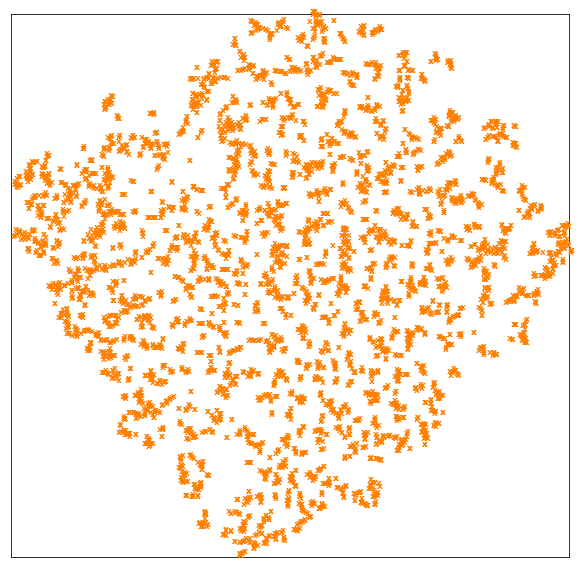

In [ ]:
pintar(5)

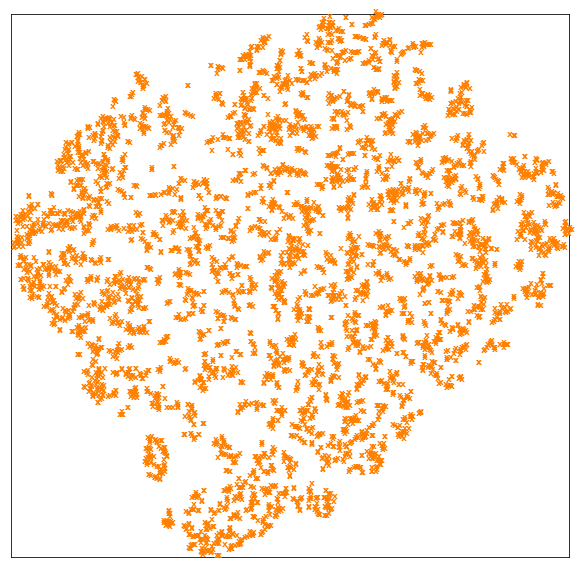

In [ ]:
pintar(10)

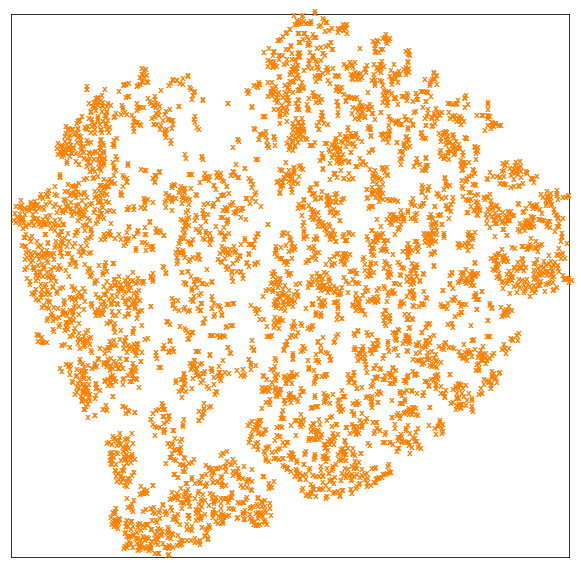

In [ ]:
pintar(25)

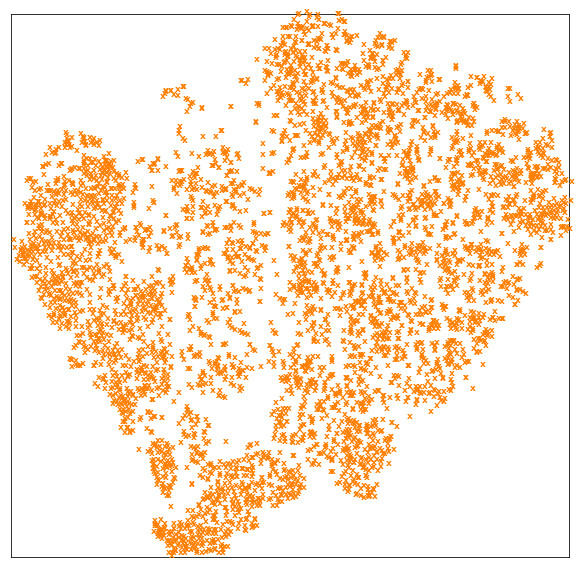

In [ ]:
pintar(50)

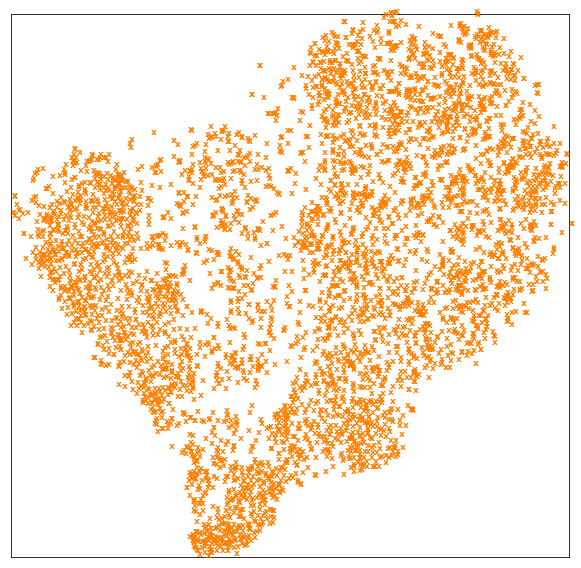

In [ ]:
pintar(100)

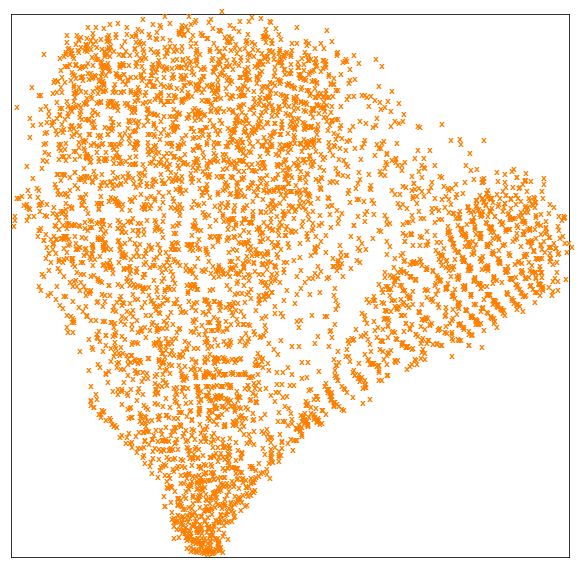

In [ ]:
pintar(500)

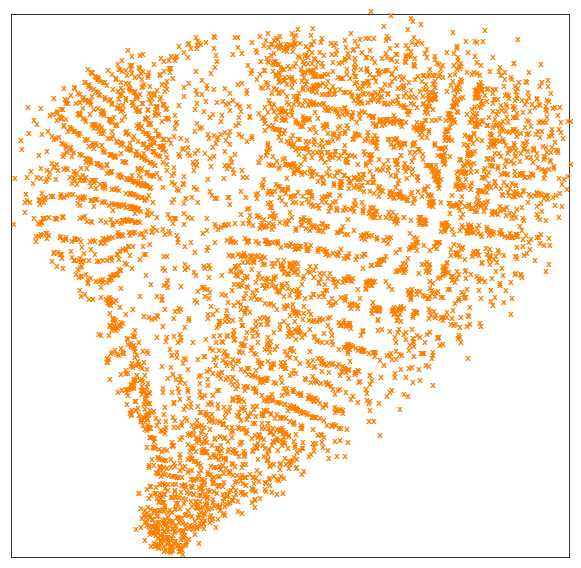

In [ ]:
pintar(1000)

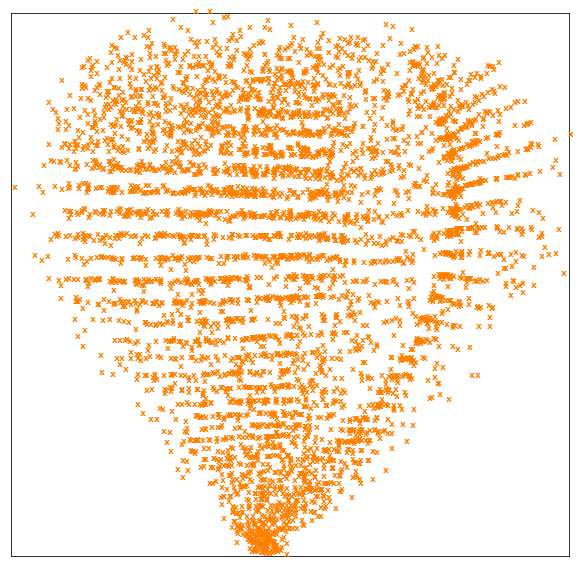

In [ ]:
pintar(2500)

De todas las opciones, hemos elegido el de perplexity=500.

In [ ]:
tsne = TSNE(n_components=2, perplexity=500, n_jobs=-1 ,n_iter=5000,random_state=1337)
X_projected = tsne.fit_transform(muestraTablaFinal)

(([], []), ([], []))

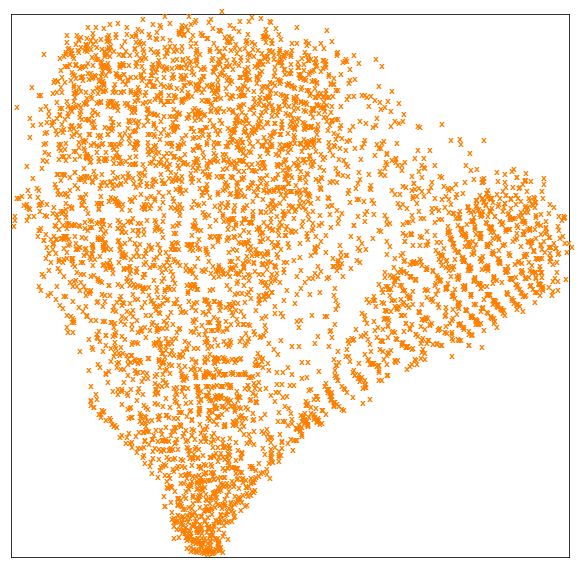

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_norm = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_norm.shape[0]):
    plt.text(X_projected_norm[i, 0], X_projected_norm[i, 1], 'x',
              color=plt.cm.Set1(5 / 10.),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

In [ ]:
X_principal = pd.DataFrame(X_projected) 
X_principal.columns = ['P1', 'P2']

Procedemos ahora a realizar el clustering, probando diferentes métodos. Además, como la biblioteca GridSearch obliga a usar cross validation, vamos a realiar nuestro propio GridSearch.

Para el clustering vamos a utilizar una versión de la muestra con las columnas reducidas mediante TSNE. También hemos probado con IsoMap para ver las diferencias que podría haber entre ambas pero después de 38 horas no terminó de realizar el Spectral Clustering, por lo que usaremos solo el TSNE.

In [ ]:
tsne_tablafinal = TSNE(n_components=50, perplexity=500, n_jobs=-1 ,n_iter=5000,random_state=1337)
X_projected_TSNE = tsne.fit_transform(muestraTablaFinal)

Todos los resultados que obtengamos en este apartado se explicarán mejor en el siguiente apartado, en el que nos centraremos solo en el mejor de todos los modelos e intentaremos entender cómo ha dividido el modelo de clustering los datos.

Además, por cada modelo de clustering distinto vamos a probar la dos mejores combinaciones de datos cuyo número de clusters sea distinto.

### Spectral clustering

In [ ]:
n_clusters=[2,3,4,5,15,40]
affinity=['nearest_neighbors','rbf','laplacian']
combinaciones = []
for i in n_clusters:
  for j in affinity:
    combinaciones.append([i,j])

In [ ]:
combinaciones

[[2, 'nearest_neighbors'],
 [2, 'rbf'],
 [2, 'laplacian'],
 [3, 'nearest_neighbors'],
 [3, 'rbf'],
 [3, 'laplacian'],
 [4, 'nearest_neighbors'],
 [4, 'rbf'],
 [4, 'laplacian'],
 [5, 'nearest_neighbors'],
 [5, 'rbf'],
 [5, 'laplacian'],
 [15, 'nearest_neighbors'],
 [15, 'rbf'],
 [15, 'laplacian'],
 [40, 'nearest_neighbors'],
 [40, 'rbf'],
 [40, 'laplacian']]

Primero vamos a probar a realizar el clustering utilizando la tabla de datos con solo dos dimensiones. Aun así no vamos a utilizar estos resultados ya que al reducir tanto las dimensiones, se habrá perdido gran parte de la información, pero lo vamos a probar para ver la diferencia entre usar solo 2 columnas y usar más.

In [ ]:
silhouette_scores = []
labels_grid = []

import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  start = time.time()
  spectral = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels = spectral.fit_predict(X_projected)
  silhouette_scores.append(silhouette_score(X_projected, labels))
  labels_grid.append(labels)
  end = time.time()
  print('ha tomado ' + str(end - start))
  i += 1
resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 0: n_clusters = 2 affinity = nearest_neighbors
ha tomado 2.9461352825164795
probando la combinacion 1: n_clusters = 2 affinity = rbf
ha tomado 8.870463132858276
probando la combinacion 2: n_clusters = 2 affinity = laplacian
ha tomado 6.454300165176392
probando la combinacion 3: n_clusters = 3 affinity = nearest_neighbors
ha tomado 2.200742244720459
probando la combinacion 4: n_clusters = 3 affinity = rbf
ha tomado 7.7953269481658936
probando la combinacion 5: n_clusters = 3 affinity = laplacian
ha tomado 5.809673309326172
probando la combinacion 6: n_clusters = 4 affinity = nearest_neighbors
ha tomado 1.7266755104064941
probando la combinacion 7: n_clusters = 4 affinity = rbf
ha tomado 7.061552286148071
probando la combinacion 8: n_clusters = 4 affinity = laplacian
ha tomado 5.292555332183838
probando la combinacion 9: n_clusters = 5 affinity = nearest_neighbors
ha tomado 1.872957706451416
probando la combinacion 10: n_clusters = 5 affinity = rbf
ha tomado 6.836

In [ ]:
resultados.sort_values('score')

Combinación  \
15  [40, nearest_neighbors]   
2            [2, laplacian]   
17          [40, laplacian]   
1                  [2, rbf]   
14          [15, laplacian]   
16                [40, rbf]   
12  [15, nearest_neighbors]   
13                [15, rbf]   
9    [5, nearest_neighbors]   
11           [5, laplacian]   
0    [2, nearest_neighbors]   
6    [4, nearest_neighbors]   
10                 [5, rbf]   
8            [4, laplacian]   
7                  [4, rbf]   
4                  [3, rbf]   
5            [3, laplacian]   
3    [3, nearest_neighbors]   

                                               labels     score  
15  [10, 32, 21, 7, 16, 13, 10, 6, 17, 5, 6, 4, 12...  0.294343  
2   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  0.312846  
17  [1, 36, 20, 4, 14, 17, 23, 18, 26, 8, 18, 25, ...  0.312861  
1   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  0.313430  
14  [12, 4, 9, 1, 10, 8, 14, 6, 13, 2, 6, 10, 7, 3...  0.323806  
16  [38, 35, 31, 18, 0, 9, 3, 30, 10, 21, 30, 34, ...  0.325323  
12  [0, 1, 10, 3, 5, 4, 2, 12, 13, 5, 12, 1, 7, 0,...  0.330328  
13  [11, 2, 10, 6, 3, 7, 5, 4, 9, 8, 4, 3, 1, 11, ...  0.341763  
9   [1, 4, 4, 3, 4, 2, 1, 0, 4, 0, 0, 4, 4, 1, 4, ...  0.353709  
11  [1, 2, 2, 4, 2, 3, 1, 0, 2, 2, 0, 2, 3, 1, 2, ...  0.392851  
0   [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...  0.394750  
6   [0, 2, 2, 3, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, ...  0.403152  
10  [1, 3, 1, 0, 3, 2, 1, 4, 0, 3, 4, 3, 2, 1, 3, ...  0.411502  
8   [0, 1, 1, 2, 1, 3, 0, 0, 2, 1, 0, 1, 3, 0, 1, ...  0.431054  
7   [0, 1, 1, 3, 1, 2, 0, 0, 3, 1, 0, 1, 2, 0, 1, ...  0.439184  
4   [0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, ...  0.482278  
5   [0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, ...  0.484550  
3   [2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, ...  0.486819

In [ ]:
best_spectral = resultados[resultados['score'] == resultados['score'].max()]
labels_df = best_spectral['labels'].to_numpy()
labels = labels_df[0]
n_clusters = best_spectral['Combinación'].to_numpy()[0][0]

(([], []), ([], []))

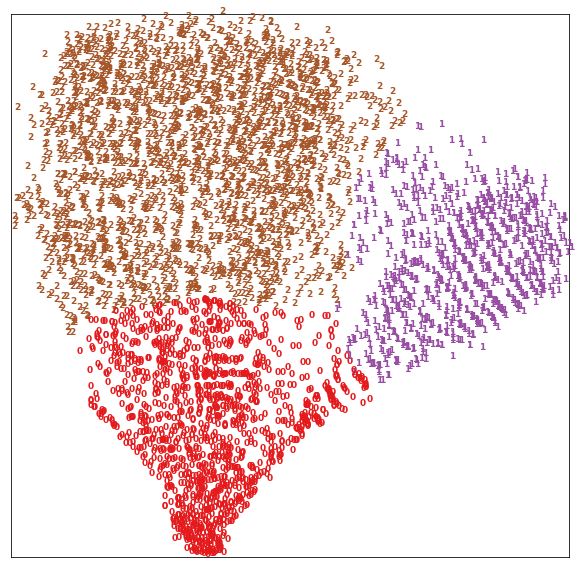

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

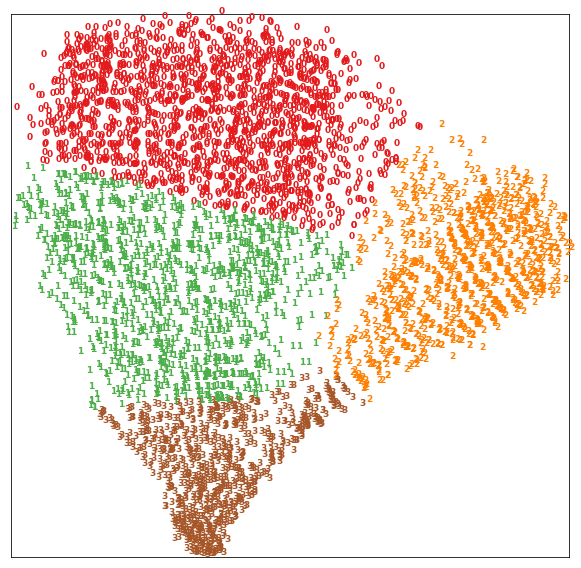

In [ ]:
labels = resultados['labels'][7]
n_clusters = resultados['Combinación'][7][0]
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

Ahora vamos a probar usando la tabla de 50 dimensiones:

In [ ]:
silhouette_scores = []
labels_grid = []

import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  start = time.time()
  spectral = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels = spectral.fit_predict(X_projected_TSNE)
  silhouette_scores.append(silhouette_score(X_projected_TSNE, labels))
  labels_grid.append(labels)
  end = time.time()
  print('ha tomado ' + str(end - start))
  i += 1
resultados_spectral = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 0: n_clusters = 2 affinity = nearest_neighbors
ha tomado 2.7240688800811768
probando la combinacion 1: n_clusters = 2 affinity = rbf
ha tomado 7.798497915267944
probando la combinacion 2: n_clusters = 2 affinity = laplacian
ha tomado 5.21236252784729
probando la combinacion 3: n_clusters = 3 affinity = nearest_neighbors
ha tomado 1.737511396408081
probando la combinacion 4: n_clusters = 3 affinity = rbf
ha tomado 6.8446455001831055
probando la combinacion 5: n_clusters = 3 affinity = laplacian
ha tomado 4.829470157623291
probando la combinacion 6: n_clusters = 4 affinity = nearest_neighbors
ha tomado 1.6231632232666016
probando la combinacion 7: n_clusters = 4 affinity = rbf
ha tomado 7.004647254943848
probando la combinacion 8: n_clusters = 4 affinity = laplacian
ha tomado 5.195358514785767
probando la combinacion 9: n_clusters = 5 affinity = nearest_neighbors
ha tomado 1.7554829120635986
probando la combinacion 10: n_clusters = 5 affinity = rbf
ha tomado 6.821

In [ ]:
resultados_spectral.sort_values('score')

Combinación  \
15  [40, nearest_neighbors]   
2            [2, laplacian]   
17          [40, laplacian]   
1                  [2, rbf]   
14          [15, laplacian]   
16                [40, rbf]   
12  [15, nearest_neighbors]   
13                [15, rbf]   
9    [5, nearest_neighbors]   
11           [5, laplacian]   
0    [2, nearest_neighbors]   
6    [4, nearest_neighbors]   
10                 [5, rbf]   
8            [4, laplacian]   
7                  [4, rbf]   
4                  [3, rbf]   
5            [3, laplacian]   
3    [3, nearest_neighbors]   

                                               labels     score  
15  [10, 32, 21, 7, 16, 13, 10, 6, 17, 5, 6, 4, 12...  0.294343  
2   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  0.312846  
17  [1, 36, 20, 4, 14, 17, 23, 18, 26, 8, 18, 25, ...  0.312861  
1   [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.313430  
14  [12, 4, 9, 1, 10, 8, 14, 6, 13, 2, 6, 10, 7, 3...  0.323806  
16  [38, 35, 31, 18, 0, 9, 3, 30, 10, 21, 30, 34, ...  0.325323  
12  [0, 1, 10, 3, 5, 4, 2, 12, 13, 5, 12, 1, 7, 0,...  0.330328  
13  [11, 2, 10, 6, 3, 7, 5, 4, 9, 8, 4, 3, 1, 11, ...  0.341763  
9   [0, 4, 4, 1, 4, 3, 0, 2, 4, 2, 2, 4, 4, 0, 4, ...  0.353709  
11  [2, 0, 0, 4, 0, 3, 2, 1, 0, 0, 1, 0, 3, 2, 0, ...  0.392851  
0   [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...  0.394750  
6   [0, 2, 2, 3, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, ...  0.403152  
10  [1, 3, 1, 0, 3, 2, 1, 4, 0, 3, 4, 3, 2, 1, 3, ...  0.411502  
8   [1, 0, 0, 3, 0, 2, 1, 1, 3, 0, 1, 0, 2, 1, 0, ...  0.431054  
7   [0, 1, 1, 3, 1, 2, 0, 0, 3, 1, 0, 1, 2, 0, 1, ...  0.439184  
4   [0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, ...  0.482278  
5   [0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, ...  0.484550  
3   [2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, ...  0.486819

In [ ]:
best_spectral = resultados_spectral[resultados_spectral['score'] == resultados_spectral['score'].max()]
labels_df = best_spectral['labels'].to_numpy()
labels = labels_df[0]
n_clusters_spectral = best_spectral['Combinación'].to_numpy()[0][0]
best_spectral_score = best_spectral['score'].to_numpy()[0]

(([], []), ([], []))

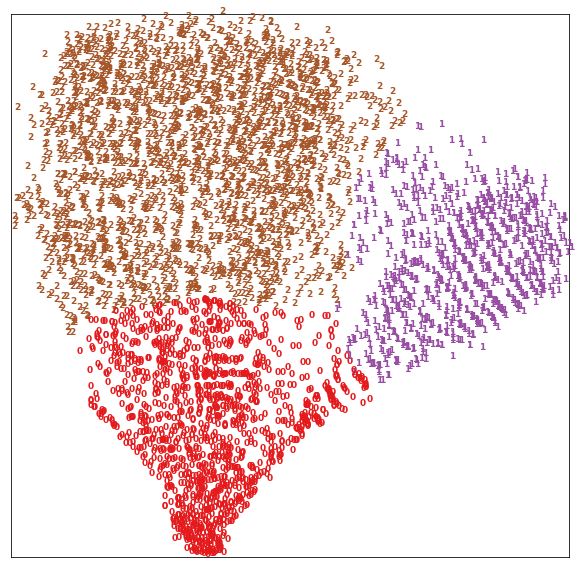

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters_spectral),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

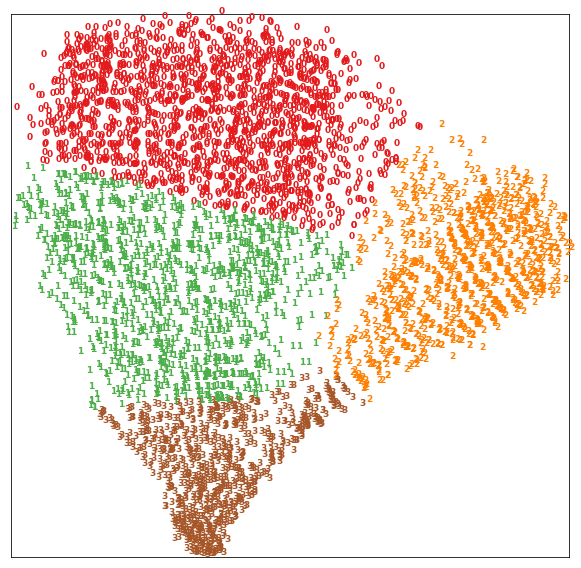

In [ ]:
labels = resultados_spectral['labels'][7]
n_clusters = resultados_spectral['Combinación'][7][0]
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

### Clustering Jerárquico

In [ ]:
n_clusters=[2,3,4,5,15,40]
affinity=['euclidean','l1','l2','manhattan','cosine']
linkage=['ward', 'complete', 'average', 'single']
combinaciones = []
for i in n_clusters:
  for j in affinity:
    for k in linkage:
      combinaciones.append([i,j,k])

In [ ]:
silhouette_scores = []
labels_grid = []
combinaciones_validas = []

import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1] + ' linkage = ' + c[2])
  start = time.time()
  if (c[2] == 'ward' and c[1] != 'euclidean'):
    print('Esta combinación no se prueba')
  else:
    jerarquico = AgglomerativeClustering(n_clusters=c[0],affinity=c[1], linkage=c[2])
    labels = jerarquico.fit_predict(X_projected_TSNE)
    silhouette_scores.append(silhouette_score(X_projected_TSNE, labels))
    combinaciones_validas.append(c)
    labels_grid.append(labels)
    end = time.time()
    print('ha tomado ' + str(end - start))
  i += 1
resultados_jerearquico = pd.DataFrame({
    'Combinación': combinaciones_validas,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 0: n_clusters = 2 affinity = euclidean linkage = ward
ha tomado 1.2852625846862793
probando la combinacion 1: n_clusters = 2 affinity = euclidean linkage = complete
ha tomado 1.1710493564605713
probando la combinacion 2: n_clusters = 2 affinity = euclidean linkage = average
ha tomado 1.1353631019592285
probando la combinacion 3: n_clusters = 2 affinity = euclidean linkage = single
ha tomado 0.6206445693969727
probando la combinacion 4: n_clusters = 2 affinity = l1 linkage = ward
Esta combinación no se prueba
probando la combinacion 5: n_clusters = 2 affinity = l1 linkage = complete
ha tomado 1.0843932628631592
probando la combinacion 6: n_clusters = 2 affinity = l1 linkage = average
ha tomado 1.0839688777923584
probando la combinacion 7: n_clusters = 2 affinity = l1 linkage = single
ha tomado 0.5926592350006104
probando la combinacion 8: n_clusters = 2 affinity = l2 linkage = ward
Esta combinación no se prueba
probando la combinacion 9: n_clusters = 2 affinity =

In [ ]:
resultados_jerearquico.sort_values('score')

Combinación  \
92  [40, manhattan, single]   
86         [40, l1, single]   
89         [40, l2, single]   
83  [40, euclidean, single]   
67  [15, euclidean, single]   
..                      ...   
27  [3, manhattan, average]   
21         [3, l1, average]   
18  [3, euclidean, average]   
24         [3, l2, average]   
30     [3, cosine, average]   

                                               labels     score  
92  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ... -0.656971  
86  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ... -0.656971  
89  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.634962  
83  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.634962  
67  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.565701  
..                                                ...       ...  
27  [2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, ...  0.475275  
21  [2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, ...  0.475275  
18  [0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, ...  0.477557  
24  [0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, ...  0.477557  
30  [0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, ...  0.479947  

[96 rows x 3 columns]

In [ ]:
resultados_jerearquico.sort_values('score').tail(15)

Combinación  \
32      [4, euclidean, ward]   
0       [2, euclidean, ward]   
14      [2, cosine, average]   
48      [5, euclidean, ward]   
40          [4, l2, average]   
34   [4, euclidean, average]   
46      [4, cosine, average]   
23         [3, l2, complete]   
17  [3, euclidean, complete]   
16      [3, euclidean, ward]   
27   [3, manhattan, average]   
21          [3, l1, average]   
18   [3, euclidean, average]   
24          [3, l2, average]   
30      [3, cosine, average]   

                                               labels     score  
32  [0, 3, 1, 3, 1, 2, 0, 0, 3, 1, 0, 3, 2, 0, 1, ...  0.393079  
0   [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...  0.401774  
14  [1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...  0.403478  
48  [4, 1, 0, 1, 0, 2, 4, 3, 1, 0, 3, 1, 2, 4, 0, ...  0.403896  
40  [1, 3, 1, 3, 0, 2, 1, 0, 3, 0, 0, 3, 2, 1, 0, ...  0.418004  
34  [1, 3, 1, 3, 0, 2, 1, 0, 3, 0, 0, 3, 2, 1, 0, ...  0.418004  
46  [3, 2, 1, 2, 0, 1, 3, 0, 2, 0, 0, 2, 1, 3, 0, ...  0.423686  
23  [2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, ...  0.435591  
17  [2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, ...  0.435591  
16  [0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, ...  0.471534  
27  [2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, ...  0.475275  
21  [2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, ...  0.475275  
18  [0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, ...  0.477557  
24  [0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, ...  0.477557  
30  [0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, ...  0.479947

In [ ]:
best_jerarquico = resultados_jerearquico[resultados_jerearquico['score'] == resultados_jerearquico['score'].max()]
labels_df = best_jerarquico['labels'].to_numpy()
labels = labels_df[0]
n_clusters_jerarquico = best_jerarquico['Combinación'].to_numpy()[0][0]
best_jerarquico_score = best_jerarquico['score'].to_numpy()[0]

(([], []), ([], []))

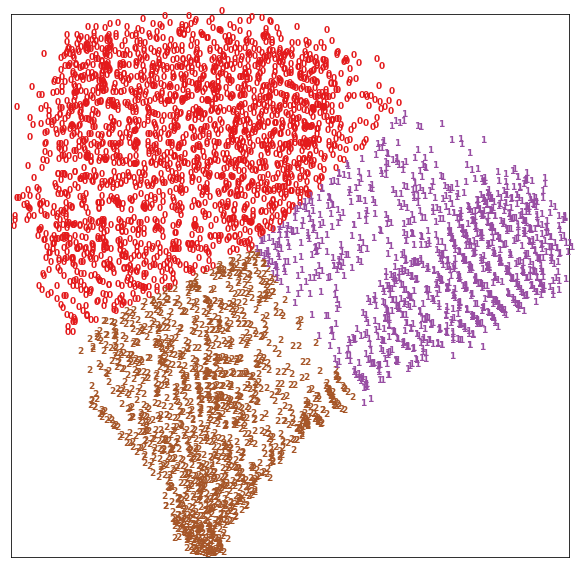

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters_jerarquico),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

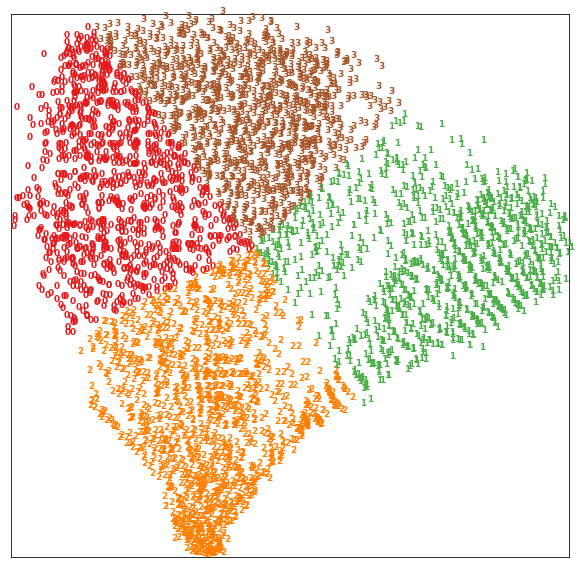

In [ ]:
labels = resultados_jerearquico['labels'][46]
n_clusters = resultados_jerearquico['Combinación'][46][0]
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

### KMeans

In [ ]:
n_clusters=[2,3,4,5,15,40]
init=['k-means++', 'random']
n_init=[1,5,10,100]
combinaciones = []
for i in n_clusters:
  for j in init:
    for k in n_init:
      combinaciones.append([i,j,k])

In [ ]:
silhouette_scores = []
labels_grid = []
combinaciones_validas = []

import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' init = ' + c[1] + ' n_init = ' + str(c[2]))
  start = time.time()
  kmeans = KMeans(n_clusters=c[0], init=c[1], n_init=c[2], random_state=1337)
  labels = kmeans.fit_predict(X_principal)
  silhouette_scores.append(silhouette_score(X_principal, labels))
  combinaciones_validas.append(c)
  labels_grid.append(labels)
  end = time.time()
  print('ha tomado ' + str(end - start))
  i += 1
resultados_kmeans = pd.DataFrame({
    'Combinación': combinaciones_validas,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 0: n_clusters = 2 init = k-means++ n_init = 1
ha tomado 0.49671506881713867
probando la combinacion 1: n_clusters = 2 init = k-means++ n_init = 5
ha tomado 0.528710126876831
probando la combinacion 2: n_clusters = 2 init = k-means++ n_init = 10
ha tomado 0.586676836013794
probando la combinacion 3: n_clusters = 2 init = k-means++ n_init = 100
ha tomado 1.5411310195922852
probando la combinacion 4: n_clusters = 2 init = random n_init = 1
ha tomado 0.5756633281707764
probando la combinacion 5: n_clusters = 2 init = random n_init = 5
ha tomado 0.5267109870910645
probando la combinacion 6: n_clusters = 2 init = random n_init = 10
ha tomado 0.6546106338500977
probando la combinacion 7: n_clusters = 2 init = random n_init = 100
ha tomado 1.6310656070709229
probando la combinacion 8: n_clusters = 3 init = k-means++ n_init = 1
ha tomado 0.678624153137207
probando la combinacion 9: n_clusters = 3 init = k-means++ n_init = 5
ha tomado 0.5147042274475098
probando la combin

In [ ]:
resultados_kmeans.sort_values('score')

Combinación                                             labels  \
44       [40, random, 1]  [8, 1, 15, 16, 33, 14, 8, 38, 5, 31, 38, 6, 11...   
45       [40, random, 5]  [13, 18, 14, 39, 23, 10, 6, 2, 27, 0, 2, 25, 1...   
41    [40, k-means++, 5]  [8, 9, 15, 33, 0, 12, 32, 17, 36, 11, 17, 20, ...   
40    [40, k-means++, 1]  [1, 35, 39, 12, 30, 2, 31, 3, 27, 34, 3, 18, 3...   
46      [40, random, 10]  [9, 7, 13, 24, 25, 22, 12, 2, 5, 16, 2, 33, 39...   
47     [40, random, 100]  [26, 12, 8, 25, 38, 31, 37, 29, 3, 21, 36, 20,...   
42   [40, k-means++, 10]  [37, 34, 35, 36, 22, 27, 37, 3, 18, 31, 3, 17,...   
37       [15, random, 5]  [4, 3, 7, 11, 3, 14, 4, 13, 2, 0, 13, 5, 9, 12...   
43  [40, k-means++, 100]  [17, 32, 1, 14, 9, 28, 17, 10, 21, 16, 10, 18,...   
32    [15, k-means++, 1]  [1, 5, 10, 0, 6, 9, 7, 3, 8, 4, 3, 5, 13, 1, 4...   
34   [15, k-means++, 10]  [6, 8, 13, 7, 8, 12, 11, 3, 1, 5, 14, 8, 10, 9...   
33    [15, k-means++, 5]  [6, 8, 13, 7, 8, 12, 11, 3, 1, 5, 14, 8, 10, 9...   
35  [15, k-means++, 100]  [4, 9, 14, 7, 3, 5, 13, 12, 11, 3, 12, 9, 1, 4...   
38      [15, random, 10]  [13, 11, 3, 10, 11, 4, 1, 8, 0, 7, 8, 11, 6, 1...   
39     [15, random, 100]  [4, 11, 1, 0, 11, 5, 6, 3, 2, 10, 3, 11, 12, 4...   
36       [15, random, 1]  [8, 1, 0, 13, 6, 14, 4, 2, 5, 10, 2, 1, 11, 8,...   
0      [2, k-means++, 1]  [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
7       [2, random, 100]  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
1      [2, k-means++, 5]  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
3    [2, k-means++, 100]  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
2     [2, k-means++, 10]  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
5         [2, random, 5]  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
6        [2, random, 10]  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...   
4         [2, random, 1]  [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...   
29        [5, random, 5]  [1, 0, 0, 4, 0, 3, 1, 2, 4, 0, 2, 0, 3, 1, 0, ...   
28        [5, random, 1]  [3, 2, 2, 1, 2, 0, 3, 4, 1, 2, 4, 2, 0, 3, 2, ...   
24     [5, k-means++, 1]  [1, 4, 4, 0, 4, 2, 1, 3, 0, 4, 3, 4, 2, 1, 4, ...   
25     [5, k-means++, 5]  [1, 4, 4, 0, 4, 2, 1, 3, 0, 4, 3, 4, 2, 1, 4, ...   
30       [5, random, 10]  [2, 3, 3, 4, 3, 1, 2, 0, 4, 3, 0, 3, 1, 2, 3, ...   
26    [5, k-means++, 10]  [0, 1, 1, 4, 1, 2, 0, 3, 4, 1, 3, 1, 2, 0, 1, ...   
31      [5, random, 100]  [4, 0, 0, 1, 0, 3, 4, 2, 1, 0, 2, 0, 3, 4, 0, ...   
27   [5, k-means++, 100]  [3, 4, 4, 0, 4, 2, 3, 1, 0, 4, 1, 4, 2, 3, 4, ...   
16     [4, k-means++, 1]  [1, 3, 3, 0, 3, 2, 1, 1, 0, 3, 1, 0, 2, 1, 3, ...   
20        [4, random, 1]  [3, 2, 2, 1, 2, 0, 3, 3, 1, 2, 3, 1, 0, 3, 2, ...   
21        [4, random, 5]  [2, 1, 1, 0, 1, 3, 2, 2, 0, 1, 2, 0, 3, 2, 1, ...   
22       [4, random, 10]  [2, 1, 1, 0, 1, 3, 2, 2, 0, 1, 2, 0, 3, 2, 1, ...   
19   [4, k-means++, 100]  [0, 3, 3, 1, 3, 2, 0, 0, 1, 3, 0, 1, 2, 0, 3, ...   
23      [4, random, 100]  [1, 3, 3, 2, 3, 0, 1, 1, 2, 3, 1, 2, 0, 1, 3, ...   
17     [4, k-means++, 5]  [3, 0, 0, 2, 0, 1, 3, 3, 2, 0, 3, 2, 1, 3, 0, ...   
18    [4, k-means++, 10]  [3, 0, 0, 2, 0, 1, 3, 3, 2, 0, 3, 2, 1, 3, 0, ...   
12        [3, random, 1]  [2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, ...   
13        [3, random, 5]  [2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, ...   
14       [3, random, 10]  [1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, ...   
15      [3, random, 100]  [2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, ...   
10    [3, k-means++, 10]  [1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, ...   
11   [3, k-means++, 100]  [1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, ...   
9      [3, k-means++, 5]  [1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, ...   
8      [3, k-means++, 1]  [1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, ...   

       score  
44  0.338899  
45  0.338946  
41  0.339198  
40  0.341831  
46  0.342147  
47  0.344066  
42  0.345031  
37  0.348934  
43  0.

In [ ]:
best_kmeans = resultados_kmeans[resultados_kmeans['score'] == resultados_kmeans['score'].max()]
labels_df = best_kmeans['labels'].to_numpy()
labels = labels_df[0]
n_clusters_kmeans = best_kmeans['Combinación'].to_numpy()[0][0]
best_kmeans_score = best_kmeans['score'].to_numpy()[0]

(([], []), ([], []))

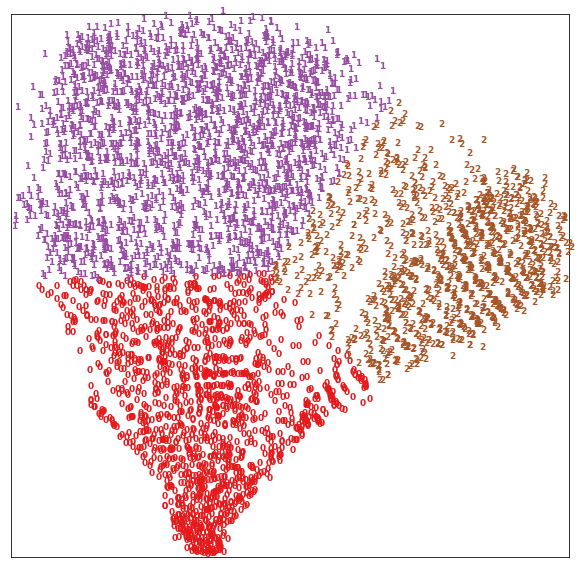

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters_kmeans),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

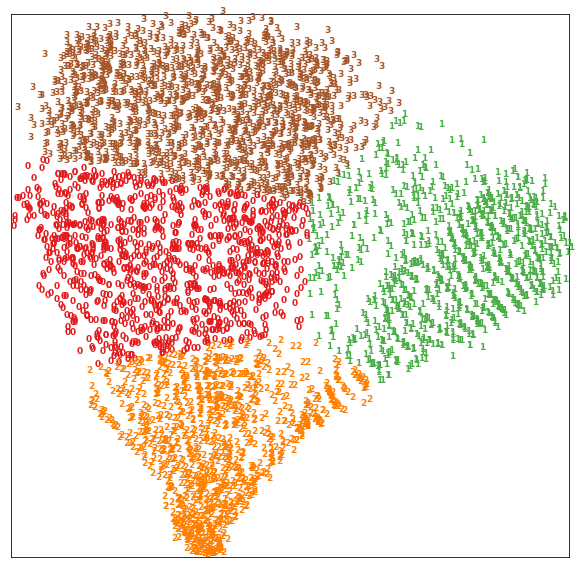

In [ ]:
labels = resultados_kmeans['labels'][18]
n_clusters = resultados_kmeans['Combinación'][18][0]
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

### DBSCAN

In [ ]:
eps=[0.01,0.03,0.05,0.08,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
min_samples=[3,5,10,20,40,75,150,300]
combinaciones = []
for i in eps:
  for j in min_samples:
    combinaciones.append([i,j])

In [ ]:
silhouette_scores = []
labels_grid = []
combinaciones_validas = []
n_labels = []
import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': eps = ' + str(c[0]) + ' min_samples = ' + str(c[1]))
  start = time.time()
  dbscan = DBSCAN(eps = c[0], min_samples = c[1])
  labels = dbscan.fit_predict(X_projected_TSNE)
  new_labels = [x+1 for x in labels]
  n = len(np.unique(labels))
  if (n > 1):
    silhouette_scores.append(silhouette_score(X_projected_TSNE, labels))
    combinaciones_validas.append(c)
    labels_grid.append(new_labels)
    n_labels.append(n)
    end = time.time()
    print('ha tomado ' + str(end - start))
  else:
    print('Todas son outliers')
  i += 1
resultados_dbscan = pd.DataFrame({
    'Combinación': combinaciones_validas,
    'labels':labels_grid,
    'n_labels': n_labels,
    'score':silhouette_scores
})

probando la combinacion 0: eps = 0.01 min_samples = 3
ha tomado 0.6556248664855957
probando la combinacion 1: eps = 0.01 min_samples = 5
Todas son outliers
probando la combinacion 2: eps = 0.01 min_samples = 10
Todas son outliers
probando la combinacion 3: eps = 0.01 min_samples = 20
Todas son outliers
probando la combinacion 4: eps = 0.01 min_samples = 40
Todas son outliers
probando la combinacion 5: eps = 0.01 min_samples = 75
Todas son outliers
probando la combinacion 6: eps = 0.01 min_samples = 150
Todas son outliers
probando la combinacion 7: eps = 0.01 min_samples = 300
Todas son outliers
probando la combinacion 8: eps = 0.03 min_samples = 3
ha tomado 0.5716722011566162
probando la combinacion 9: eps = 0.03 min_samples = 5
Todas son outliers
probando la combinacion 10: eps = 0.03 min_samples = 10
Todas son outliers
probando la combinacion 11: eps = 0.03 min_samples = 20
Todas son outliers
probando la combinacion 12: eps = 0.03 min_samples = 40
Todas son outliers
probando la combi

In [ ]:
resultados_dbscan.sort_values('score')

Combinación                                             labels  n_labels  \
2    [0.05, 3]  [0, 0, 0, 0, 0, 0, 1, 0, 18, 0, 0, 0, 0, 0, 0,...        96   
1    [0.03, 3]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        32   
7     [0.1, 5]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        47   
5    [0.08, 5]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        28   
16  [0.25, 10]  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...        30   
9    [0.15, 5]  [0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, ...       135   
4    [0.08, 3]  [0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, ...       254   
24    [0.4, 3]  [1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, ...        47   
25    [0.4, 5]  [1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, ...        51   
19   [0.3, 10]  [0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 66, 0, 0, 57...        77   
20   [0.35, 3]  [1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 0, 1, 4, 0, 1, ...        98   
13   [0.2, 10]  [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, ...        12   
6     [0.1, 3]  [0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 336, 0, 0, 0...       359   
12    [0.2, 5]  [0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 124, 0, 0, 0...       259   
22  [0.35, 10]  [34, 0, 0, 1, 0, 2, 0, 0, 3, 88, 0, 4, 0, 0, 9...       117   
21   [0.35, 5]  [1, 2, 1, 3, 4, 5, 1, 1, 3, 6, 0, 7, 65, 0, 8,...        97   
10  [0.15, 10]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         3   
27   [0.4, 20]  [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, ...         5   
3    [0.05, 5]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         6   
8    [0.15, 3]  [0, 238, 0, 0, 0, 0, 1, 2, 3, 0, 0, 4, 0, 0, 0...       538   
26   [0.4, 10]  [1, 0, 0, 2, 0, 3, 1, 32, 4, 80, 0, 5, 0, 0, 6...        99   
17    [0.3, 3]  [1, 2, 3, 4, 0, 5, 1, 1, 6, 7, 0, 8, 0, 0, 9, ...       221   
23  [0.35, 20]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         3   
15   [0.25, 5]  [220, 1, 2, 3, 0, 90, 4, 5, 6, 0, 0, 7, 0, 0, ...       311   
0    [0.01, 3]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         2   
18    [0.3, 5]  [20, 1, 2, 3, 0, 4, 5, 6, 7, 8, 0, 9, 0, 0, 10...       231   
11    [0.2, 3]  [1, 2, 3, 0, 0, 151, 4, 5, 6, 65, 0, 7, 0, 0, ...       581   
14   [0.25, 3]  [1, 2, 3, 4, 0, 5, 6, 7, 8, 9, 0, 10, 0, 0, 11...       425   

       score  
2  -0.774754  
1  -0.770141  
7  -0.732372  
5  -0.685890  
16 -0.678451  
9  -0.609829  
4  -0.602953  
24 -0.570592  
25 -0.563716  
19 -0.546908  
20 -0.508683  
13 -0.493943  
6  -0.457106  
12 -0.331559  
22 -0.284080  
21 -0.259557  
10 -0.257607  
27 -0.163098  
3  -0.155188  
8  -0.155074  
26 -0.138778  
17 -0.137741  
23 -0.098656  
15 -0.062797  
0  -0.000723  
18  0.000682  
11  0.079449  
14  0.101647

In [ ]:
best_dbscan = resultados_dbscan[resultados_dbscan['score'] == resultados_dbscan['score'].max()]
labels_df = best_dbscan['labels'].to_numpy()
labels = labels_df[0]
n_clusters_dbscan = best_dbscan['n_labels'].to_numpy()[0]
best_dbscan_score = best_dbscan['score'].to_numpy()[0]

(([], []), ([], []))

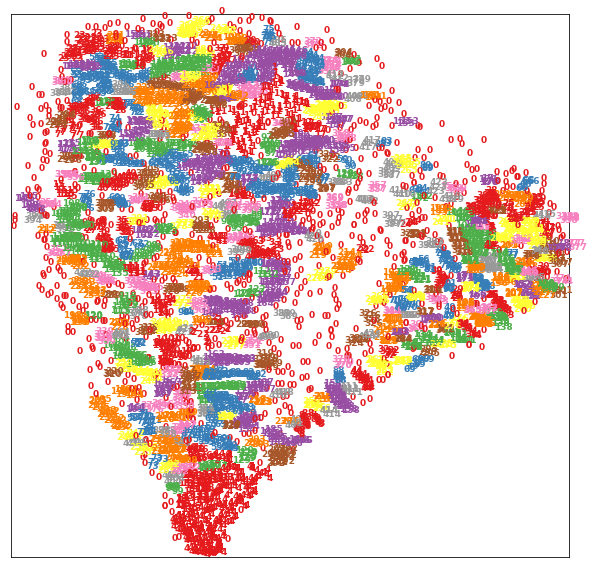

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters_dbscan),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

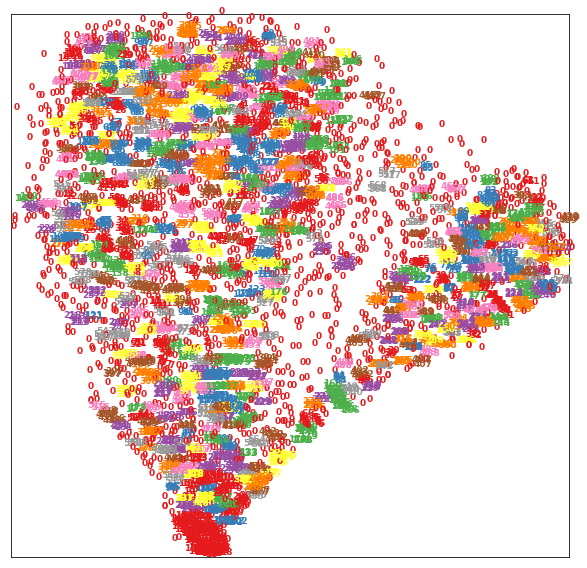

In [ ]:
labels = resultados_dbscan['labels'][11]
n_clusters = resultados_dbscan['n_labels'][11]
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
x_min -= 0.01
x_max += 0.01
X_projected_1 = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], labels[i],
              color=plt.cm.Set1(labels[i] / n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

### Otros resultados

Antes de realizar la muestra estratifiada, pensamos en  separar a las personas entre hombres a los que les gusten otros hombres (gays y hombres bisexuales), mujeres a las que les guste otras mujeres (lesbianas y mujeres bisexuales), y personas a las que les gusten personas de distinto sexo (heteros y bisexuales).

De esta forma conseguimos dividir el dataset de forma que no había problemas de RAM, pero el hacer esta división es como hacer el trabajo del ordenador, por lo que abandonamos esta parte. Aun así, obtuvimos algunos resultados, por los que los hemos dejado pero no los hemos usado para el análisis de resultados finales.

En este apartado solo se ha usado Spectral clustering, puesto que suele ser el mejor de los 4 usados anteriormente.

Además, se ha usado IsoMap en vez de TSNE para representar los datos.

In [ ]:
n_clusters=[2,3,4,5,15,40]
affinity=['nearest_neighbors','rbf','laplacian']
combinaciones = []
for i in n_clusters:
  for j in affinity:
    combinaciones.append([i,j])

####Gays

In [ ]:
prueba = tablaFinal[(tablaFinal['sex_m'] == 1)]
menWhoLikeMen = prueba[(prueba['orientation_gay'] == 1) | (prueba['orientation_bisexual'] == 1)]

In [ ]:
isomap_gay = Isomap(n_neighbors=30, n_components=2,n_jobs=-1)
X_projected_gay = isomap_gay.fit_transform(menWhoLikeMen)

In [ ]:
X_principal_gay = pd.DataFrame(X_projected_gay) 
X_principal_gay.columns = ['P1', 'P2']

(([], []), ([], []))

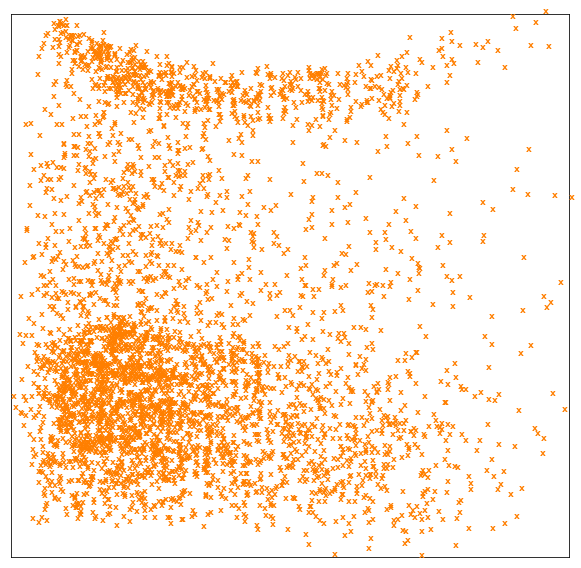

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected_gay, 0), np.max(X_projected_gay, 0)
X_projected_gay = (X_projected_gay - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_gay.shape[0]):
    plt.text(X_projected_gay[i, 0], X_projected_gay[i, 1], 'x',
              color=plt.cm.Set1(5 / 10.),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

In [ ]:
silhouette_scores = []
labels_grid = []

for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  spectral_gay = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels_gay = spectral_gay.fit_predict(X_projected_gay)
  silhouette_scores.append(silhouette_score(X_projected_gay, labels_gay))
  labels_grid.append(labels_gay)

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

In [ ]:
resultados.sort_values('score')

Combinación  \
14          [100, laplacian]   
13                [100, rbf]   
10                 [40, rbf]   
7                  [15, rbf]   
11           [40, laplacian]   
8            [15, laplacian]   
6    [15, nearest_neighbors]   
9    [40, nearest_neighbors]   
5             [5, laplacian]   
12  [100, nearest_neighbors]   
4                   [5, rbf]   
3     [5, nearest_neighbors]   
0     [2, nearest_neighbors]   
2             [2, laplacian]   
1                   [2, rbf]   

                                               labels     score  
14  [75, 14, 82, 18, 3, 38, 15, 8, 91, 53, 89, 46,...  0.070753  
13  [5, 5, 0, 2, 99, 3, 58, 18, 5, 18, 6, 6, 3, 0,...  0.079823  
10  [4, 4, 38, 37, 4, 8, 25, 14, 4, 14, 0, 0, 8, 3...  0.099416  
7   [2, 2, 0, 12, 13, 1, 2, 14, 2, 14, 3, 3, 1, 0,...  0.139859  
11  [5, 33, 28, 17, 11, 16, 33, 13, 11, 23, 20, 35...  0.161278  
8   [8, 11, 0, 12, 1, 6, 8, 14, 1, 14, 13, 13, 5, ...  0.270702  
6   [5, 4, 0, 8, 10, 11, 4, 3, 10, 9, 1, 2, 3, 0, ...  0.285863  
9   [2, 20, 10, 18, 22, 0, 24, 16, 22, 32, 14, 27,...  0.299733  
5   [0, 2, 2, 1, 0, 3, 2, 4, 0, 4, 3, 3, 4, 2, 1, ...  0.300023  
12  [32, 3, 8, 44, 91, 4, 48, 23, 19, 6, 74, 34, 8...  0.307479  
4   [0, 0, 0, 1, 1, 3, 0, 4, 1, 4, 0, 2, 4, 0, 1, ...  0.316501  
3   [2, 2, 2, 1, 1, 4, 2, 0, 1, 0, 4, 3, 0, 2, 1, ...  0.364343  
0   [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, ...  0.500833  
2   [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, ...  0.514673  
1   [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...  0.514709

In [ ]:
best_spectral_gay = resultados[resultados['score'] == resultados['score'].max()]

In [ ]:
labels_df = best_spectral_gay['labels'].to_numpy()

In [ ]:
labels = labels_df[0]

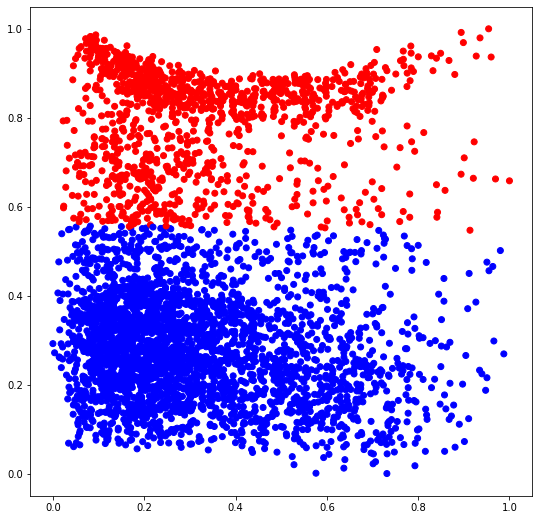

In [ ]:
cvec_gay = []
for label in labels:
  if label == 0:
    cvec_gay.append('r')
  elif label == 1:
    cvec_gay.append('b')
  elif label ==2:
    cvec_gay.append('g')
  elif label ==3:
    cvec_gay.append('c')
  elif label ==4:
    cvec_gay.append('m')
  elif label ==5:
    cvec_gay.append('y')
  else:
    cvec_gay.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal_gay['P1'], X_principal_gay['P2'], c = cvec_gay) 
plt.show() 

In [ ]:
menWhoLikeMen['label_spectral_1'] = labels

In [ ]:
menWhoLikeMen

age  height  has_kids  wants_kids  cats  dogs  english  spanish  \
35      25      69        -1           0     1     1        1        0   
50      33      70        -1           0     1     1        1        0   
63      29      76         0           0     1     1        1        0   
74      31      69         0           0     1     1        1        1   
130     24      75         0           0     0     0        1        0   
...    ...     ...       ...         ...   ...   ...      ...      ...   
50848   26      67         0           0     0     1        1        1   
50916   23      67         0           0     0     0        1        0   
50933   41      76         0           0     1     1        1        1   
50940   32      69         0           0     0     0        1        1   
50947   39      68         0           0     1     1        1        0   

       french  chinese  ...  religion_catholicism  religion_christianity  \
35          0        0  ...                     0                      0   
50          0        0  ...                     0                      0   
63          0        0  ...                     0                      0   
74          0        0  ...                     0                      0   
130         0        0  ...                     0                      0   
...       ...      ...  ...                   ...                    ...   
50848       0        0  ...                     0                      0   
50916       0        0  ...                     0                      0   
50933       0        0  ...                     0                      0   
50940       0        0  ...                     0                      0   
50947       0        0  ...                     0                      0   

       religion_hinduism  religion_islam  religion_judaism  \
35                     0               0                 0   
50                     0               0                 0   
63                     0               0                 0   
74                     0               0                 0   
130                    0               0                 0   
...                  ...             ...               ...   
50848                  0               0                 0   
50916                  0               0                 0   
50933                  0               0                 0   
50940                  0               0                 0   
50947                  0               0                 0   

       religion_little/no importance  religion_other  sign_SignDoesntMatter  \
35                                 1               0                      1   
50                                 1               0                      1   
63                                 0               0                      1   
74                                 0               0                      1   
130                                1               0                      0   
...                              ...             ...                    ...   
50848                              1               0                      1   
50916                              1               0                      1   
50933                              0               1                      1   
50940                              1               0                      1   
50947                              1               0                      1   

       sign_SignMatters  label_spectral_1  
35                    0                 1  
50                    0                 1  
63                    0                 1  
74                    0                 1  
130                   1                 1  
...                 ...               ...  
50848                 0                 0  
50916                 0                 1  
50933                 0                 0  
50940                 0                 0  
50947                 0    

In [ ]:
silhouette_scores = []
labels_grid = []
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  spectral_gay = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels_gay = spectral_gay.fit_predict(menWhoLikeMen)
  silhouette_scores.append(silhouette_score(menWhoLikeMen, labels_gay))
  labels_grid.append(labels_gay)
  i += 1

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 0: n_clusters = 2 affinity = nearest_neighbors
probando la combinacion 1: n_clusters = 2 affinity = rbf
probando la combinacion 2: n_clusters = 2 affinity = laplacian
probando la combinacion 3: n_clusters = 5 affinity = nearest_neighbors
probando la combinacion 4: n_clusters = 5 affinity = rbf
probando la combinacion 5: n_clusters = 5 affinity = laplacian
probando la combinacion 6: n_clusters = 15 affinity = nearest_neighbors
probando la combinacion 7: n_clusters = 15 affinity = rbf
probando la combinacion 8: n_clusters = 15 affinity = laplacian
probando la combinacion 9: n_clusters = 40 affinity = nearest_neighbors
probando la combinacion 10: n_clusters = 40 affinity = rbf
probando la combinacion 11: n_clusters = 40 affinity = laplacian
probando la combinacion 12: n_clusters = 100 affinity = nearest_neighbors
probando la combinacion 13: n_clusters = 100 affinity = rbf
probando la combinacion 14: n_clusters = 100 affinity = laplacian


In [ ]:
resultados.sort_values('score')

Combinación  \
14          [100, laplacian]   
13                [100, rbf]   
11           [40, laplacian]   
8            [15, laplacian]   
10                 [40, rbf]   
7                  [15, rbf]   
5             [5, laplacian]   
4                   [5, rbf]   
12  [100, nearest_neighbors]   
9    [40, nearest_neighbors]   
6    [15, nearest_neighbors]   
2             [2, laplacian]   
3     [5, nearest_neighbors]   
0     [2, nearest_neighbors]   
1                   [2, rbf]   

                                               labels     score  
14  [80, 74, 31, 80, 80, 80, 80, 80, 80, 80, 80, 9... -0.423468  
13  [32, 32, 43, 32, 32, 32, 32, 32, 32, 32, 7, 57... -0.388451  
11  [0, 38, 33, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 31,... -0.384759  
8   [0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 14, ... -0.356258  
10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 19, 0, 0, 0... -0.350928  
7   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, ... -0.278013  
5   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.174183  
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.063059  
12  [18, 10, 10, 76, 9, 2, 15, 83, 49, 4, 2, 22, 8...  0.035159  
9   [7, 0, 35, 29, 6, 17, 24, 30, 32, 30, 17, 1, 3...  0.053509  
6   [8, 10, 11, 9, 11, 7, 10, 5, 11, 3, 7, 13, 3, ...  0.082745  
2   [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...  0.100127  
3   [1, 4, 1, 1, 1, 0, 1, 2, 1, 2, 0, 4, 2, 1, 1, ...  0.160296  
0   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...  0.445375  
1   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.587828

In [ ]:
best_spectral_gay = resultados[resultados['score'] == resultados['score'].max()]

In [ ]:
labels_df = best_spectral_gay['labels'].to_numpy()

In [ ]:
labels = labels_df[0]

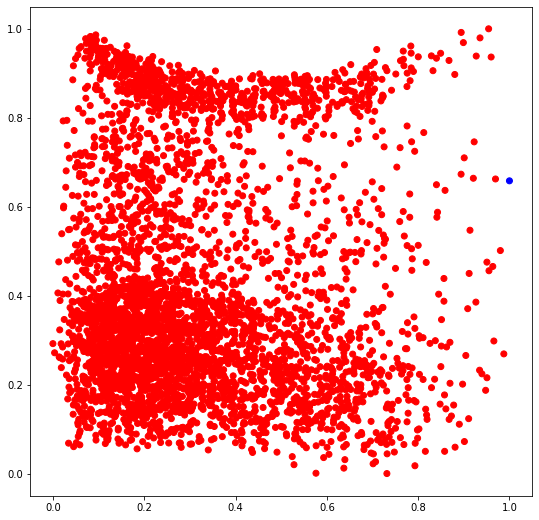

In [ ]:
cvec_gay = []
for label in labels:
  if label == 0:
    cvec_gay.append('r')
  elif label == 1:
    cvec_gay.append('b')
  elif label ==2:
    cvec_gay.append('g')
  elif label ==3:
    cvec_gay.append('c')
  elif label ==4:
    cvec_gay.append('m')
  elif label ==5:
    cvec_gay.append('y')
  else:
    cvec_gay.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal_gay['P1'], X_principal_gay['P2'], c = cvec_gay) 
plt.show() 

In [ ]:
menWhoLikeMen['label_spectral_2'] = labels

In [ ]:
labels = resultados['labels'][0]

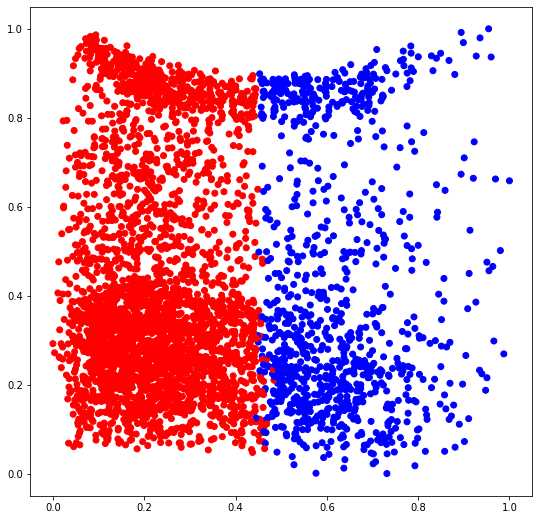

In [ ]:
cvec_gay = []
for label in labels:
  if label == 0:
    cvec_gay.append('r')
  elif label == 1:
    cvec_gay.append('b')
  elif label ==2:
    cvec_gay.append('g')
  elif label ==3:
    cvec_gay.append('c')
  elif label ==4:
    cvec_gay.append('m')
  elif label ==5:
    cvec_gay.append('y')
  else:
    cvec_gay.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal_gay['P1'], X_principal_gay['P2'], c = cvec_gay) 
plt.show() 

In [ ]:
menWhoLikeMen['label_spectral_3'] = labels

In [ ]:
menWhoLikeMen

age  height  has_kids  wants_kids  cats  dogs  english  spanish  \
35      25      69        -1           0     1     1        1        0   
50      33      70        -1           0     1     1        1        0   
63      29      76         0           0     1     1        1        0   
74      31      69         0           0     1     1        1        1   
130     24      75         0           0     0     0        1        0   
...    ...     ...       ...         ...   ...   ...      ...      ...   
50848   26      67         0           0     0     1        1        1   
50916   23      67         0           0     0     0        1        0   
50933   41      76         0           0     1     1        1        1   
50940   32      69         0           0     0     0        1        1   
50947   39      68         0           0     1     1        1        0   

       french  chinese  ...  religion_hinduism  religion_islam  \
35          0        0  ...                  0               0   
50          0        0  ...                  0               0   
63          0        0  ...                  0               0   
74          0        0  ...                  0               0   
130         0        0  ...                  0               0   
...       ...      ...  ...                ...             ...   
50848       0        0  ...                  0               0   
50916       0        0  ...                  0               0   
50933       0        0  ...                  0               0   
50940       0        0  ...                  0               0   
50947       0        0  ...                  0               0   

       religion_judaism  religion_little/no importance  religion_other  \
35                    0                              1               0   
50                    0                              1               0   
63                    0                              0               0   
74                    0                              0               0   
130                   0                              1               0   
...                 ...                            ...             ...   
50848                 0                              1               0   
50916                 0                              1               0   
50933                 0                              0               1   
50940                 0                              1               0   
50947                 0                              1               0   

       sign_SignDoesntMatter  sign_SignMatters  label_spectral_1  \
35                         1                 0                 1   
50                         1                 0                 1   
63                         1                 0                 1   
74                         1                 0                 1   
130                        0                 1                 1   
...                      ...               ...               ...   
50848                      1                 0                 0   
50916                      1                 0                 1   
50933                      1                 0                 0   
50940                      1                 0                 0   
50947                      1                 0                 1   

       label_spectral_2  label_spectral_3  
35                    0                 0  
50                    0                 0  
63                    0                 0  
74                    0                 0  
130                   0                 0  
...                 ...               ...  
50848                 0                 0  
50916                 0                 0  
50933                 0                 1  
50940                 0                 0  
50947                 0                 1  

[4372 rows x 181 columns]

####Lesbians

In [ ]:
prueba = tablaFinal[(tablaFinal['sex_f'] == 1)]
womenWhoLikeWomen = prueba[(prueba['orientation_gay'] == 1) | (prueba['orientation_bisexual'] == 1)]

In [ ]:
from sklearn.manifold import Isomap

isomap_lesbian = Isomap(n_neighbors=30, n_components=2,n_jobs=-1)
X_projected_lesbian = isomap_lesbian.fit_transform(womenWhoLikeWomen)

(([], []), ([], []))

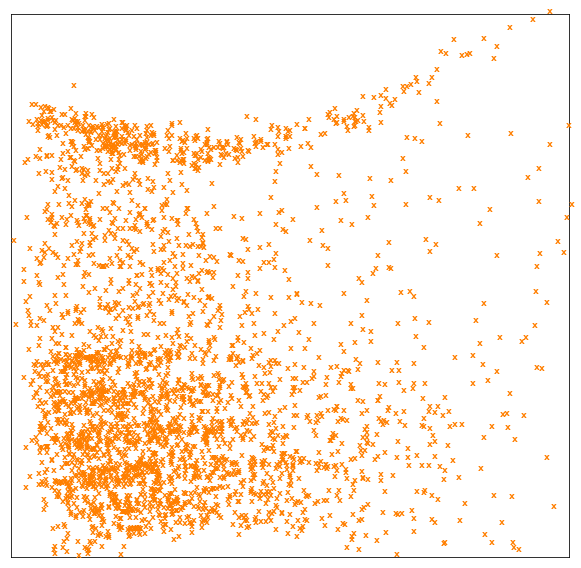

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected_lesbian, 0), np.max(X_projected_lesbian, 0)
X_projected_lesbian = (X_projected_lesbian - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_lesbian.shape[0]):
    plt.text(X_projected_lesbian[i, 0], X_projected_lesbian[i, 1], 'x',
              color=plt.cm.Set1(5 / 10.),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

In [ ]:
X_principal_lesbian = pd.DataFrame(X_projected_lesbian) 
X_principal_lesbian.columns = ['P1', 'P2']

In [ ]:
silhouette_scores = []
labels_grid = []

import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  start = time.time()
  spectral_lesbian = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels_lesbian = spectral_lesbian.fit_predict(X_projected_lesbian)
  silhouette_scores.append(silhouette_score(womenWhoLikeWomen, labels_lesbian))
  labels_grid.append(labels_lesbian)
  end = time.time()
  print('ha tomado ' + str(end - start))
  i += 1
resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 15: n_clusters = 2 affinity = nearest_neighbors
ha tomado 1.0542869567871094
probando la combinacion 15: n_clusters = 2 affinity = rbf
ha tomado 71.46554231643677
probando la combinacion 15: n_clusters = 2 affinity = laplacian
ha tomado 3.8016433715820312
probando la combinacion 15: n_clusters = 5 affinity = nearest_neighbors
ha tomado 1.0765748023986816
probando la combinacion 15: n_clusters = 5 affinity = rbf
ha tomado 15.221663475036621
probando la combinacion 15: n_clusters = 5 affinity = laplacian
ha tomado 2.833461046218872
probando la combinacion 15: n_clusters = 15 affinity = nearest_neighbors
ha tomado 1.237455129623413
probando la combinacion 15: n_clusters = 15 affinity = rbf
ha tomado 7.329250812530518
probando la combinacion 15: n_clusters = 15 affinity = laplacian
ha tomado 3.114792823791504
probando la combinacion 15: n_clusters = 40 affinity = nearest_neighbors
ha tomado 1.824401617050171
probando la combinacion 15: n_clusters = 40 affinity = rbf

In [ ]:
resultados.sort_values('score')

Combinación  \
14          [100, laplacian]   
13                [100, rbf]   
10                 [40, rbf]   
11           [40, laplacian]   
12  [100, nearest_neighbors]   
9    [40, nearest_neighbors]   
8            [15, laplacian]   
6    [15, nearest_neighbors]   
3     [5, nearest_neighbors]   
2             [2, laplacian]   
7                  [15, rbf]   
0     [2, nearest_neighbors]   
5             [5, laplacian]   
1                   [2, rbf]   
4                   [5, rbf]   

                                               labels     score  
14  [90, 21, 21, 57, 76, 90, 90, 90, 90, 51, 90, 9... -0.084766  
13  [81, 56, 56, 72, 80, 77, 81, 81, 81, 54, 86, 8... -0.060418  
10  [22, 22, 0, 36, 39, 22, 22, 0, 22, 38, 22, 22,... -0.032554  
11  [15, 15, 15, 24, 34, 15, 15, 15, 28, 23, 15, 1... -0.027743  
12  [56, 60, 72, 75, 4, 14, 68, 49, 51, 89, 3, 68,... -0.025453  
9   [10, 20, 32, 24, 17, 28, 14, 32, 31, 3, 7, 14,...  0.009248  
8   [2, 2, 2, 0, 13, 2, 2, 2, 2, 8, 2, 2, 13, 2, 2...  0.051993  
6   [7, 3, 1, 13, 1, 3, 2, 7, 4, 6, 3, 2, 14, 2, 4...  0.052411  
3   [1, 1, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 2, 0, 4, ...  0.145153  
2   [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...  0.145592  
7   [0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0,...  0.302082  
0   [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...  0.375213  
5   [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...  0.381213  
1   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.434800  
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.454502

In [ ]:
best_spectral_lesbian = resultados[resultados['score'] == resultados['score'].max()]

In [ ]:
labels_df = best_spectral_lesbian['labels'].to_numpy()

In [ ]:
labels = labels_df[0]

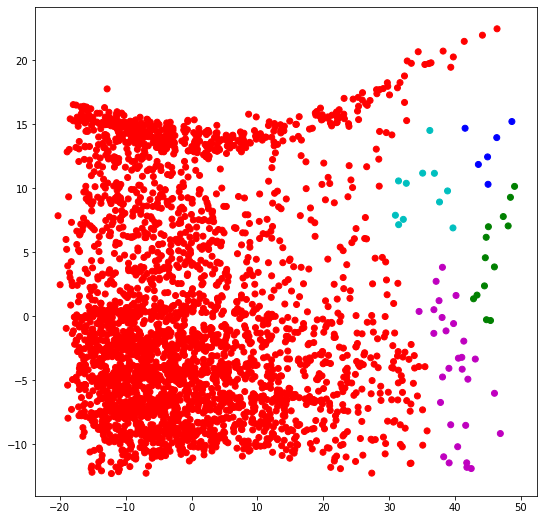

In [ ]:
cvec_lesbian = []
for label in labels:
  if label == 0:
    cvec_lesbian.append('r')
  elif label == 1:
    cvec_lesbian.append('b')
  elif label ==2:
    cvec_lesbian.append('g')
  elif label ==3:
    cvec_lesbian.append('c')
  elif label ==4:
    cvec_lesbian.append('m')
  elif label ==5:
    cvec_lesbian.append('y')
  else:
    cvec_lesbian.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal_lesbian['P1'], X_principal_lesbian['P2'], c = cvec_lesbian) 
plt.show() 

In [ ]:
womenWhoLikeWomen['label_spectral_1'] = labels

<ipython-input-164-0ac5b199465f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womenWhoLikeWomen['label_spectral_1'] = labels


In [ ]:
silhouette_scores = []
labels_grid = []

import time
i = 0

for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  start = time.time()
  spectral_lesbian = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels_lesbian = spectral_lesbian.fit_predict(womenWhoLikeWomen)
  silhouette_scores.append(silhouette_score(womenWhoLikeWomen, labels_lesbian))
  labels_grid.append(labels_lesbian)
  end = time.time()
  print('ha tomado ' + str(end - start))
  i += 1

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

probando la combinacion 0: n_clusters = 2 affinity = nearest_neighbors
ha tomado 2.9732916355133057
probando la combinacion 1: n_clusters = 2 affinity = rbf
ha tomado 4085.6646058559418
probando la combinacion 2: n_clusters = 2 affinity = laplacian
ha tomado 2127.707508802414
probando la combinacion 3: n_clusters = 5 affinity = nearest_neighbors
ha tomado 2.909088134765625
probando la combinacion 4: n_clusters = 5 affinity = rbf
ha tomado 4211.197854042053
probando la combinacion 5: n_clusters = 5 affinity = laplacian
ha tomado 1232.6039888858795
probando la combinacion 6: n_clusters = 15 affinity = nearest_neighbors
ha tomado 5.448424577713013
probando la combinacion 7: n_clusters = 15 affinity = rbf
ha tomado 3161.031510591507
probando la combinacion 8: n_clusters = 15 affinity = laplacian
ha tomado 226.8030092716217
probando la combinacion 9: n_clusters = 40 affinity = nearest_neighbors
ha tomado 6.366356372833252
probando la combinacion 10: n_clusters = 40 affinity = rbf
ha tomado 

In [ ]:
resultados.sort_values('score')

Combinación  \
14          [100, laplacian]   
13                [100, rbf]   
11           [40, laplacian]   
10                 [40, rbf]   
8            [15, laplacian]   
7                  [15, rbf]   
5             [5, laplacian]   
4                   [5, rbf]   
12  [100, nearest_neighbors]   
9    [40, nearest_neighbors]   
6    [15, nearest_neighbors]   
2             [2, laplacian]   
3     [5, nearest_neighbors]   
1                   [2, rbf]   
0     [2, nearest_neighbors]   

                                               labels     score  
14  [0, 20, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0... -0.353564  
13  [35, 52, 35, 35, 63, 35, 35, 35, 35, 35, 0, 35... -0.342026  
11  [0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,... -0.340232  
10  [0, 31, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0... -0.321247  
8   [0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0... -0.317017  
7   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.144420  
5   [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, ... -0.035483  
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.021137  
12  [97, 34, 28, 44, 38, 43, 0, 48, 52, 57, 35, 96...  0.045902  
9   [26, 34, 18, 28, 33, 34, 0, 5, 19, 12, 26, 26,...  0.056063  
6   [8, 4, 4, 1, 0, 4, 8, 4, 10, 2, 11, 11, 0, 8, ...  0.074801  
2   [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...  0.104335  
3   [0, 4, 4, 4, 4, 0, 0, 4, 1, 2, 4, 0, 4, 0, 1, ...  0.174580  
1   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.279098  
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  0.481990

In [ ]:
best_spectral_lesbian = resultados[resultados['score'] == resultados['score'].max()]
labels_df = best_spectral_lesbian['labels'].to_numpy()
labels = labels_df[0]

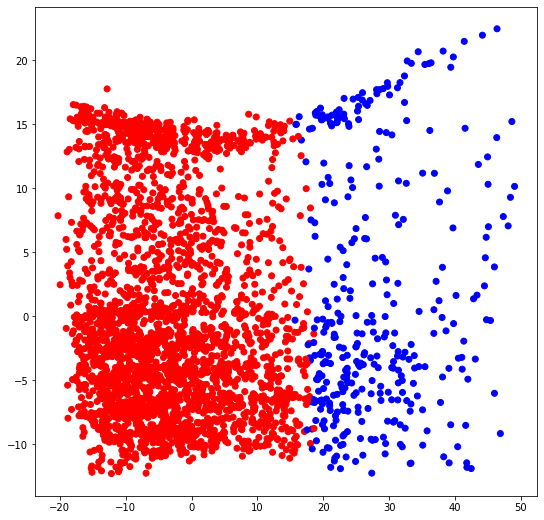

In [ ]:
cvec_lesbian = []
for label in labels:
  if label == 0:
    cvec_lesbian.append('r')
  elif label == 1:
    cvec_lesbian.append('b')
  elif label ==2:
    cvec_lesbian.append('g')
  elif label ==3:
    cvec_lesbian.append('c')
  elif label ==4:
    cvec_lesbian.append('m')
  elif label ==5:
    cvec_lesbian.append('y')
  else:
    cvec_lesbian.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal_lesbian['P1'], X_principal_lesbian['P2'], c = cvec_lesbian) 
plt.show() 

In [ ]:
womenWhoLikeWomen['label_spectral_2'] = labels

<ipython-input-192-0f38584ec10e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womenWhoLikeWomen['label_spectral_2'] = labels


In [ ]:
labels = resultados['labels'][3]

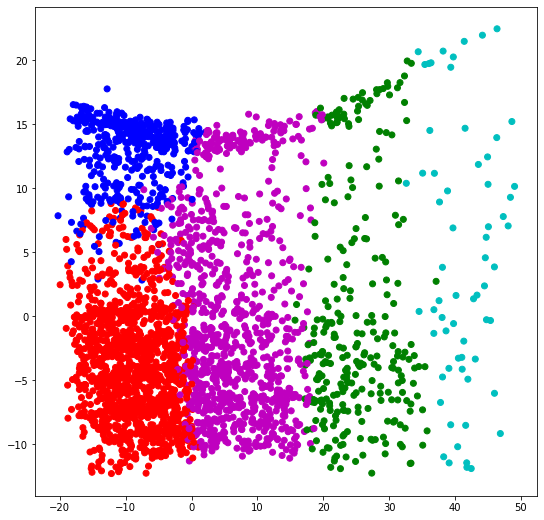

In [ ]:
cvec_lesbian = []
for label in labels:
  if label == 0:
    cvec_lesbian.append('r')
  elif label == 1:
    cvec_lesbian.append('b')
  elif label ==2:
    cvec_lesbian.append('g')
  elif label ==3:
    cvec_lesbian.append('c')
  elif label ==4:
    cvec_lesbian.append('m')
  elif label ==5:
    cvec_lesbian.append('y')
  else:
    cvec_lesbian.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal_lesbian['P1'], X_principal_lesbian['P2'], c = cvec_lesbian) 
plt.show() 

In [ ]:
womenWhoLikeWomen['label_spectral_3'] = labels

<ipython-input-196-7fdada8ed52e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womenWhoLikeWomen['label_spectral_3'] = labels


In [ ]:
womenWhoLikeWomen

age  height  has_kids  wants_kids  cats  dogs  english  spanish  \
41      29      66        -1           0     1     0        1        0   
45      31      67        -1           0     0     0        1        0   
46      33      66         0           0     0     0        1        1   
47      38      65         0           1     0     1        1        0   
62      31      69         0          -1     1     1        1        0   
...    ...     ...       ...         ...   ...   ...      ...      ...   
50879   32      60         0           0     1     1        1        0   
50901   49      67         0          -1     1     1        1        0   
50908   22      61        -1           0     1     1        1        0   
50917   22      65         0           0     1     1        1        0   
50923   27      67         0           0     1     1        1        0   

       french  chinese  ...  religion_hinduism  religion_islam  \
41          0        0  ...                  0               0   
45          0        0  ...                  0               0   
46          0        0  ...                  0               0   
47          0        0  ...                  0               0   
62          0        0  ...                  0               0   
...       ...      ...  ...                ...             ...   
50879       1        0  ...                  0               0   
50901       0        0  ...                  0               0   
50908       0        0  ...                  0               0   
50917       0        0  ...                  0               0   
50923       0        0  ...                  0               0   

       religion_judaism  religion_little/no importance  religion_other  \
41                    0                              0               1   
45                    0                              1               0   
46                    0                              1               0   
47                    0                              1               0   
62                    0                              0               1   
...                 ...                            ...             ...   
50879                 0                              0               0   
50901                 0                              0               0   
50908                 0                              1               0   
50917                 0                              1               0   
50923                 0                              1               0   

       sign_SignDoesntMatter  sign_SignMatters  label_spectral_1  \
41                         1                 0                 0   
45                         1                 0                 0   
46                         1                 0                 0   
47                         1                 0                 0   
62                         1                 0                 0   
...                      ...               ...               ...   
50879                      1                 0                 0   
50901                      1                 0                 0   
50908                      1                 0                 0   
50917                      1                 0                 0   
50923                      1                 0                 0   

       label_spectral_2  label_spectral_3  
41                    0                 0  
45                    0                 4  
46                    0                 4  
47                    0                 4  
62                    0                 4  
...                 ...               ...  
50879                 0                 4  
50901                 1                 2  
50908                 0                 0  
50917                 0                 0  
50923                 0                 0  

[3169 rows x 181 columns]

####Straigths

In [ ]:
straights = tablaFinal[(tablaFinal['orientation_straight'] == 1) | (tablaFinal['orientation_bisexual'] == 1)]

In [ ]:
indexNames = straights[straights['smokes_unknown']==1].index
straights.drop(indexNames , inplace=True)
straights.drop('smokes_unknown', inplace=True, axis=1)

In [ ]:
indexNames = straights[straights['drinks_unknown']==1].index
straights.drop(indexNames , inplace=True)
straights.drop('drinks_unknown', inplace=True, axis=1)

In [ ]:
indexNames = straights[straights['drugs_unknown']==1].index
straights.drop(indexNames , inplace=True)
straights.drop('drugs_unknown', inplace=True, axis=1)

In [ ]:
straights

age  height  has_kids  wants_kids  cats  dogs  english  spanish  \
0       22      75        -1           0     1     1        1        0   
1       35      70        -1           0     1     1        1        0   
4       29      66         0           0     1     1        1        0   
7       31      65        -1           1     1     1        1        1   
8       37      65         0           0     1     1        1        0   
...    ...     ...       ...         ...   ...   ...      ...      ...   
50942   31      62         0           0     0     1        1        0   
50943   59      62         1           0     0     1        1        0   
50944   24      72        -1           0     1     1        1        0   
50945   42      71        -1           0     0     0        1        0   
50946   27      73        -1           1     1     1        1        0   

       french  chinese  ...  religion_buddhism  religion_catholicism  \
0           0        0  ...                  0                     0   
1           0        0  ...                  0                     0   
4           0        0  ...                  0                     0   
7           0        0  ...                  0                     0   
8           0        0  ...                  0                     0   
...       ...      ...  ...                ...                   ...   
50942       1        0  ...                  0                     0   
50943       0        0  ...                  0                     0   
50944       0        0  ...                  0                     0   
50945       0        0  ...                  0                     0   
50946       0        0  ...                  0                     0   

       religion_christianity  religion_hinduism  religion_islam  \
0                          0                  0               0   
1                          0                  0               0   
4                          0                  0               0   
7                          1                  0               0   
8                          0                  0               0   
...                      ...                ...             ...   
50942                      0                  0               0   
50943                      0                  0               0   
50944                      0                  0               0   
50945                      0                  0               0   
50946                      0                  0               0   

       religion_judaism  religion_little/no importance  religion_other  \
0                     0                              0               0   
1                     0                              1               0   
4                     0                              1               0   
7                     0                              0               0   
8                     0                              1               0   
...                 ...                            ...             ...   
50942                 0                              0               0   
50943                 0                              1               0   
50944                 0                              0               0   
50945                 0                              1               0   
50946                 0                              1               0   

       sign_SignDoesntMatter  sign_SignMatters  
0                          1                 0  
1                          1                 0  
4                          1                 0  
7                          1                 0  
8                          1                 0  
...                      ...               ...  
50942                      1                 0  
50943                      1                 0  
50944                      1                 0  
50945                      1                 0  
50946               

In [ ]:
from sklearn.manifold import Isomap

isomap_straight = Isomap(n_neighbors=30, n_components=2,n_jobs=-1)
X_projected_straight = isomap_straight.fit_transform(straights)

(([], []), ([], []))

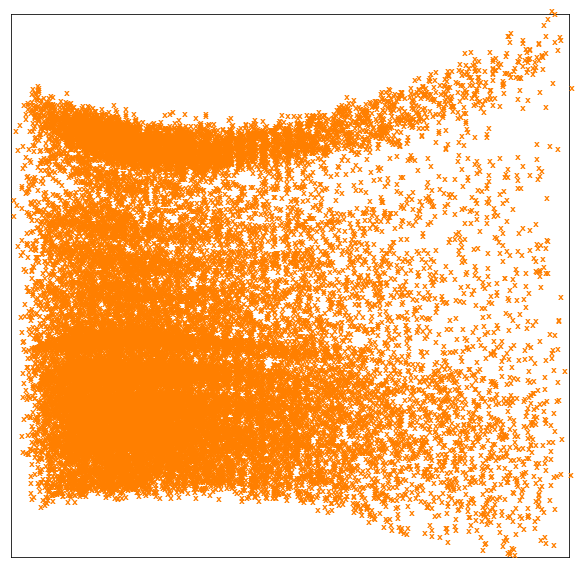

In [ ]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected_straight, 0), np.max(X_projected_straight, 0)
X_projected_straight = (X_projected_straight - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_straight.shape[0]):
    plt.text(X_projected_straight[i, 0], X_projected_straight[i, 1], 'x',
              color=plt.cm.Set1(5 / 10.),
              fontdict={'weight': 'bold', 'size': 9})

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])

In [ ]:
X_principal = pd.DataFrame(X_projected_straight) 
X_principal.columns = ['P1', 'P2']

In [ ]:
silhouette_scores = []
labels_grid = []

import time
i = 0
for c in combinaciones:
  print('probando la combinacion ' + str(i) + ': n_clusters = ' + str(c[0]) + ' affinity = ' + c[1])
  start = time.time()
  spectral_straight = SpectralClustering(n_clusters=c[0],random_state=1337, n_jobs=-1,affinity=c[1])
  labels_straight = spectral_straight.fit_predict(X_principal)
  silhouette_scores.append(silhouette_score(straights, labels_straight))
  labels_grid.append(labels_straight)
  end = time.time()
  print('ha tomado ' + str(end - start))
  i += 1
resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'labels':labels_grid,
    'score':silhouette_scores
})

In [ ]:
resultados.sort_values('score')

In [ ]:
best_spectral_straight = resultados[resultados['score'] == resultados['score'].max()]
labels_df = best_spectral_straight['labels'].to_numpy()
labels = labels_df[0]

()

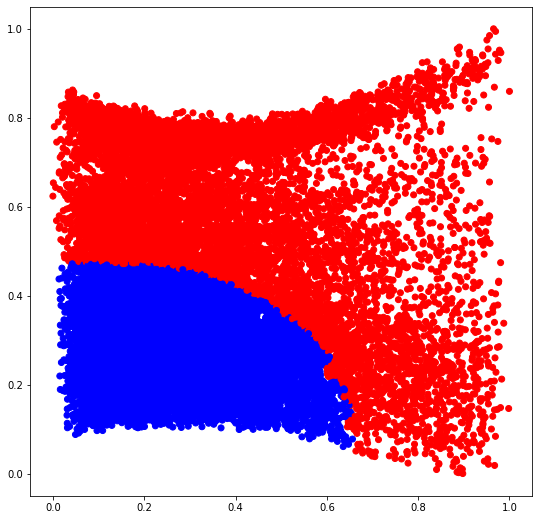

In [ ]:
#Hecho con 2 nearest neighbors
cvec_straight = []
for label in labels:
  if label == 0:
    cvec_straight.append('r')
  elif label == 1:
    cvec_straight.append('b')
  elif label ==2:
    cvec_straight.append('g')
  elif label ==3:
    cvec_straight.append('c')
  elif label ==4:
    cvec_straight.append('m')
  elif label ==5:
    cvec_straight.append('y')
  else:
    cvec_straight.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec_straight) 
plt.show()

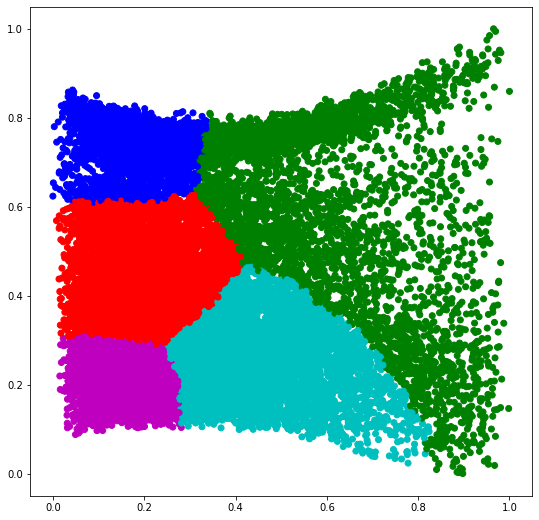

In [ ]:
#Hecho con 5 nearest neighbors
labels = resultados['labels'][1]
cvec_straight = []
for label in labels:
  if label == 0:
    cvec_straight.append('r')
  elif label == 1:
    cvec_straight.append('b')
  elif label ==2:
    cvec_straight.append('g')
  elif label ==3:
    cvec_straight.append('c')
  elif label ==4:
    cvec_straight.append('m')
  elif label ==5:
    cvec_straight.append('y')
  else:
    cvec_straight.append('k')

  
# Plotting the clustered scatter plot 
plt.figure(figsize=(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec_straight) 
plt.show()

##Análisis de resultados

Proceden a analizarse los resultados tras el uso de modelos. Para ello usaremos el mejor de todos, es decir, el que tenga mejor silueta, aunque para ver más resultados vamos a probar el segundo mejor que tenga un número diferente de clusters, debido a que los que tienen el mismo número de clusters han dado resultados muy parecidos.

In [ ]:
print('Mejor spectral: ' + str(best_spectral_score) + ' con ' + str(n_clusters_spectral) + ' clusters')
print('Mejor jerarquico: ' + str(best_jerarquico_score) + ' con ' + str(n_clusters_jerarquico) + ' clusters')
print('Mejor kmeans: ' + str(best_kmeans_score) + ' con ' + str(n_clusters_kmeans) + ' clusters')
print('Mejor dbscan: ' + str(best_dbscan_score) + ' con ' + str(n_clusters_dbscan) + ' clusters')

Mejor spectral: 0.4868190288543701 con 3 clusters
Mejor jerarquico: 0.4799465835094452 con 3 clusters
Mejor kmeans: 0.49170151352882385 con 3 clusters
Mejor dbscan: 0.10164692997932434 con 425 clusters


KMEANS

In [ ]:
best_labels = best_kmeans['labels'].to_numpy()[0]
best_n_clusters = best_kmeans['Combinación'].to_numpy()[0][0]

(([], []), ([], []))

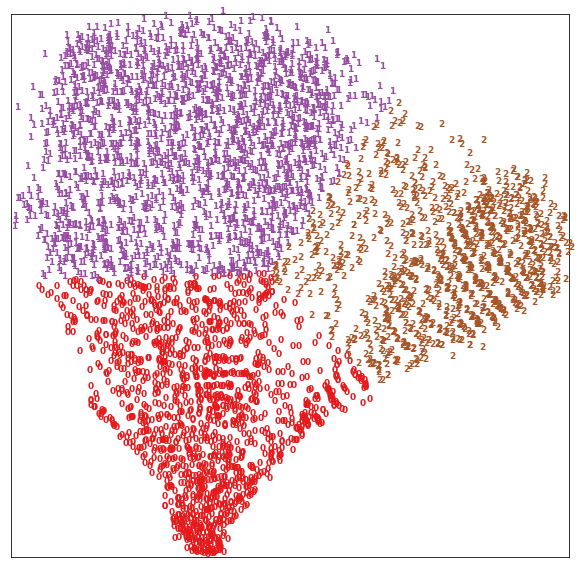

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], best_labels[i],
              color=plt.cm.Set1(best_labels[i] / best_n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

plt.xticks([]), plt.yticks([])

In [ ]:
df = muestraTablaFinal
df['labels'] = best_labels

In [ ]:
tabla0 = df[df['labels'] == 0]
tabla1 = df[df['labels'] == 1]
tabla2 = df[df['labels'] == 2]
tabla0.drop('labels',inplace=True,axis=1)
tabla1.drop('labels',inplace=True,axis=1)
tabla2.drop('labels',inplace=True,axis=1)

c:\users\alejandro\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
tabla0.count()

age                              1516
height                           1516
has_kids                         1516
wants_kids                       1516
cats                             1516
                                 ... 
religion_judaism                 1516
religion_little/no importance    1516
religion_other                   1516
sign_SignDoesntMatter            1516
sign_SignMatters                 1516
Length: 178, dtype: int64

In [ ]:
tabla1.count()

age                              2331
height                           2331
has_kids                         2331
wants_kids                       2331
cats                             2331
                                 ... 
religion_judaism                 2331
religion_little/no importance    2331
religion_other                   2331
sign_SignDoesntMatter            2331
sign_SignMatters                 2331
Length: 178, dtype: int64

In [ ]:
tabla2.count()

age                              1153
height                           1153
has_kids                         1153
wants_kids                       1153
cats                             1153
                                 ... 
religion_judaism                 1153
religion_little/no importance    1153
religion_other                   1153
sign_SignDoesntMatter            1153
sign_SignMatters                 1153
Length: 178, dtype: int64

In [ ]:
tabla0.describe()

age       height     has_kids   wants_kids         cats  \
count  1516.000000  1516.000000  1516.000000  1516.000000  1516.000000   
mean     42.941953    68.298153    -0.031003    -0.083113     0.448549   
std       7.868427     3.757785     0.631172     0.424907     0.576198   
min      31.000000    57.000000    -1.000000    -1.000000    -1.000000   
25%      37.000000    66.000000     0.000000     0.000000     0.000000   
50%      41.000000    68.000000     0.000000     0.000000     0.000000   
75%      47.000000    71.000000     0.000000     0.000000     1.000000   
max      69.000000    79.000000     1.000000     1.000000     1.000000   

              dogs      english      spanish       french      chinese  ...  \
count  1516.000000  1516.000000  1516.000000  1516.000000  1516.000000  ...   
mean      0.604222     0.992084     0.162929     0.081794     0.024406  ...   
std       0.515459     0.088646     0.369423     0.274141     0.154358  ...   
min      -1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000     1.000000     0.000000     0.000000     0.000000  ...   
75%       1.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       religion_buddhism  religion_catholicism  religion_christianity  \
count        1516.000000           1516.000000            1516.000000   
mean            0.020449              0.023747               0.050792   
std             0.141576              0.152309               0.219644   
min             0.000000              0.000000               0.000000   
25%             0.000000              0.000000               0.000000   
50%             0.000000              0.000000               0.000000   
75%             0.000000              0.000000               0.000000   
max             1.000000              1.000000               1.000000   

       religion_hinduism  religion_islam  religion_judaism  \
count        1516.000000     1516.000000       1516.000000   
mean            0.001319        0.000660          0.019129   
std             0.036310        0.025683          0.137025   
min             0.000000        0.000000          0.000000   
25%             0.000000        0.000000          0.000000   
50%             0.000000        0.000000          0.000000   
75%             0.000000        0.000000          0.000000   
max             1.000000        1.000000          1.000000   

       religion_little/no importance  religion_other  sign_SignDoesntMatter  \
count                    1516.000000     1516.000000            1516.000000   
mean                        0.674142        0.101583               0.993404   
std                         0.468849        0.302199               0.080976   
min                         0.000000        0.000000               0.000000   
25%                         0.000000        0.000000               1.000000   
50%                         1.000000        0.000000               1.000000   
75%                         1.000000        0.000000               1.000000   
max                         1.000000        1.000000               1.000000   

       sign_SignMatters  
count       1516.000000  
mean           0.006596  
std            0.080976  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 178 columns]

In [ ]:
tabla1.describe()

age       height     has_kids   wants_kids         cats  \
count  2331.000000  2331.000000  2331.000000  2331.000000  2331.000000   
mean     26.914629    68.129558    -0.283998     0.006435     0.412698   
std       3.579868     3.868929     0.479625     0.352126     0.588511   
min      18.000000    58.000000    -1.000000    -1.000000    -1.000000   
25%      24.000000    65.000000    -1.000000     0.000000     0.000000   
50%      27.000000    68.000000     0.000000     0.000000     0.000000   
75%      30.000000    71.000000     0.000000     0.000000     1.000000   
max      35.000000    78.000000     1.000000     1.000000     1.000000   

              dogs      english      spanish       french      chinese  ...  \
count  2331.000000  2331.000000  2331.000000  2331.000000  2331.000000  ...   
mean      0.634921     0.990562     0.176748     0.078507     0.050622  ...   
std       0.505895     0.096711     0.381537     0.269026     0.219272  ...   
min      -1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000     1.000000     0.000000     0.000000     0.000000  ...   
75%       1.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       religion_buddhism  religion_catholicism  religion_christianity  \
count        2331.000000           2331.000000            2331.000000   
mean            0.009867              0.028743               0.049335   
std             0.098863              0.167119               0.216613   
min             0.000000              0.000000               0.000000   
25%             0.000000              0.000000               0.000000   
50%             0.000000              0.000000               0.000000   
75%             0.000000              0.000000               0.000000   
max             1.000000              1.000000               1.000000   

       religion_hinduism  religion_islam  religion_judaism  \
count        2331.000000     2331.000000       2331.000000   
mean            0.003861        0.000429          0.014157   
std             0.062030        0.020712          0.118163   
min             0.000000        0.000000          0.000000   
25%             0.000000        0.000000          0.000000   
50%             0.000000        0.000000          0.000000   
75%             0.000000        0.000000          0.000000   
max             1.000000        1.000000          1.000000   

       religion_little/no importance  religion_other  sign_SignDoesntMatter  \
count                    2331.000000     2331.000000            2331.000000   
mean                        0.702274        0.043758               0.988417   
std                         0.457357        0.204600               0.107022   
min                         0.000000        0.000000               0.000000   
25%                         0.000000        0.000000               1.000000   
50%                         1.000000        0.000000               1.000000   
75%                         1.000000        0.000000               1.000000   
max                         1.000000        1.000000               1.000000   

       sign_SignMatters  
count       2331.000000  
mean           0.011583  
std            0.107022  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 178 columns]

In [ ]:
tabla2.describe()

age       height     has_kids   wants_kids         cats  \
count  1153.000000  1153.000000  1153.000000  1153.000000  1153.000000   
mean     27.921075    68.488291    -0.244579     0.021683     0.253252   
std       4.094142     3.829039     0.495666     0.341639     0.546493   
min      18.000000    59.000000    -1.000000    -1.000000    -1.000000   
25%      25.000000    66.000000    -1.000000     0.000000     0.000000   
50%      28.000000    69.000000     0.000000     0.000000     0.000000   
75%      31.000000    71.000000     0.000000     0.000000     1.000000   
max      37.000000    80.000000     1.000000     1.000000     1.000000   

              dogs     english      spanish       french      chinese  ...  \
count  1153.000000  1153.00000  1153.000000  1153.000000  1153.000000  ...   
mean      0.513443     0.99046     0.169124     0.062446     0.065048  ...   
std       0.518781     0.09725     0.375024     0.242068     0.246717  ...   
min      -1.000000     0.00000     0.000000     0.000000     0.000000  ...   
25%       0.000000     1.00000     0.000000     0.000000     0.000000  ...   
50%       1.000000     1.00000     0.000000     0.000000     0.000000  ...   
75%       1.000000     1.00000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.00000     1.000000     1.000000     1.000000  ...   

       religion_buddhism  religion_catholicism  religion_christianity  \
count        1153.000000           1153.000000             1153.00000   
mean            0.010408              0.031223                0.06418   
std             0.101530              0.173995                0.24518   
min             0.000000              0.000000                0.00000   
25%             0.000000              0.000000                0.00000   
50%             0.000000              0.000000                0.00000   
75%             0.000000              0.000000                0.00000   
max             1.000000              1.000000                1.00000   

       religion_hinduism  religion_islam  religion_judaism  \
count        1153.000000     1153.000000       1153.000000   
mean            0.005204        0.003469          0.011275   
std             0.071981        0.058823          0.105629   
min             0.000000        0.000000          0.000000   
25%             0.000000        0.000000          0.000000   
50%             0.000000        0.000000          0.000000   
75%             0.000000        0.000000          0.000000   
max             1.000000        1.000000          1.000000   

       religion_little/no importance  religion_other  sign_SignDoesntMatter  \
count                    1153.000000     1153.000000            1153.000000   
mean                        0.717259        0.038161               0.983521   
std                         0.450527        0.191669               0.127363   
min                         0.000000        0.000000               0.000000   
25%                         0.000000        0.000000               1.000000   
50%                         1.000000        0.000000               1.000000   
75%                         1.000000        0.000000               1.000000   
max                         1.000000        1.000000               1.000000   

       sign_SignMatters  
count       1153.000000  
mean           0.016479  
std            0.127363  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 178 columns]

In [ ]:
columnas = list(tabla0)

In [ ]:
for columna in columnas:
  media = muestraTablaFinal[columna].mean()
  media0 = tabla0[columna].mean()
  media1 = tabla1[columna].mean()
  media2 = tabla2[columna].mean()
  print(columna + ':')
  print('     Muestra: ' + str(media))
  print('     Label 0: ' + str(media0))
  print('     Label 1: ' + str(media1))
  print('     Label 2: ' + str(media2))

age:
     Muestra: 32.0062
     Label 0: 42.94195250659631
     Label 1: 26.914628914628913
     Label 2: 27.921075455333913
height:
     Muestra: 68.2634
     Label 0: 68.2981530343008
     Label 1: 68.12955812955813
     Label 2: 68.48829141370338
has_kids:
     Muestra: -0.1982
     Label 0: -0.03100263852242744
     Label 1: -0.283998283998284
     Label 2: -0.2445793581960104
wants_kids:
     Muestra: -0.0172
     Label 0: -0.08311345646437995
     Label 1: 0.006435006435006435
     Label 2: 0.02168256721595837
cats:
     Muestra: 0.3868
     Label 0: 0.44854881266490765
     Label 1: 0.4126984126984127
     Label 2: 0.2532523850823938
dogs:
     Muestra: 0.5976
     Label 0: 0.604221635883905
     Label 1: 0.6349206349206349
     Label 2: 0.5134431916738942
english:
     Muestra: 0.991
     Label 0: 0.9920844327176781
     Label 1: 0.9905619905619906
     Label 2: 0.9904596704249783
spanish:
     Muestra: 0.1708
     Label 0: 0.1629287598944591
     Label 1: 0.17674817674817675
 

In [ ]:
second_best_labels = resultados_kmeans['labels'][18]
second_best_n_clusters = resultados_kmeans['Combinación'][18][0]

(([], []), ([], []))

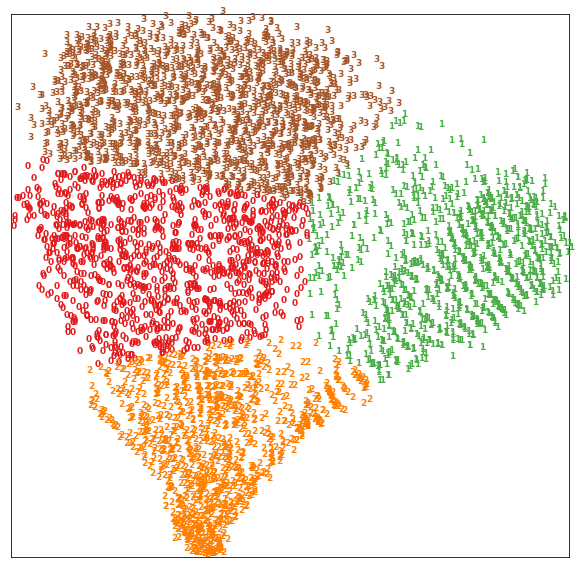

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected_1.shape[0]):
    plt.text(X_projected_1[i, 0], X_projected_1[i, 1], second_best_labels[i],
              color=plt.cm.Set1(second_best_labels[i] / second_best_n_clusters),
              fontdict={'weight': 'bold', 'size': 9})

plt.xticks([]), plt.yticks([])

In [ ]:
df2 = muestraTablaFinal
df2['labels'] = second_best_spectral_labels

In [ ]:
tabla0 = df[df['labels'] == 0]
tabla1 = df[df['labels'] == 1]
tabla2 = df[df['labels'] == 2]
tabla3 = df[df['labels'] == 3]
tabla0.drop('labels',inplace=True,axis=1)
tabla1.drop('labels',inplace=True,axis=1)
tabla2.drop('labels',inplace=True,axis=1)
tabla3.drop('labels',inplace=True,axis=1)

c:\users\alejandro\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
for columna in columnas:
  media = muestraTablaFinal[columna].mean()
  media0 = tabla0[columna].mean()
  media1 = tabla1[columna].mean()
  media2 = tabla2[columna].mean()
  media3 = tabla3[columna].mean()
  print(columna + ':')
  print('     Muestra: ' + str(media))
  print('     Label 0: ' + str(media0))
  print('     Label 1: ' + str(media1))
  print('     Label 2: ' + str(media2))
  print('     Label 3: ' + str(media3))

age:
     Muestra: 32.0062
     Label 0: 32.5605658709107
     Label 1: 27.878761061946904
     Label 2: 45.63514719000892
     Label 3: 25.058714462299136
height:
     Muestra: 68.2634
     Label 0: 67.52608311229001
     Label 1: 68.35398230088495
     Label 2: 68.46654772524532
     Label 3: 68.57478368355996
has_kids:
     Muestra: -0.1982
     Label 0: -0.2564102564102564
     Label 1: -0.24955752212389382
     Label 2: 0.03389830508474576
     Label 3: -0.28244746600741655
wants_kids:
     Muestra: -0.0172
     Label 0: 0.02475685234305924
     Label 1: 0.024778761061946902
     Label 2: -0.12310437109723461
     Label 3: -0.002472187886279357
cats:
     Muestra: 0.3868
     Label 0: 0.41114058355437666
     Label 1: 0.25398230088495577
     Label 2: 0.4665477252453167
     Label 3: 0.4072929542645241
dogs:
     Muestra: 0.5976
     Label 0: 0.6109637488947833
     Label 1: 0.511504424778761
     Label 2: 0.6074933095450491
     Label 3: 0.6415327564894932
english:
     Muestra: 

##Conclusiones

Conclusiones :D



---



